# Spotify Analysis and Manipulation with Python

In [1]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util
from collections import Counter
import lyricsgenius as lg
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import requests
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.tokenize import word_tokenize
from spotipy.oauth2 import SpotifyClientCredentials

## Authorization Flow

In [2]:
# Declare the credentials
cid = '1456e954f78b464d846c0a4515e89c2d'
secret = 'da8995031457400fa29a6dd5cfeff910'
redirect_uri='http://localhost:7777/callback'
username = 't2j0bqjefli1bcqzgpo9ew72p'

In [3]:
# Authorization flow
scope = 'user-top-read'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

## Extract the User's Top50 Tracks

In [4]:
# Fetch the top-50 songs of the user
if token:
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_top_tracks(limit=50,offset=0,time_range='medium_term')
    for song in range(50):
        list1 = []
        list1.append(results)
        with open('top50_data.json', 'w', encoding='utf-8') as f:
            json.dump(list1, f, ensure_ascii=False, indent=4)
else:
    print("Can't get token for", username)

In [5]:
# Open the JSON file to Python objects
with open('top50_data.json') as f:
  data = json.load(f)

In [6]:
len(data[0]['items'])

50

In [7]:
list_of_results = data[0]["items"]
list_of_artist_names = []
list_of_artist_uri = []
list_of_song_names = []
list_of_song_uri = []
list_of_durations_ms = []
list_of_explicit = []
list_of_albums = []
list_of_popularity = []

for result in list_of_results:
    result["album"]
    this_artists_name = result["artists"][0]["name"]
    list_of_artist_names.append(this_artists_name)
    this_artists_uri = result["artists"][0]["uri"]
    list_of_artist_uri.append(this_artists_uri)
    list_of_songs = result["name"]
    list_of_song_names.append(list_of_songs)
    song_uri = result["uri"]
    list_of_song_uri.append(song_uri)
    list_of_duration = result["duration_ms"]
    list_of_durations_ms.append(list_of_duration)
    song_explicit = result["explicit"]
    list_of_explicit.append(song_explicit)
    this_album = result["album"]["name"]
    list_of_albums.append(this_album)
    song_popularity = result["popularity"]
    list_of_popularity.append(song_popularity)

In [8]:
# Convert the pulled content to a pandas df
all_songs = pd.DataFrame(
    {'artist': list_of_artist_names,
     'artist_uri': list_of_artist_uri,
     'song': list_of_song_names,
     'song_uri': list_of_song_uri,
     'duration_ms': list_of_durations_ms,
     'explicit': list_of_explicit,
     'album': list_of_albums,
     'popularity': list_of_popularity
     
    })

In [9]:
all_songs.sort_values('popularity', ascending=False)

,artist,artist_uri,song,song_uri,duration_ms,explicit,album,popularity
24,David Kushner,spotify:artist:33NVpKoXjItPwUJTMZIOiY,Daylight,spotify:track:1odExI7RdWc4BT515LTAwj,212953,False,Daylight,94
0,Arctic Monkeys,spotify:artist:7Ln80lUS6He07XvHI8qqHH,Do I Wanna Know?,spotify:track:5FVd6KXrgO9B3JPmC8OPst,272394,False,AM,90
5,Ruth B.,spotify:artist:2WzaAvm2bBCf4pEhyuDgCY,Dandelions,spotify:track:2eAvDnpXP5W0cVtiI0PUxV,233720,False,Safe Haven,90
18,Glass Animals,spotify:artist:4yvcSjfu4PC0CYQyLy4wSq,Heat Waves,spotify:track:3USxtqRwSYz57Ewm6wWRMp,238805,False,Dreamland,90
8,girl in red,spotify:artist:3uwAm6vQy7kWPS2bciKWx9,we fell in love in october,spotify:track:6IPwKM3fUUzlElbvKw2sKl,184153,False,we fell in love in october / October Passed Me By,89
25,Christina Perri,spotify:artist:7H55rcKCfwqkyDFH9wpKM6,A Thousand Years,spotify:track:6lanRgr6wXibZr8KgzXxBl,285120,False,A Thousand Years,84
19,Aditya A,spotify:artist:4wwYGgSpeBtvk5WX6HBqzw,Chaand Baaliyan,spotify:track:0snQrp1VaY5Pj1YIHRJpRJ,103264,False,Chaand Baaliyan,79
13,Jasleen Royal,spotify:artist:74OaRjmyh0XyRZsQQQ5l7c,"Ranjha (From ""Shershaah"")",spotify:track:72zHuDxFQTjbL51qJQSA7j,228855,False,"Ranjha (From ""Shershaah"")",78
26,Pritam,spotify:artist:1wRPtKGflJrBx9BmLsSwlU,Tum Se Hi,spotify:track:7eQl3Yqv35ioqUfveKHitE,321225,False,Jab We Met,78
32,Alka Yagnik,spotify:artist:3gBKY0y3dFFVRqicLnVZYz,Agar Tum Saath Ho,spotify:track:3hkC9EHFZNQPXrtl8WPHnX,341054,False,Tamasha,78


### Songs per Artist in Top 50 Songs

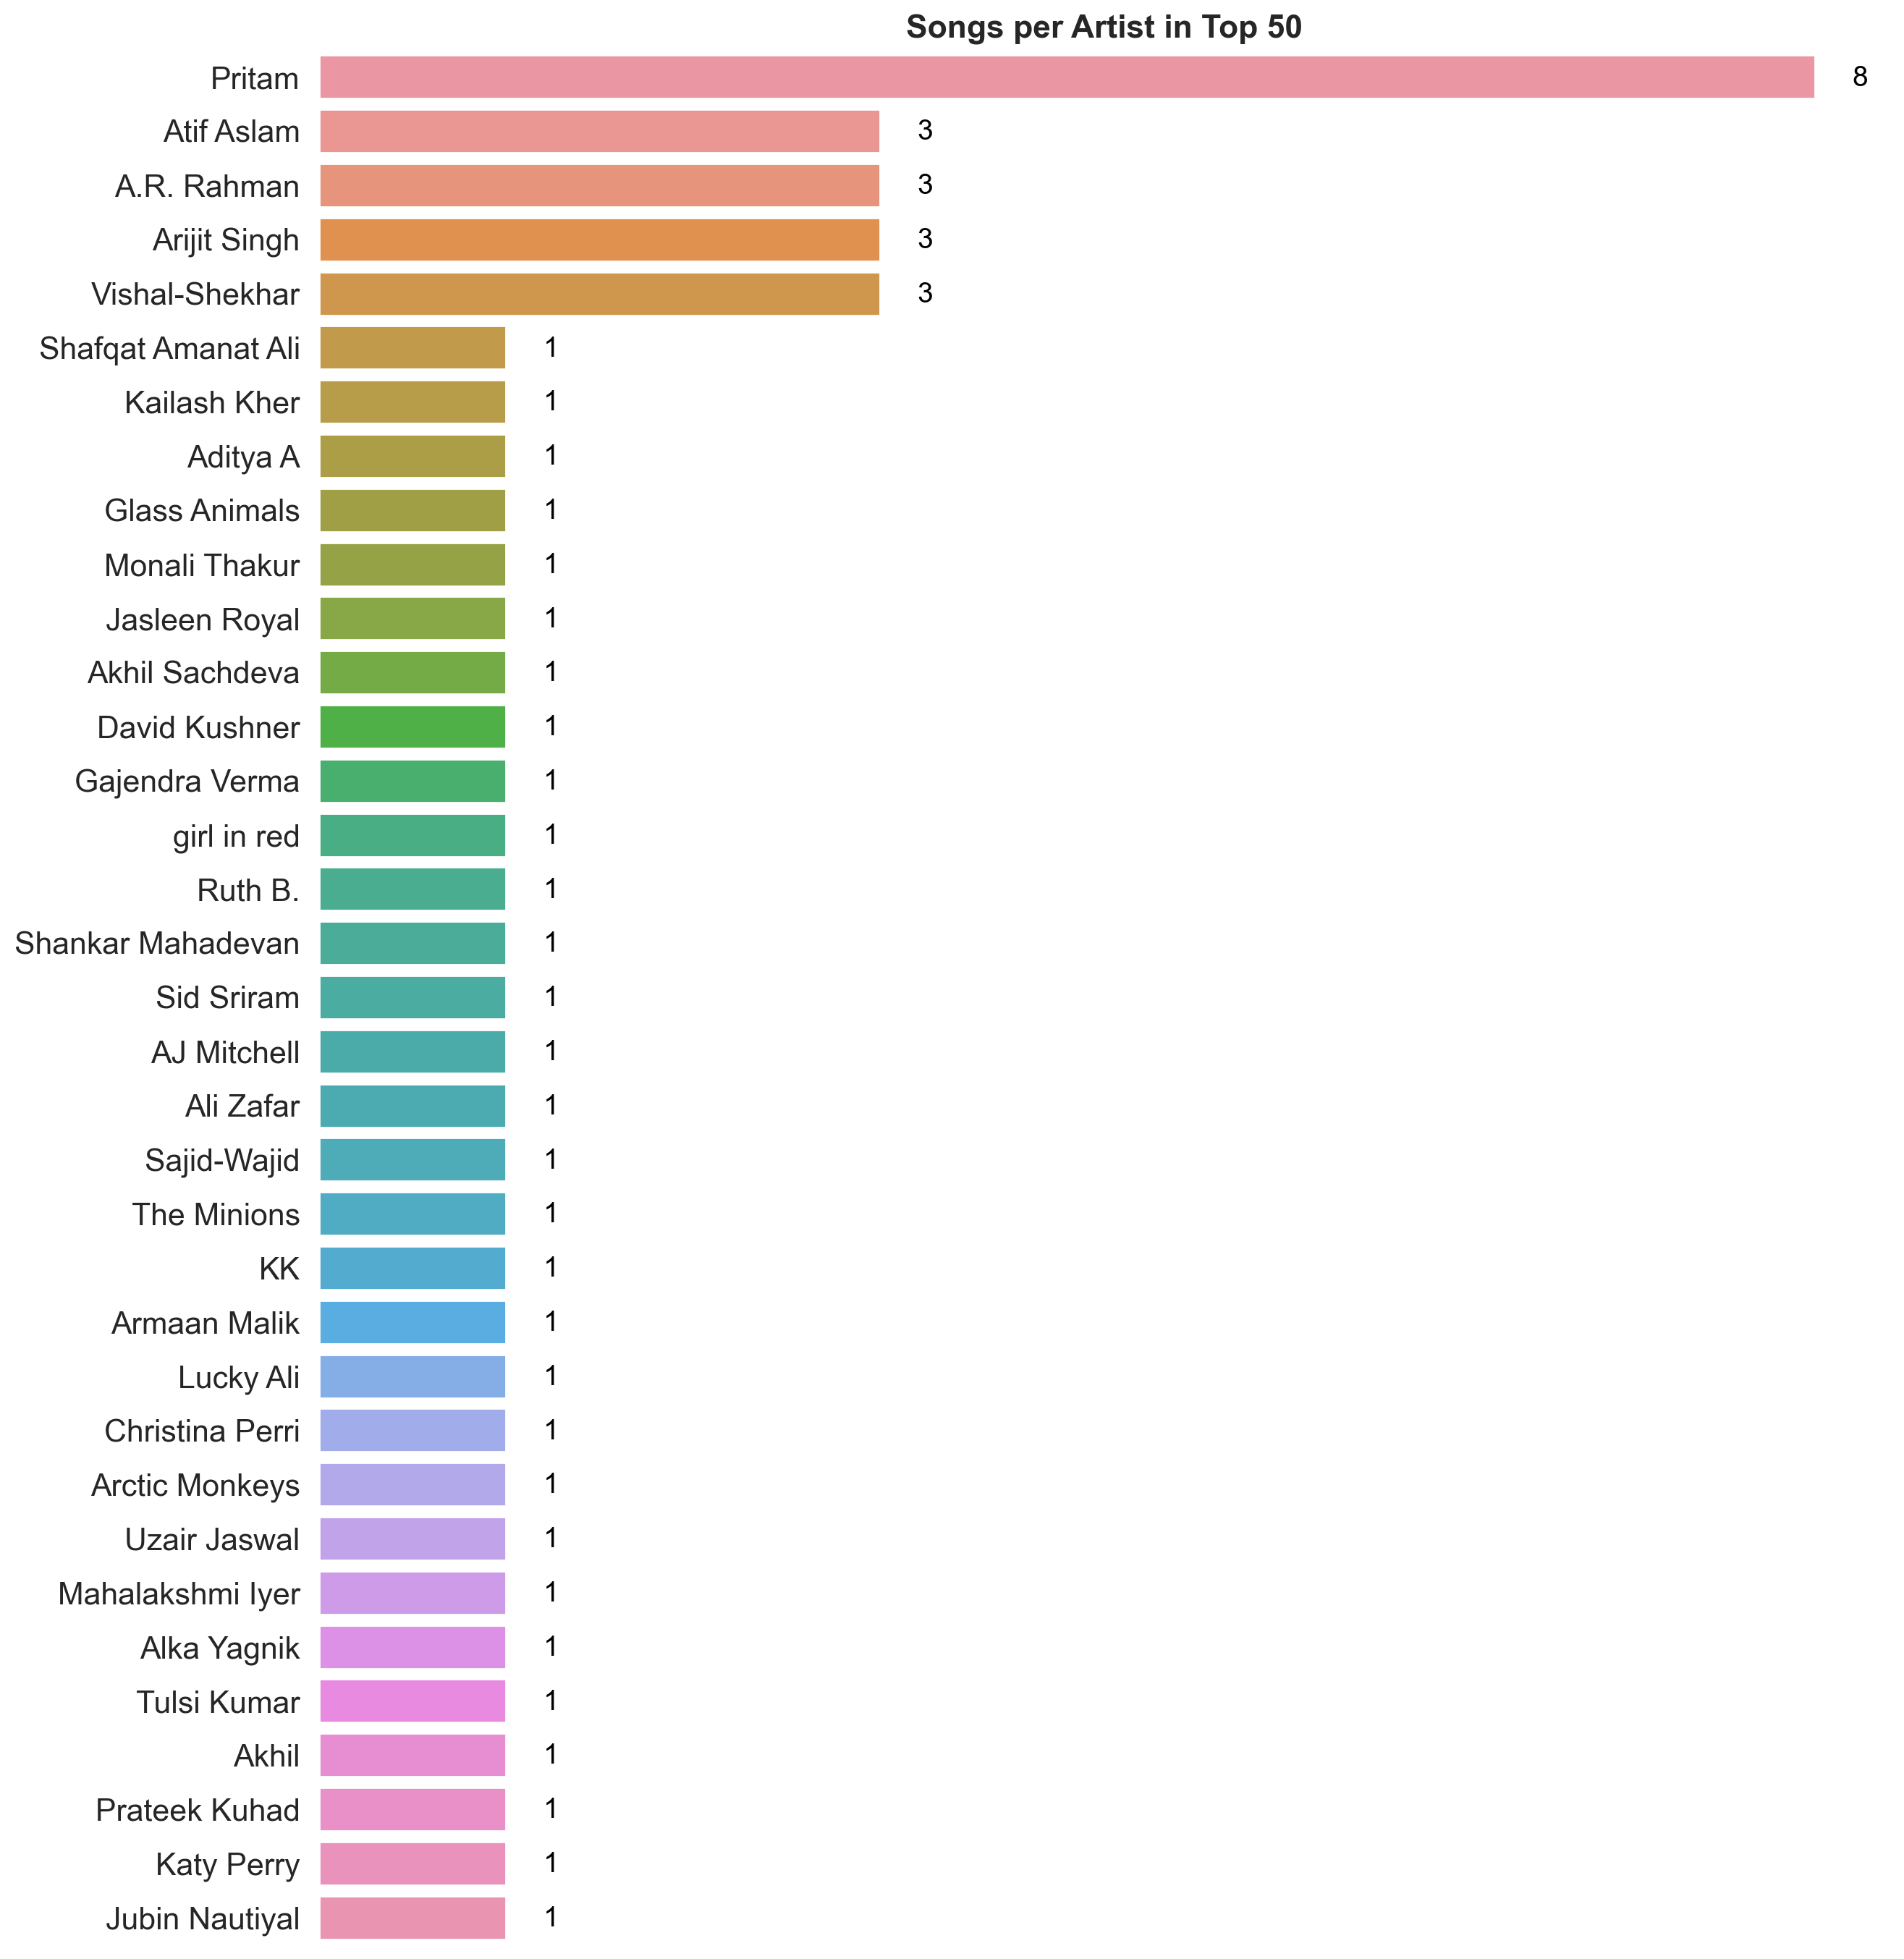

In [61]:
descending_order = all_songs['artist'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(y = all_songs['artist'], order=descending_order)

sns.despine(fig=None, ax=None, top=True, right=True, left=False, trim=False)
sns.set(rc={'figure.figsize':(14,17)})

ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Songs per Artist in Top 50', fontsize=16, fontweight='heavy')
sns.set(font_scale = 1.4)
ax.axes.get_xaxis().set_visible(False)
ax.set_frame_on(False)

y = all_songs['artist'].value_counts()
for i, v in enumerate(y):
    ax.text(v + 0.2, i + .16, str(v), color='black', fontweight='light', fontsize=14)
    
plt.show()

### Genre Distribution in Top 50 Songs

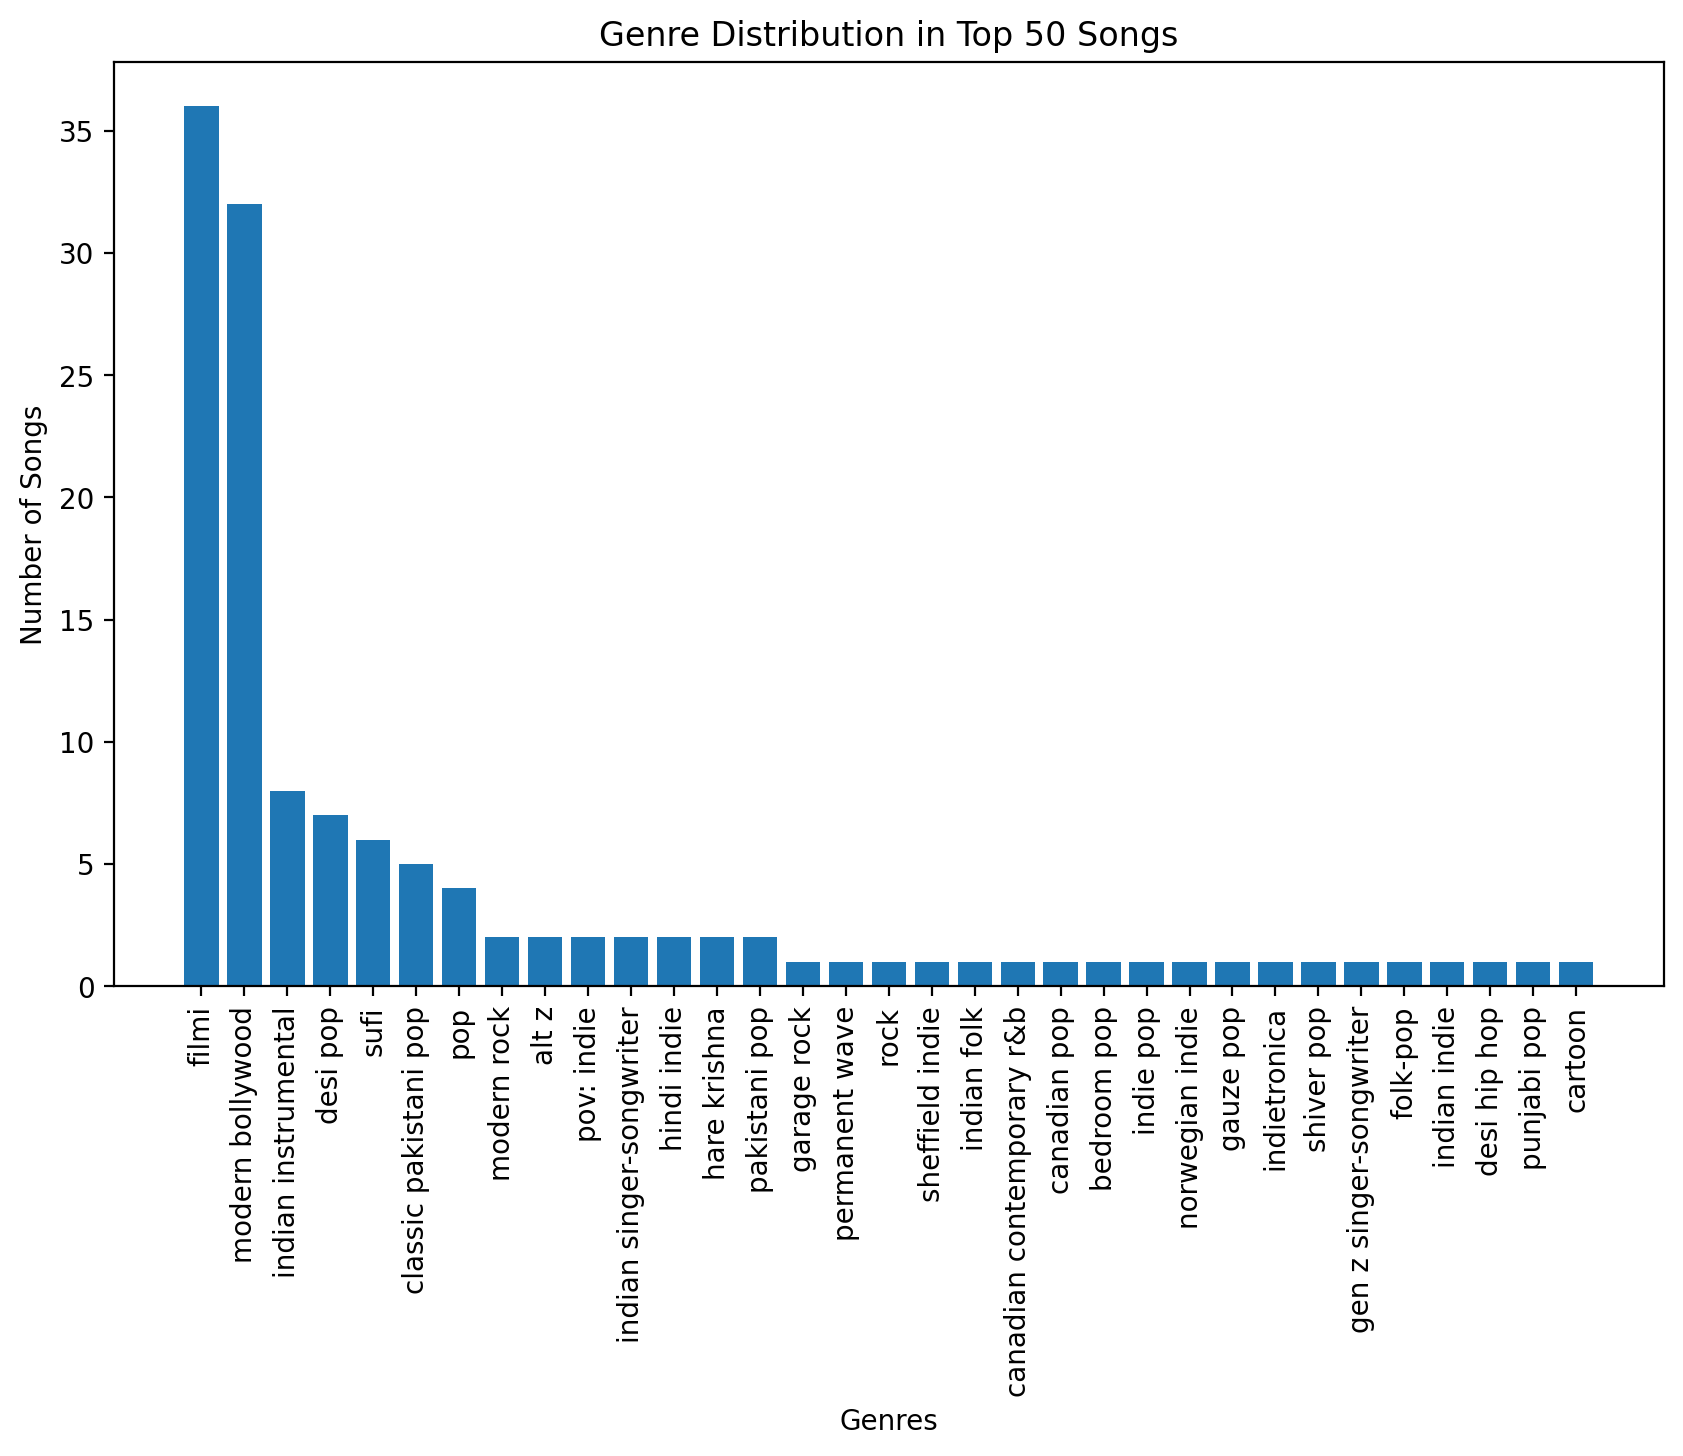

In [10]:
# Fetch genres for each artist
genres = []
for artist_uri in list_of_artist_uri:
    artist_info = sp.artist(artist_uri)
    genres.extend(artist_info.get('genres', []))

# Count occurrence of each genre
genre_counts = Counter(genres)

# Sort genres and counts in descending order
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
sorted_genres, sorted_counts = zip(*sorted_genres)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sorted_genres, sorted_counts)
plt.xlabel('Genres')
plt.ylabel('Number of Songs')
plt.title('Genre Distribution in Top 50 Songs')
plt.xticks(rotation=90)
plt.show()


### Time Spent on the Top Artist

In [127]:
scope = 'user-top-read'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

# Fetch the user's top artist
top_artists = sp.current_user_top_artists(limit=1, time_range='medium_term')

# Check if there's at least one top artist
if top_artists['items']:
    top_artist = top_artists['items'][0]
    target_artist_name = top_artist['name']
    target_artist_uri = top_artist['uri']

    # Fetch all tracks of the top artist with pagination
    results = []
    limit = 500  # Maximum limit per request
    offset = 0

    while True:
        response = sp.current_user_top_tracks(limit=limit, offset=offset, time_range='medium_term')
        if not response['items']:
            break
        results.extend(response['items'])
        offset += limit

    # Extract total listening time for the top artist
    total_listening_time = 0

    for track in results:
        total_listening_time += track['duration_ms']

    # Convert milliseconds to minutes
    total_listening_time_minutes = total_listening_time / (1000 * 60)

    # Print the results
    print(f"Top fan of {target_artist_name} and spent {total_listening_time_minutes:.2f} minutes listening to this artist.")
else:
    print("No top artist found.")

Top fan of Pritam and spent 211.40 minutes listening to this artist.


### Distribution of Popularity Across Tracks

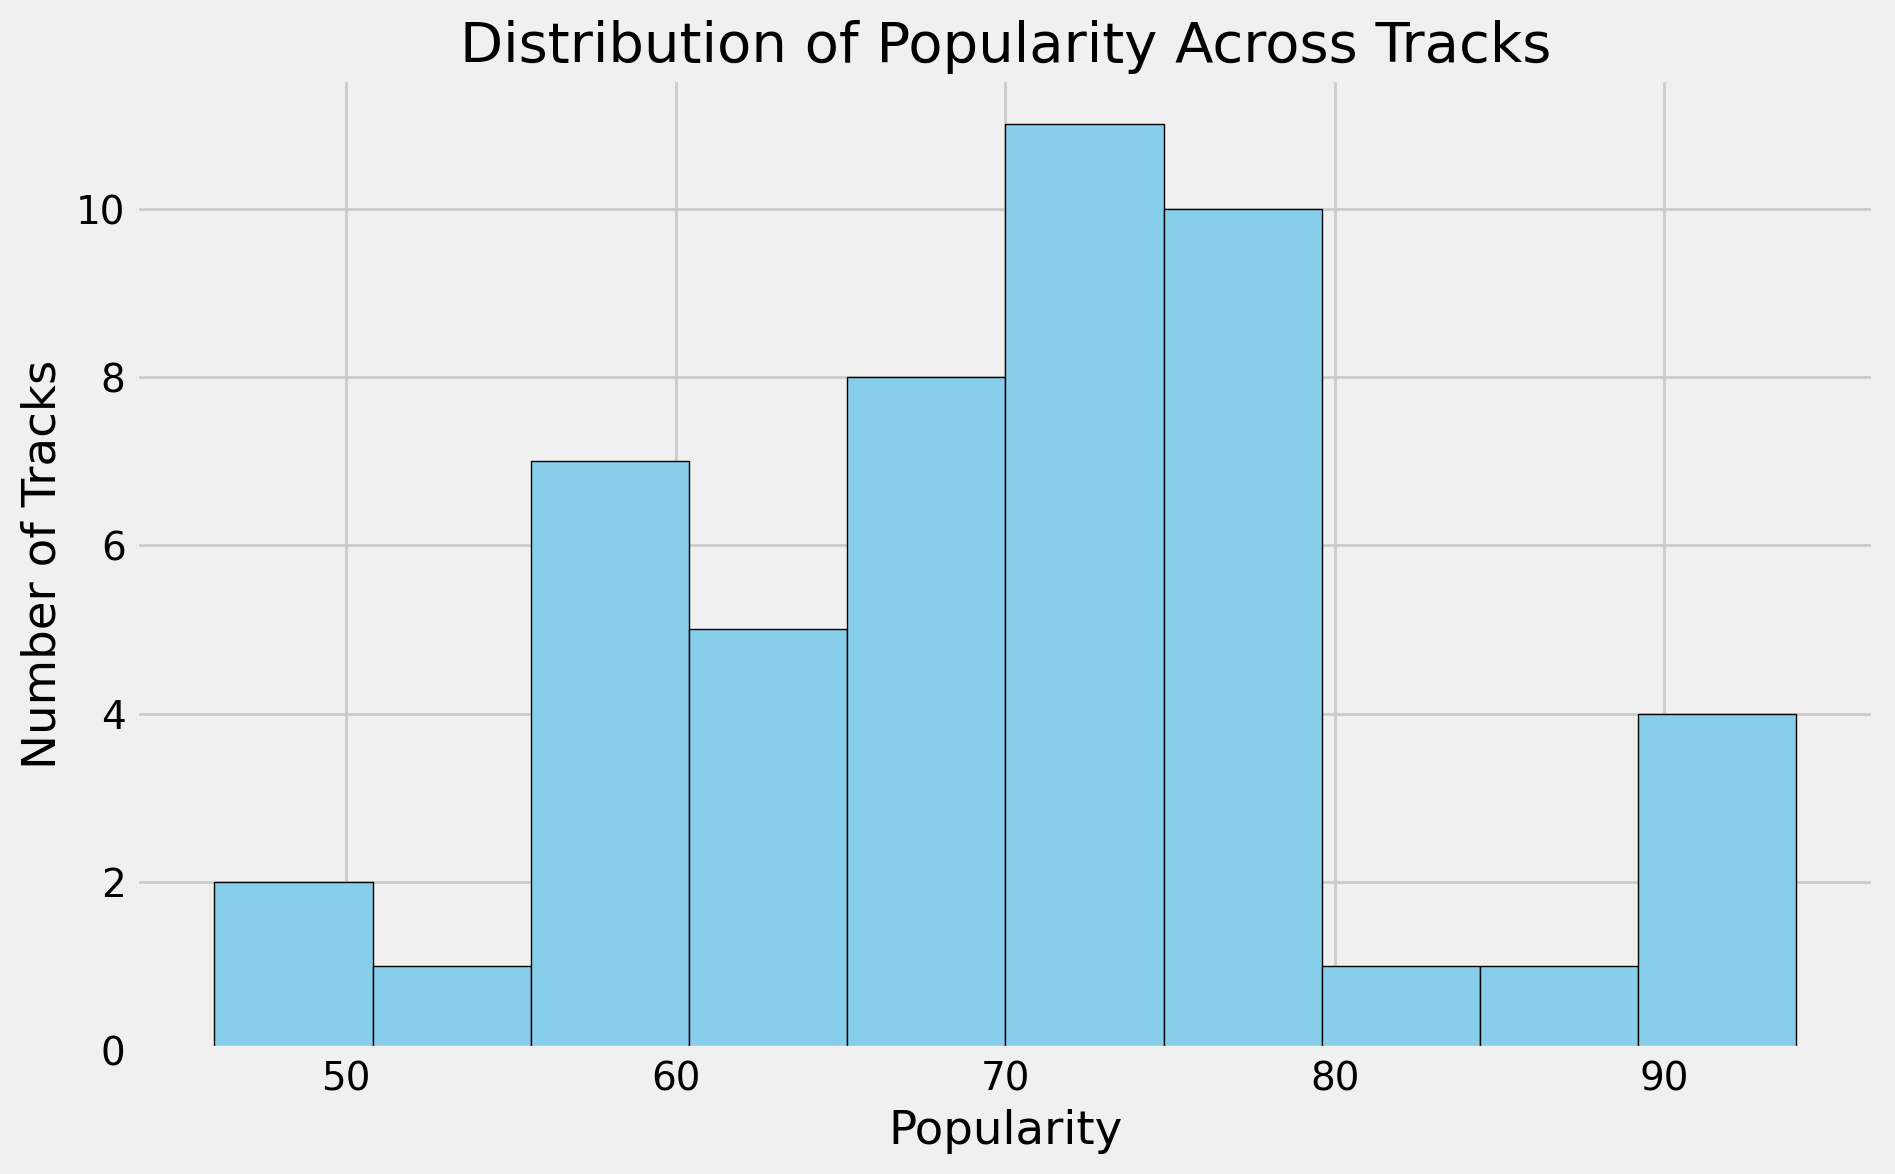

In [125]:
songs_df = all_songs[['song', 'song_uri']].copy()
 
# Display the new DataFrame
#print(songs_df)
 
songs_df['song_uri'] = songs_df['song_uri'].str.replace('spotify:track:', '')
 
# Display the updated DataFrame
#print(songs_df)
 
songs_df = songs_df.rename(columns={'song_uri': 'track_id'})
 
# Display the updated DataFrame
#print(songs_df.head(6))
 
# Assuming songs_df contains 'song' and 'track_id' columns
track_ids = songs_df['track_id'].tolist()
 
# Initialize an empty list to store track information dictionaries
tracks_info_list = []
 
# Loop through each track ID and fetch track information
for track_id in track_ids:
    track_info = sp.track(track_id)
    tracks_info_list.append(track_info)
    
# Create a DataFrame with the extracted information
tracks_info_df = pd.json_normalize(tracks_info_list)
 
# Assuming 'popularity' column is present in tracks_info_df
plt.figure(figsize=(10, 6))
plt.hist(tracks_info_df['popularity'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Popularity Across Tracks')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()


### Release Year of Top 50 Songs

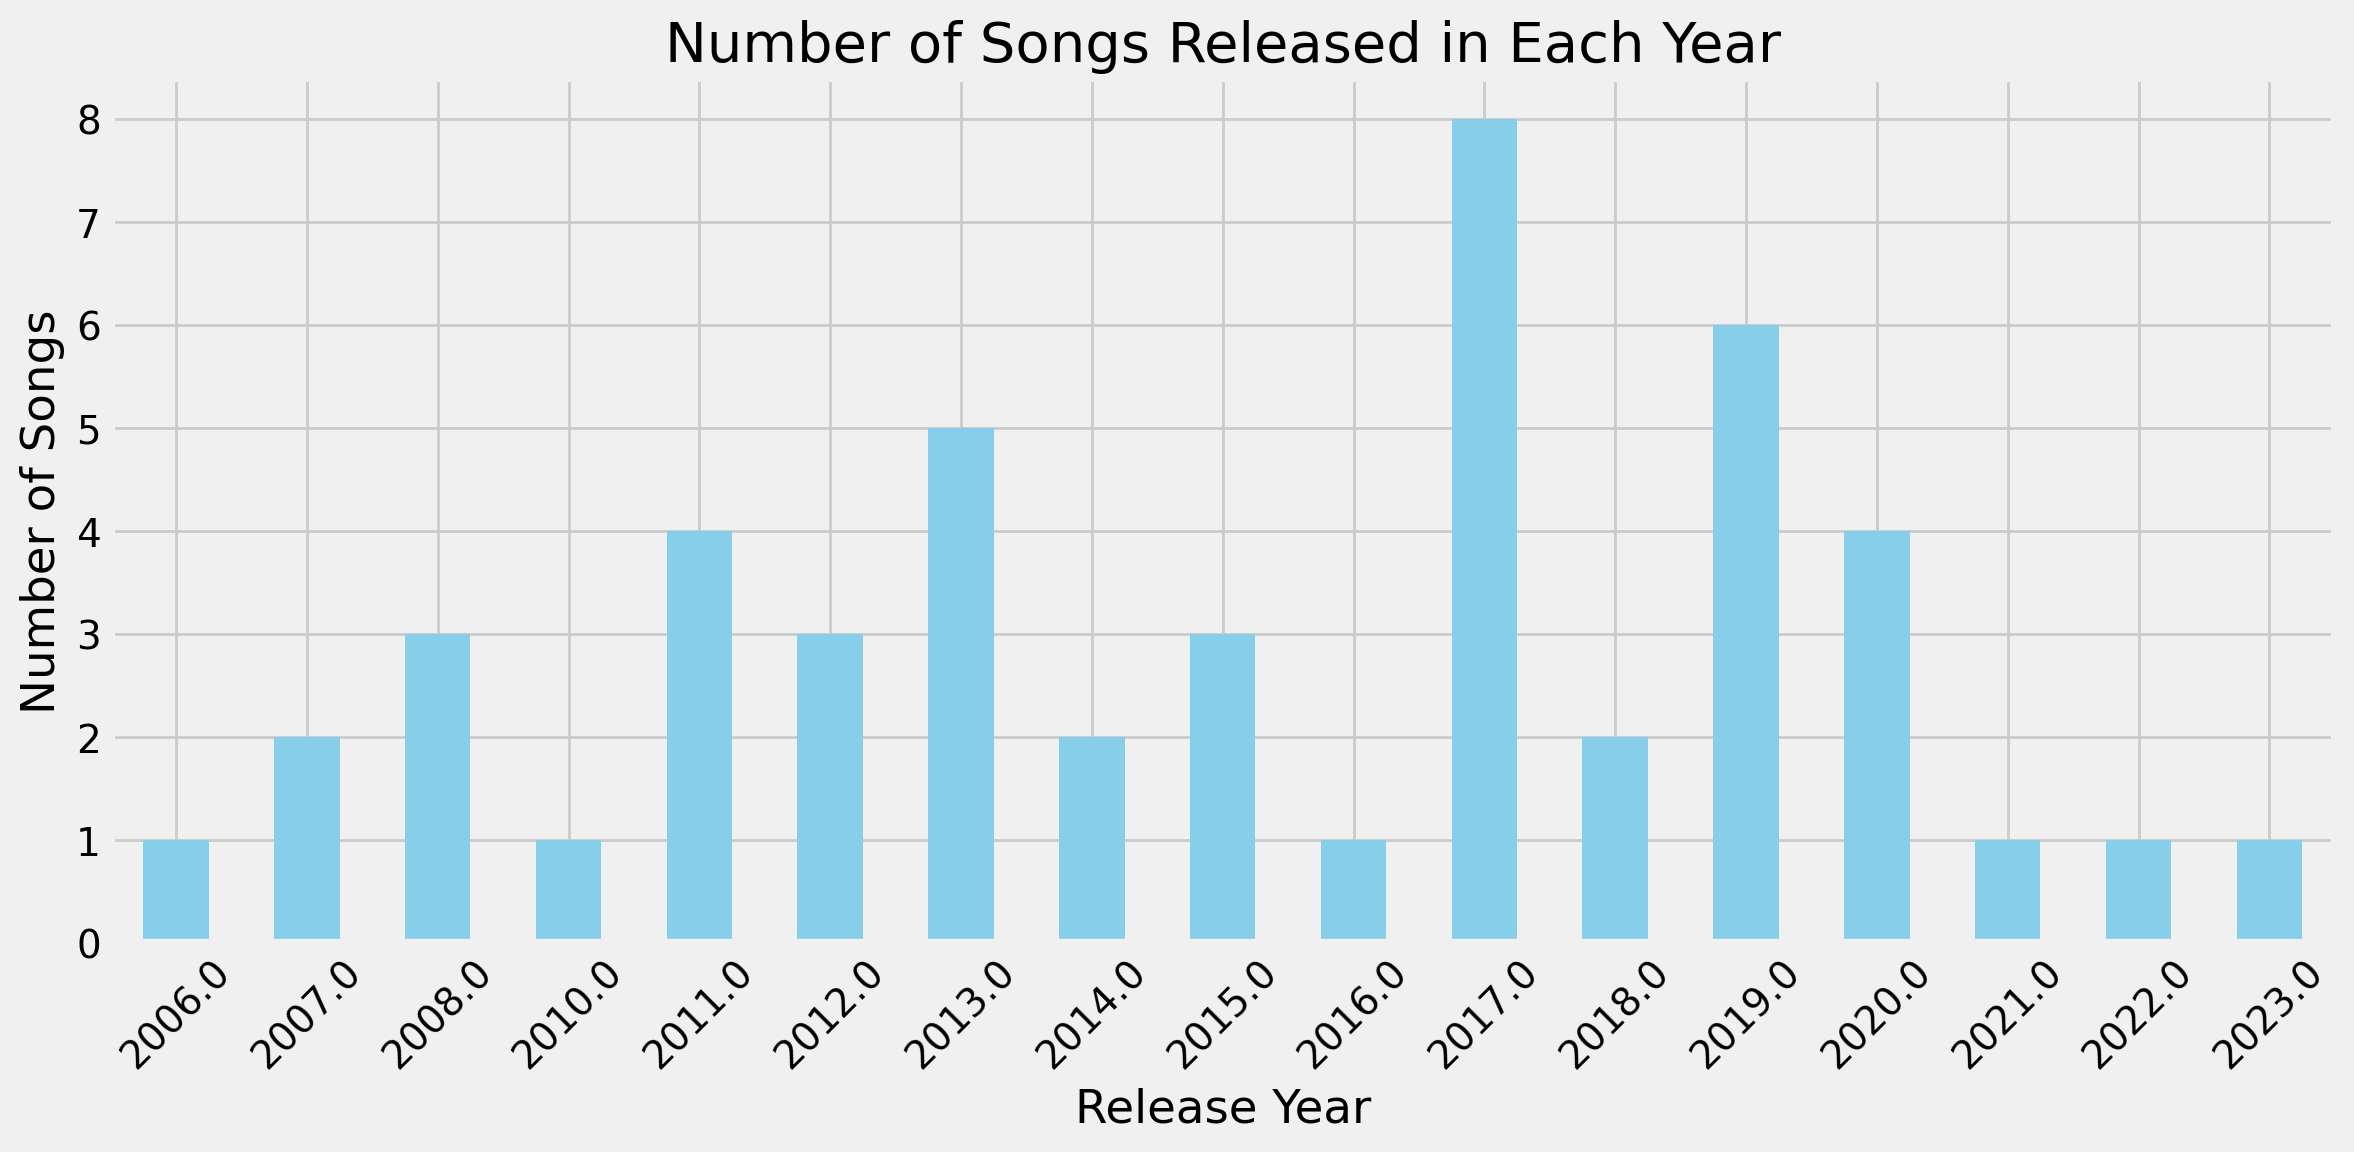

In [124]:
# Assuming 'album.release_date' column is present in tracks_info_df
tracks_info_df['album.release_date'] = pd.to_datetime(tracks_info_df['album.release_date'], errors='coerce')
 
# Extracting the year from the release date
tracks_info_df['album.release_year'] = tracks_info_df['album.release_date'].dt.year
 
# Grouping by release year and counting the number of songs
release_year_counts = tracks_info_df['album.release_year'].value_counts().sort_index()
 
# Plotting the number of songs against release year
plt.figure(figsize=(12, 6))
release_year_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Songs Released in Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Sentiment Analysis of the Top 6 Songs of the user

In [12]:
top_6 = all_songs.sort_values('popularity', ascending=False).head(6)

In [13]:
top_6

,artist,artist_uri,song,song_uri,duration_ms,explicit,album,popularity
24,David Kushner,spotify:artist:33NVpKoXjItPwUJTMZIOiY,Daylight,spotify:track:1odExI7RdWc4BT515LTAwj,212953,False,Daylight,94
0,Arctic Monkeys,spotify:artist:7Ln80lUS6He07XvHI8qqHH,Do I Wanna Know?,spotify:track:5FVd6KXrgO9B3JPmC8OPst,272394,False,AM,90
5,Ruth B.,spotify:artist:2WzaAvm2bBCf4pEhyuDgCY,Dandelions,spotify:track:2eAvDnpXP5W0cVtiI0PUxV,233720,False,Safe Haven,90
18,Glass Animals,spotify:artist:4yvcSjfu4PC0CYQyLy4wSq,Heat Waves,spotify:track:3USxtqRwSYz57Ewm6wWRMp,238805,False,Dreamland,90
8,girl in red,spotify:artist:3uwAm6vQy7kWPS2bciKWx9,we fell in love in october,spotify:track:6IPwKM3fUUzlElbvKw2sKl,184153,False,we fell in love in october / October Passed Me By,89
25,Christina Perri,spotify:artist:7H55rcKCfwqkyDFH9wpKM6,A Thousand Years,spotify:track:6lanRgr6wXibZr8KgzXxBl,285120,False,A Thousand Years,84


In [14]:
top_6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 24 to 25
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       6 non-null      object
 1   artist_uri   6 non-null      object
 2   song         6 non-null      object
 3   song_uri     6 non-null      object
 4   duration_ms  6 non-null      int64 
 5   explicit     6 non-null      bool  
 6   album        6 non-null      object
 7   popularity   6 non-null      int64 
dtypes: bool(1), int64(2), object(5)
memory usage: 390.0+ bytes


In [16]:
def clean_lyrics(lyrics):
    # Remove everything before and including the first ']'
    cleaned_lyrics = lyrics.split(']', 1)[-1].strip()

    # Remove various sections like [Verse 1], [Pre-Chorus], etc.
    sections = ['[Verse', '[Pre-Chorus', '[Chorus', '[Verse', '[Outro', '[Intro', '[Bridge', '[Post-Chorus']
    for section in sections:
        cleaned_lyrics = cleaned_lyrics.replace(section, '')

    return cleaned_lyrics

def lyrics(song, artist):
    genius_access_token = 'nZSwqdNakF9oFO8W1lzOfjHXpRNq4-jViP1uTHrIsp0mG881k2bF5ySju01TN4cP'
    genius = lg.Genius(genius_access_token)
    song = genius.search_song(title=song, artist=artist)
    try:
        return song.lyrics
    except AttributeError:
        return None

# Create a new column 'lyrics' in the 'top_6' DataFrame
top_6['lyrics'] = None

# Iterate over the rows of the DataFrame and fetch lyrics for each song
for index, row in top_6.iterrows():
    artist_name = row['artist']
    song_name = row['song']
    current_lyrics = lyrics(song_name, artist_name)

    if current_lyrics:
        # Clean the lyrics and save in the 'lyrics' column
        cleaned_lyrics = clean_lyrics(current_lyrics)
        top_6.at[index, 'lyrics'] = cleaned_lyrics
    else:
        print(f"No lyrics found for {artist_name} - {song_name}\n{'='*50}\n")

# Now 'top_6' DataFrame has the 'lyrics' column populated with cleaned lyrics


Searching for "Daylight" by David Kushner...
Done.
Searching for "Do I Wanna Know?" by Arctic Monkeys...
Done.
Searching for "Dandelions" by Ruth B....
Done.
Searching for "Heat Waves" by Glass Animals...
Done.
Searching for "we fell in love in october" by girl in red...
Done.
Searching for "A Thousand Years" by Christina Perri...
Done.


In [17]:
top_6

,artist,artist_uri,song,song_uri,duration_ms,explicit,album,popularity,lyrics
24,David Kushner,spotify:artist:33NVpKoXjItPwUJTMZIOiY,Daylight,spotify:track:1odExI7RdWc4BT515LTAwj,212953,False,Daylight,94,"Telling myself I won't go there\nOh, but I kno..."
0,Arctic Monkeys,spotify:artist:7Ln80lUS6He07XvHI8qqHH,Do I Wanna Know?,spotify:track:5FVd6KXrgO9B3JPmC8OPst,272394,False,AM,90,Have you got colour in your cheeks?\nDo you ev...
5,Ruth B.,spotify:artist:2WzaAvm2bBCf4pEhyuDgCY,Dandelions,spotify:track:2eAvDnpXP5W0cVtiI0PUxV,233720,False,Safe Haven,90,Maybe it's the way you say my name\nMaybe it's...
18,Glass Animals,spotify:artist:4yvcSjfu4PC0CYQyLy4wSq,Heat Waves,spotify:track:3USxtqRwSYz57Ewm6wWRMp,238805,False,Dreamland,90,"(Last night, all I think about is you)\n(Don't..."
8,girl in red,spotify:artist:3uwAm6vQy7kWPS2bciKWx9,we fell in love in october,spotify:track:6IPwKM3fUUzlElbvKw2sKl,184153,False,we fell in love in october / October Passed Me By,89,Smoking cigarettes on the roof\nYou look so pr...
25,Christina Perri,spotify:artist:7H55rcKCfwqkyDFH9wpKM6,A Thousand Years,spotify:track:6lanRgr6wXibZr8KgzXxBl,285120,False,A Thousand Years,84,"Heart beats fast, colors and promises\nHow to ..."


       Word  Frequency
0       ive         29
1       get         26
2      girl         26
3      love         23
4      time         19
..      ...        ...
298    open          1
299   shuts          1
300  simmer          1
301  pucker          1
302   walls          1

[303 rows x 2 columns]


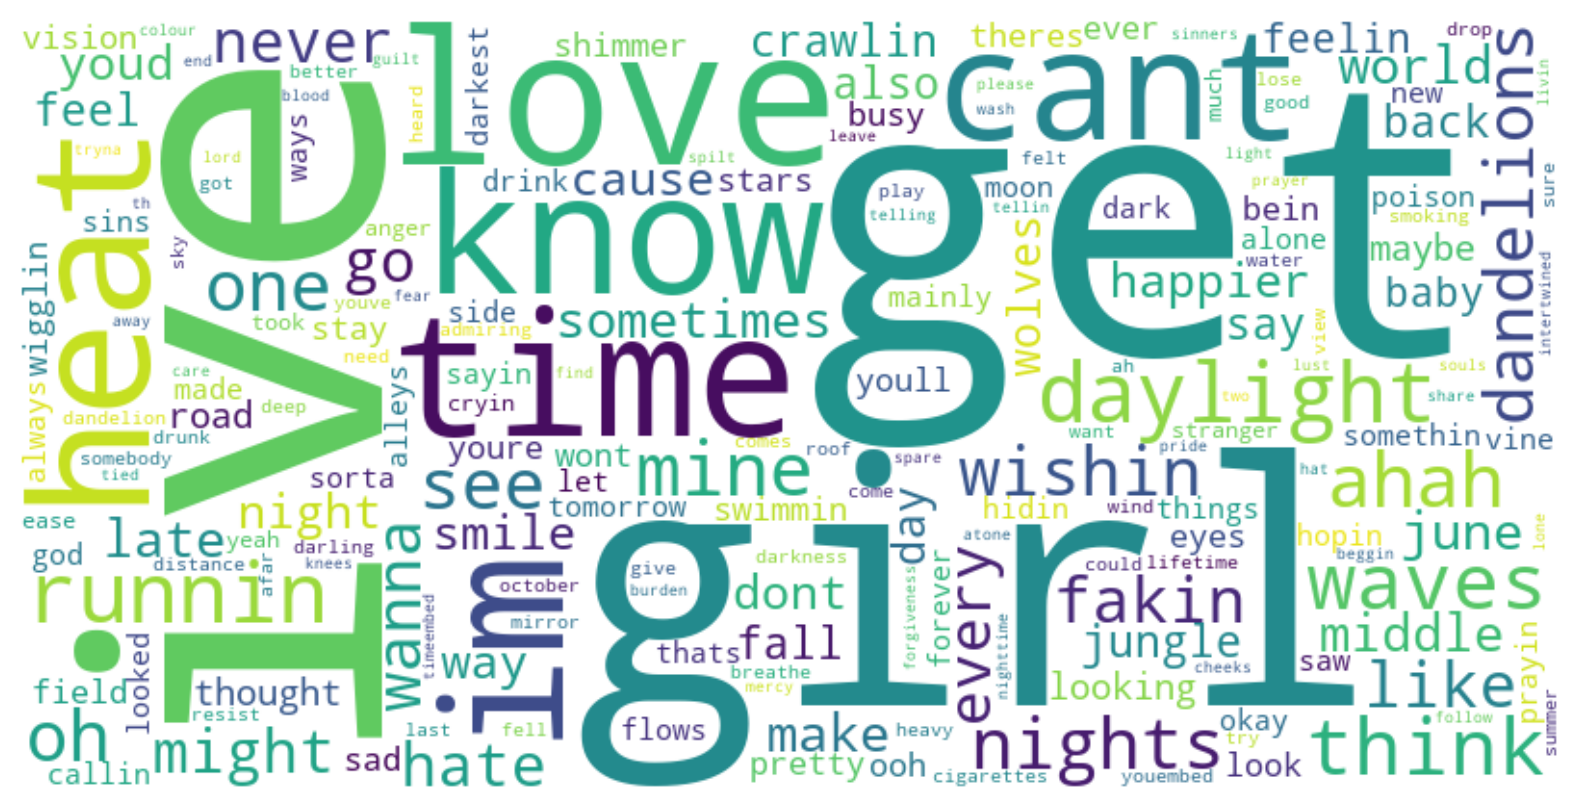

In [41]:
# Concatenate all lyrics into a single string
all_lyrics = ' '.join(top_6['lyrics'].dropna())

# Convert to lowercase
all_lyrics_lower = all_lyrics.lower()

# Remove special characters and numbers
cleaned_lyrics = re.sub('[^A-Za-z\s]', '', all_lyrics_lower)

# Tokenize the cleaned lyrics
tokens = cleaned_lyrics.split()

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Remove specific words like 'i'
#filtered_tokens = [word for word in filtered_tokens if word.lower() != 'i']

# Calculate the frequency of each word
word_freq = Counter(filtered_tokens)

# Initialize an empty list to store word frequencies
word_freq_list = []

# Iterate through the items of word_freq and append to the list
for word, frequency in word_freq.items():
    word_freq_list.append({'Word': word, 'Frequency': frequency})

# Convert the list to a DataFrame
word_freq_df = pd.DataFrame(word_freq_list)

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the DataFrame
print(word_freq_df)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [176]:
# Specify the URL of the text file containing positive words
URL = "https://intro-datascience.s3.us-east-2.amazonaws.com/positive-words.txt"
response = requests.get(URL)
posWords = response.text.split('\n')[34:]

# Specify the URL of the text file containing negative words
URL2 = "https://intro-datascience.s3.us-east-2.amazonaws.com/negative-words.txt"
response = requests.get(URL2)
negWords = response.text.split('\n')[34:]

# Assume you have a DataFrame 'top_6' with 'lyrics' column
# Concatenate all lyrics into a single string
all_lyrics = ' '.join(top_6['lyrics'].dropna())

# Remove special characters and numbers, convert to lowercase
cleaned_lyrics = re.sub('[^A-Za-z\s]', '', all_lyrics).lower()

# Tokenize the cleaned lyrics
tokens = cleaned_lyrics.split()

# Remove stopwords
filtered_tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]

# Calculate the frequency of each word
word_freq = Counter(filtered_tokens)

# Initialize empty DataFrames for positive and negative frequencies
pos_freq_df = pd.DataFrame(columns=['Word', 'Frequency'])
neg_freq_df = pd.DataFrame(columns=['Word', 'Frequency'])

# Loop through positive words and add to the DataFrame
for word in posWords:
    if word in word_freq:
        pos_freq_df = pd.concat([pos_freq_df, pd.DataFrame({'Word': [word], 'Frequency': [word_freq[word]]})])

# Loop through negative words and add to the DataFrame
for word in negWords:
    if word in word_freq:
        neg_freq_df = pd.concat([neg_freq_df, pd.DataFrame({'Word': [word], 'Frequency': [word_freq[word]]})])

# Sort the DataFrames by frequency in descending order
pos_freq_df = pos_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
neg_freq_df = neg_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

print("Top 10 Positive Words:")
print(pos_freq_df.head(10))

print("Top 10 Negative Words:")
print(neg_freq_df.head(10))


Top 10 Positive Words:
       Word Frequency
0      love        25
1      like         9
2     smile         7
3   happier         7
4   darling         5
5     loved         5
6    pretty         4
7  admiring         2
8    better         2
9     brave         2
Top 10 Negative Words:
       Word Frequency
0      hate         8
1      fall         7
2    afraid         4
3   shimmer         4
4       sad         4
5      died         3
6    poison         3
7  darkness         2
8      fell         2
9      lose         1


In [177]:
# Concatenate all lyrics into a single string
all_lyrics = ' '.join(top_6['lyrics'].dropna())

# Remove special characters and numbers, convert to lowercase
cleaned_lyrics = re.sub('[^A-Za-z\s]', '', all_lyrics).lower()

# Tokenize the cleaned lyrics
tokens = cleaned_lyrics.split()

# Remove stopwords
filtered_tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]

# Calculate the frequency of each word
word_freq = Counter(filtered_tokens)

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Create a list to store sentiment scores for each word
sentiment_scores = []

# Loop through each word and get sentiment score
for word, freq in word_freq.items():
    # Get sentiment score for the word
    sentiment = sid.polarity_scores(word)['compound']
    # Append word, frequency, and sentiment score to the list
    sentiment_scores.append({'Word': word, 'Frequency': freq, 'Sentiment': sentiment})

# Convert the list to a DataFrame
sentiment_df = pd.DataFrame(sentiment_scores)

# Sort the DataFrame by frequency in descending order
sentiment_df = sentiment_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Separate into positive and negative words
positive_words = sentiment_df[sentiment_df['Sentiment'] > 0].head(10)
negative_words = sentiment_df[sentiment_df['Sentiment'] < 0].head(10)

print("Top 10 Positive Words:")
print(positive_words)

print("\nTop 10 Negative Words:")
print(negative_words)


Top 10 Positive Words:
       Word  Frequency  Sentiment
1      love         25     0.6369
17     like          9     0.3612
28    smile          7     0.3612
30  happier          7     0.5267
36  darling          5     0.5859
43    loved          5     0.5994
44   pretty          4     0.4939
49   vision          4     0.2500
74      god          3     0.2732
81     okay          3     0.2263

Top 10 Negative Words:
         Word  Frequency  Sentiment
20       hate          8    -0.5719
39        ill          5    -0.4215
51        sad          4    -0.4767
75       died          3    -0.5574
76       sins          3    -0.4588
85     poison          3    -0.5423
100  darkness          2    -0.2500
138     fight          1    -0.3818
141     hurts          1    -0.4767
142    broken          1    -0.4767


In [178]:
total_pos_words = pos_freq_df['Frequency'].sum()
print(total_pos_words)
total_neg_words = neg_freq_df['Frequency'].sum()
print(total_neg_words)

81
50


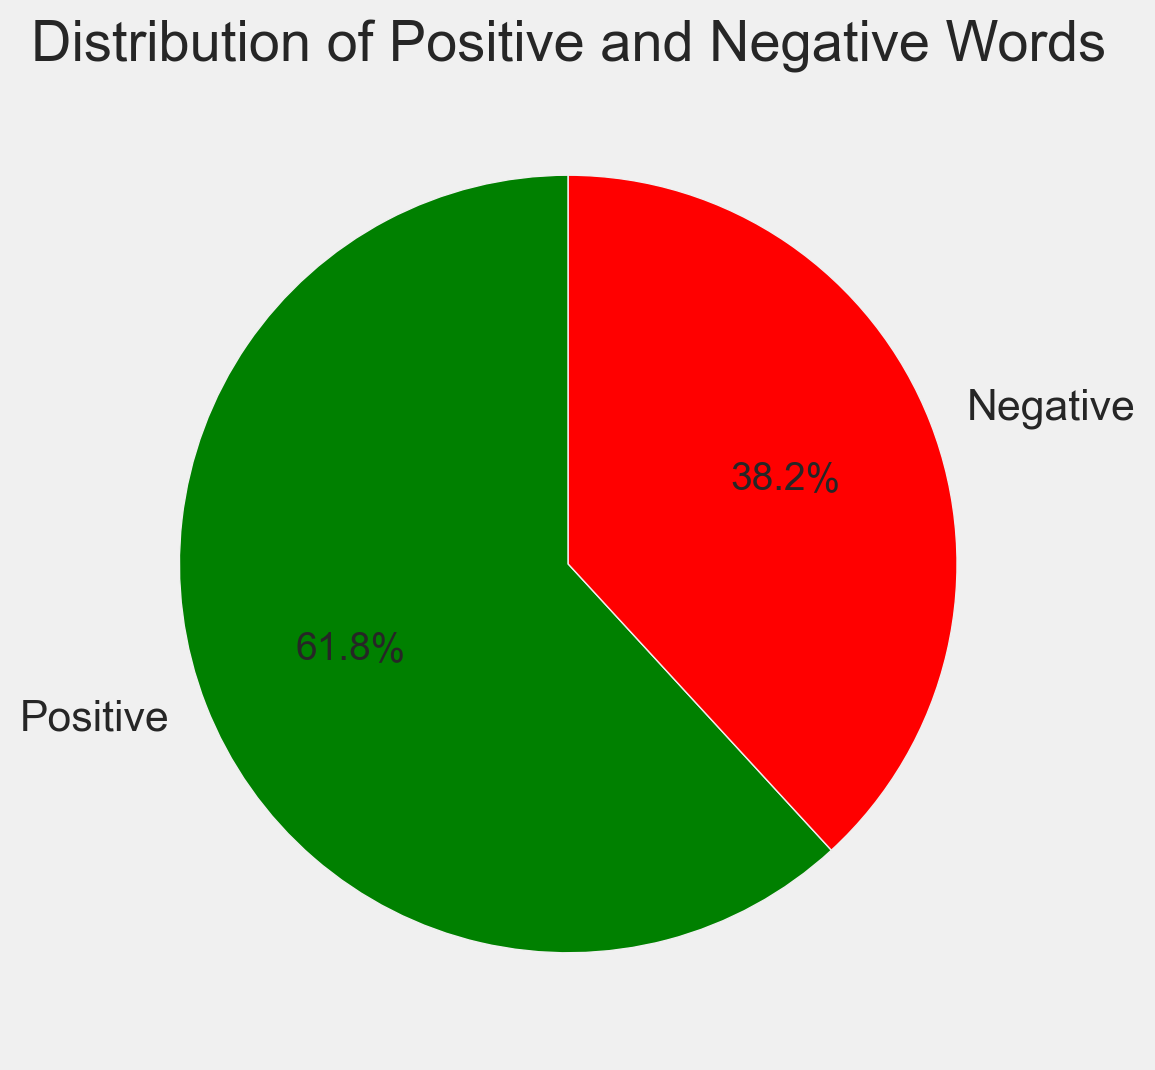

In [181]:
# Create a DataFrame for plotting
data = {'Sentiment': ['Positive', 'Negative'], 'Total Words': [total_pos_words, total_neg_words]}
plot_data = pd.DataFrame(data)
 
# Define color palette
colors = ['green', 'red']
 
# Plot a pie chart with specified colors
plt.figure(figsize=(8, 6))
plt.pie(plot_data['Total Words'], labels=plot_data['Sentiment'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Positive and Negative Words')
plt.show()

## Extract the User's Playlists

In [82]:
# Fetch the user's playlists
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlists = sp.user_playlists(username)
for playlist in playlists['items']:
    print('Name: {}, Playlist ID: {}, No Tracks: {}'.
          format(playlist['name'], playlist['id'], playlist['tracks']['total']))

Name: Chill, Playlist ID: 27kjEeyUgORaTHocNayo6A, No Tracks: 24
Name: Party, Playlist ID: 3KM99SC0LjvbtX1fxMAXuk, No Tracks: 97
Name: Vibe, Playlist ID: 5N6hukeEop9douhdlONSI1, No Tracks: 160
Name: Bollywood , Playlist ID: 7ak4z74RGfVcTAXdQaHxYN, No Tracks: 86
Name: Calm, Playlist ID: 0Dtn1Kg8eAke8hGzWCiYoe, No Tracks: 76
Name: Peace, Playlist ID: 08MeRULLvHKw3JQG8WXoju, No Tracks: 146


In [83]:
def fetch_playlists(sp, username):
    """
    Returns the user's playlists.
    """
        
    id = []
    name = []
    num_tracks = []
    
    # Make the API request
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        id.append(playlist['id'])
        name.append(playlist['name'])
        num_tracks.append(playlist['tracks']['total'])

    # Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [84]:
fetch_playlists(sp,username)

,id,name,#tracks
0,27kjEeyUgORaTHocNayo6A,Chill,24
1,3KM99SC0LjvbtX1fxMAXuk,Party,97
2,5N6hukeEop9douhdlONSI1,Vibe,160
3,7ak4z74RGfVcTAXdQaHxYN,Bollywood,86
4,0Dtn1Kg8eAke8hGzWCiYoe,Calm,76
5,08MeRULLvHKw3JQG8WXoju,Peace,146


## Extract the User's Playlists' Tracks

In [26]:
def fetch_playlist_tracks(sp, username, playlist_id):
    """
    Returns the tracks for the given playlist.
    """
        
    offset = 0
    tracks = []
    
    # Make the API request
    while True:
        content = sp.user_playlist_tracks(username, playlist_id, fields=None, limit=100, offset=offset, market=None)
        tracks += content['items']
        
        if content['next'] is not None:
            offset += 100
        else:
            break
    
    track_id = []
    track_name = []
    
    for track in tracks:
        track_id.append(track['track']['id'])
        track_name.append(track['track']['name'])
    
    # Create the final df
    df_playlists_tracks = pd.DataFrame({"track_id":track_id, "track_name": track_name})
    return df_playlists_tracks

In [27]:
fetch_playlist_tracks(sp, username, '5N6hukeEop9douhdlONSI1')

,track_id,track_name
0,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior)
1,2tpWsVSb9UEmDRxAl1zhX1,Counting Stars
2,3MEYFivt6bilQ9q9mFWZ4g,Alone
3,60EFFQmSfrNMPUMGnfxBbO,Levitate - From The Original Motion Picture “P...
4,0ct6r3EGTcMLPtrXHDvVjc,The Nights
...,...,...
155,3BJm2KbylyJuzZjRUFXLBJ,Classic
156,4gvrJnKCKIPiacNsWVQwEU,love nwantiti (feat. Dj Yo! & AX'EL) - Remix
157,3Wrjm47oTz2sjIgck11l5e,Beggin'
158,1AM8QdDFZMq6SrrqUnuQ9P,Feeling Good


In [29]:
def fetch_playlist_tracks_artist(sp, username, playlist_id):
    """
    Returns the tracks for the given playlist.
    """
        
    offset = 0
    tracks = []
    
    # Make the API request
    while True:
        content = sp.user_playlist_tracks(username, playlist_id, fields=None, limit=100, offset=offset, market=None)
        tracks += content['items']
        
        if content['next'] is not None:
            offset += 100
        else:
            break
    
    track_id = []
    track_name = []
    artist_name = []
    
    for track in tracks:
        track_id.append(track['track']['id'])
        track_name.append(track['track']['name'])
        artist_name.append(track['track']['artists'][0]['name'])
    
   # Create the final df
    df_playlists_tracks_artist = pd.DataFrame({"track_id": track_id, "track_name": track_name, "artist_name": artist_name})
    return df_playlists_tracks_artist

In [30]:
fetch_playlist_tracks_artist(sp, username, '5N6hukeEop9douhdlONSI1')

,track_id,track_name,artist_name
0,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),24kGoldn
1,2tpWsVSb9UEmDRxAl1zhX1,Counting Stars,OneRepublic
2,3MEYFivt6bilQ9q9mFWZ4g,Alone,Marshmello
3,60EFFQmSfrNMPUMGnfxBbO,Levitate - From The Original Motion Picture “P...,Imagine Dragons
4,0ct6r3EGTcMLPtrXHDvVjc,The Nights,Avicii
...,...,...,...
155,3BJm2KbylyJuzZjRUFXLBJ,Classic,MKTO
156,4gvrJnKCKIPiacNsWVQwEU,love nwantiti (feat. Dj Yo! & AX'EL) - Remix,CKay
157,3Wrjm47oTz2sjIgck11l5e,Beggin',Måneskin
158,1AM8QdDFZMq6SrrqUnuQ9P,Feeling Good,Michael Bublé


### Genre of playlists

In [20]:
# Vibe Playlist
playlist_id_chill = '27kjEeyUgORaTHocNayo6A'
playlist_id_party = '3KM99SC0LjvbtX1fxMAXuk'
playlist_id_vibe = '5N6hukeEop9douhdlONSI1'
playlist_id_bollywood = '7ak4z74RGfVcTAXdQaHxYN'
playlist_id_calm = '0Dtn1Kg8eAke8hGzWCiYoe'
playlist_id_peace = '08MeRULLvHKw3JQG8WXoju'

# Fetch tracks from the playlist
playlist_tracks_chill = sp.playlist_tracks(playlist_id_chill)
playlist_tracks_party = sp.playlist_tracks(playlist_id_party)
playlist_tracks_vibe = sp.playlist_tracks(playlist_id_vibe)
playlist_tracks_bollywood = sp.playlist_tracks(playlist_id_bollywood)
playlist_tracks_calm = sp.playlist_tracks(playlist_id_calm)
playlist_tracks_peace = sp.playlist_tracks(playlist_id_peace)

#CHILL

# Extract artist URIs from the playlist's tracks
artist_uris_chill = []
for item in playlist_tracks_chill['items']:
    track_artists_chill = item['track']['artists']
    artist_uris_chill.extend([artist['uri'] for artist in track_artists_chill])

# Fetch genres for each artist
genres_chill = []
for artist_uri in artist_uris_chill:
    artist_info = sp.artist(artist_uri)
    genres_chill.extend(artist_info.get('genres', []))

# Count occurrence of each genre and sort them
genre_counts_chill = Counter(genres_chill)
top_genres_chill = dict(genre_counts_chill.most_common(5))

#PARTY

# Extract artist URIs from the playlist's tracks
artist_uris_party = []
for item in playlist_tracks_party['items']:
    track_artists_party = item['track']['artists']
    artist_uris_party.extend([artist['uri'] for artist in track_artists_party])

# Fetch genres for each artist
genres_party = []
for artist_uri in artist_uris_party:
    artist_info = sp.artist(artist_uri)
    genres_party.extend(artist_info.get('genres', []))

# Count occurrence of each genre and sort them
genre_counts_party = Counter(genres_party)
top_genres_party = dict(genre_counts_party.most_common(5))

#VIBE

# Extract artist URIs from the playlist's tracks
artist_uris_vibe = []
for item in playlist_tracks_vibe['items']:
    track_artists_vibe = item['track']['artists']
    artist_uris_vibe.extend([artist['uri'] for artist in track_artists_vibe])

# Fetch genres for each artist
genres_vibe = []
for artist_uri in artist_uris_vibe:
    artist_info = sp.artist(artist_uri)
    genres_vibe.extend(artist_info.get('genres', []))

# Count occurrence of each genre and sort them
genre_counts_vibe = Counter(genres_vibe)
top_genres_vibe = dict(genre_counts_vibe.most_common(5))

# BOLLYWOOD

# Extract artist URIs from the playlist's tracks
artist_uris_bollywood = []
for item in playlist_tracks_bollywood['items']:
    track_artists_bollywood = item['track']['artists']
    artist_uris_bollywood.extend([artist['uri'] for artist in track_artists_bollywood])

# Fetch genres for each artist
genres_bollywood = []
for artist_uri in artist_uris_bollywood:
    artist_info = sp.artist(artist_uri)
    genres_bollywood.extend(artist_info.get('genres', []))

# Count occurrence of each genre and sort them
genre_counts_bollywood = Counter(genres_bollywood)
top_genres_bollywood = dict(genre_counts_bollywood.most_common(5))

# CALM

# Extract artist URIs from the playlist's tracks
artist_uris_calm = []
for item in playlist_tracks_calm['items']:
    track_artists_calm = item['track']['artists']
    artist_uris_calm.extend([artist['uri'] for artist in track_artists_calm])

# Fetch genres for each artist
genres_calm = []
for artist_uri in artist_uris_calm:
    artist_info = sp.artist(artist_uri)
    genres_calm.extend(artist_info.get('genres', []))

# Count occurrence of each genre and sort them
genre_counts_calm = Counter(genres_calm)
top_genres_calm = dict(genre_counts_calm.most_common(5))

# PEACE

# Extract artist URIs from the playlist's tracks
artist_uris_peace = []
for item in playlist_tracks_peace['items']:
    track_artists_peace = item['track']['artists']
    artist_uris_peace.extend([artist['uri'] for artist in track_artists_peace])

# Fetch genres for each artist
genres_peace = []
for artist_uri in artist_uris_peace:
    artist_info = sp.artist(artist_uri)
    genres_peace.extend(artist_info.get('genres', []))

# Count occurrence of each genre and sort them
genre_counts_peace = Counter(genres_peace)
top_genres_peace = dict(genre_counts_peace.most_common(5))

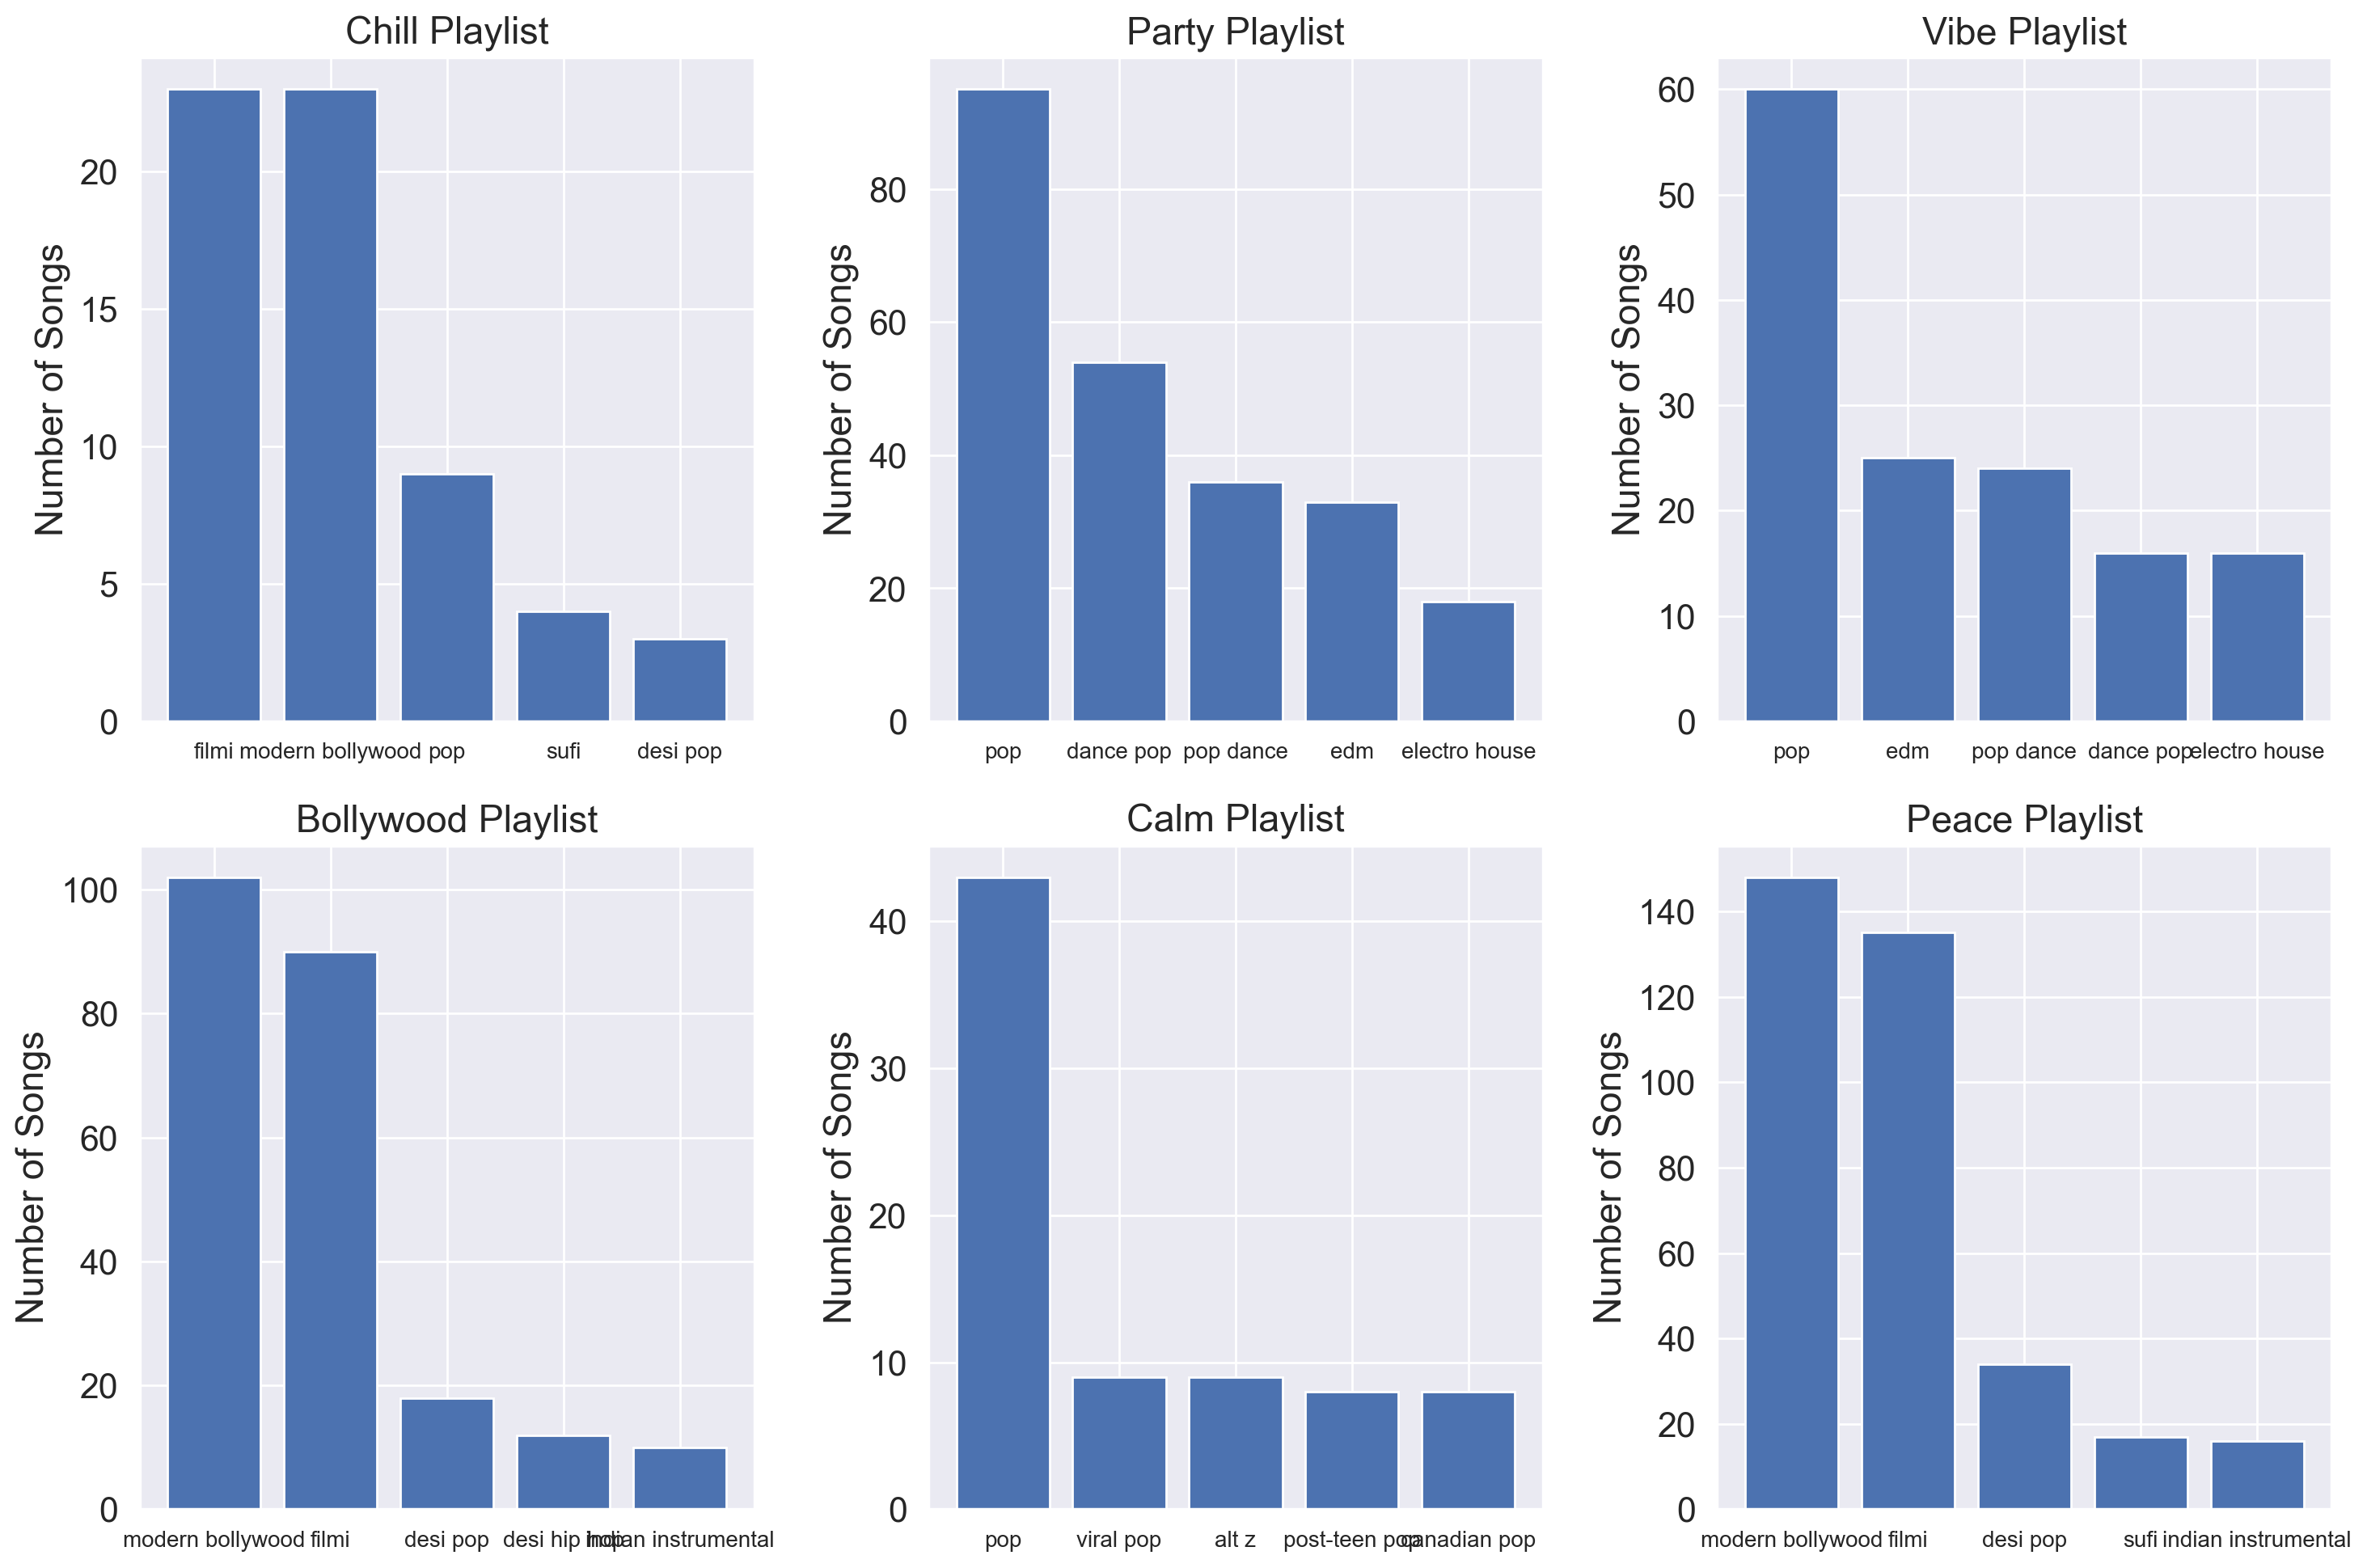

In [23]:
# Create a list of playlist names, IDs, and corresponding track counts
playlists = [
    {'name': 'Chill', 'id': '27kjEeyUgORaTHocNayo6A', 'tracks': 24},
    {'name': 'Party', 'id': '3KM99SC0LjvbtX1fxMAXuk', 'tracks': 97},
    {'name': 'Vibe', 'id': '5N6hukeEop9douhdlONSI1', 'tracks': 160},
    {'name': 'Bollywood', 'id': '7ak4z74RGfVcTAXdQaHxYN', 'tracks': 86},
    {'name': 'Calm', 'id': '0Dtn1Kg8eAke8hGzWCiYoe', 'tracks': 76},
    {'name': 'Peace', 'id': '08MeRULLvHKw3JQG8WXoju', 'tracks': 146}
]

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, playlist in enumerate(playlists):
    # Extract artist URIs from the playlist's tracks
    artist_uris = []
    for item in sp.playlist_tracks(playlist['id'])['items']:
        track_artists = item['track']['artists']
        artist_uris.extend([artist['uri'] for artist in track_artists])

    # Fetch genres for each artist
    genres = []
    for artist_uri in artist_uris:
        artist_info = sp.artist(artist_uri)
        genres.extend(artist_info.get('genres', []))

    # Count occurrence of each genre and sort them
    genre_counts = Counter(genres)
    top_genres = dict(genre_counts.most_common(5))

    # Plot on the corresponding subplot
    row, col = divmod(i, 3)
    ax = axes[row, col]
    ax.bar(top_genres.keys(), top_genres.values())
    ax.set_title(f"{playlist['name']} Playlist")
    ax.set_ylabel('Number of Songs')
    ax.tick_params(axis='x', labelsize=10)

plt.tight_layout()
plt.show()



In [21]:
# From the above visualization we can say that the user's favorite playlist is the Chill Playlist 
# as it's genre distribution is similar to the top 50 songs.

## Extract the Tracks' Audio Features

In [31]:
def fetch_audio_features(sp, username, playlist_id):
    playlist = fetch_playlist_tracks(sp, username, playlist_id)
    index = 0
    audio_features = []
    
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    features_list = []
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['energy'], features['tempo'],
                              features['loudness'], features['valence'],
                              features['speechiness'], features['instrumentalness'],
                              features['liveness'], features['acousticness']])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'energy',
                                                             'tempo', 'loudness', 'valence',
                                                             'speechiness', 'instrumentalness',
                                                             'liveness', 'acousticness'])
    
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_id', inplace=True, drop=True)
        
    return df_playlist_audio_features

In [32]:
df1 = fetch_audio_features(sp, username, '5N6hukeEop9douhdlONSI1')
display(df1.shape)
df1.head(3)

(160, 10)

,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
track_id,,,,,,,,,,
3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),0.700,0.722,90.989,-3.558,0.756,0.0369,0.0000,0.272,0.2210
2tpWsVSb9UEmDRxAl1zhX1,Counting Stars,0.664,0.705,122.016,-4.972,0.477,0.0382,0.0000,0.118,0.0654
3MEYFivt6bilQ9q9mFWZ4g,Alone,0.631,0.953,141.990,-3.739,0.422,0.0343,0.0155,0.108,0.0241


In [91]:
# Getting the same scale for all the features
for feature in df1.columns:
    if feature == 'tempo' or feature == 'loudness':
        continue
    df1[feature] = df1[feature] * 100

In [92]:
df1.head(3)

,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
track_id,,,,,,,,,,
3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior)Mood (feat. iann dior)Mo...,7000.0,7220.0,90.989,-3.558,7560.0,369.0,0.0,2720.0,2210.0
2tpWsVSb9UEmDRxAl1zhX1,Counting StarsCounting StarsCounting StarsCoun...,6640.0,7050.0,122.016,-4.972,4770.0,382.0,0.0,1180.0,654.0
3MEYFivt6bilQ9q9mFWZ4g,AloneAloneAloneAloneAloneAloneAloneAloneAloneA...,6310.0,9530.0,141.990,-3.739,4220.0,343.0,155.0,1080.0,241.0


In [35]:
def fetch_audio_features(sp, username, playlist_id):
    """
    Returns the selected audio features of every track, 
    for the given playlist.
    """
    
    playlist = fetch_playlist_tracks(sp, username, playlist_id)
    index = 0
    audio_features = []
    
    # Make the API request
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    # Append the audio features in a list
    features_list = []
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['energy'], features['tempo'],
                              features['loudness'], features['valence']])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'energy',
                                                             'tempo', 'loudness', 'valence'])

    # Set the 'tempo' & 'loudness' in the same range with the rest features
    for feature in df_audio_features.columns:
        if feature == 'tempo' or feature == 'loudness':
            continue
        df_audio_features[feature] = df_audio_features[feature] * 100
    
    # Create the final df, using the 'track_id' as index for future reference
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_id', inplace=True, drop=True)
    
    return df_playlist_audio_features

In [36]:
df2 = fetch_audio_features(sp, username, '5N6hukeEop9douhdlONSI1')
df2.head(3)

,track_name,danceability,energy,tempo,loudness,valence
track_id,,,,,,
3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),70.0,72.2,90.989,-3.558,75.6
2tpWsVSb9UEmDRxAl1zhX1,Counting Stars,66.4,70.5,122.016,-4.972,47.7
3MEYFivt6bilQ9q9mFWZ4g,Alone,63.1,95.3,141.990,-3.739,42.2


## Access the User's Playlists

In [89]:
playlists = fetch_playlists(sp,username)
playlists = playlists.copy()
playlists

,id,name,#tracks
0,27kjEeyUgORaTHocNayo6A,Chill,24
1,3KM99SC0LjvbtX1fxMAXuk,Party,97
2,5N6hukeEop9douhdlONSI1,Vibe,160
3,7ak4z74RGfVcTAXdQaHxYN,Bollywood,86
4,0Dtn1Kg8eAke8hGzWCiYoe,Calm,76
5,08MeRULLvHKw3JQG8WXoju,Peace,146


In [90]:
df_chill = fetch_audio_features(sp, username, '27kjEeyUgORaTHocNayo6A')
df_party = fetch_audio_features(sp, username, '3KM99SC0LjvbtX1fxMAXuk')
df_vibe = fetch_audio_features(sp, username, '5N6hukeEop9douhdlONSI1')
df_bollywood = fetch_audio_features(sp, username, '7ak4z74RGfVcTAXdQaHxYN')
df_calm = fetch_audio_features(sp, username, '0Dtn1Kg8eAke8hGzWCiYoe')
df_peace = fetch_audio_features(sp, username, '08MeRULLvHKw3JQG8WXoju')

In [39]:
df_chill = df_chill.iloc[:, 1:]

In [40]:
df_party = df_party.iloc[:, 1:]

In [41]:
df_vibe = df_vibe.iloc[:, 1:]

In [42]:
df_bollywood = df_bollywood.iloc[:, 1:]

In [43]:
df_calm = df_calm.iloc[:, 1:]

In [44]:
df_peace = df_peace.iloc[:, 1:]

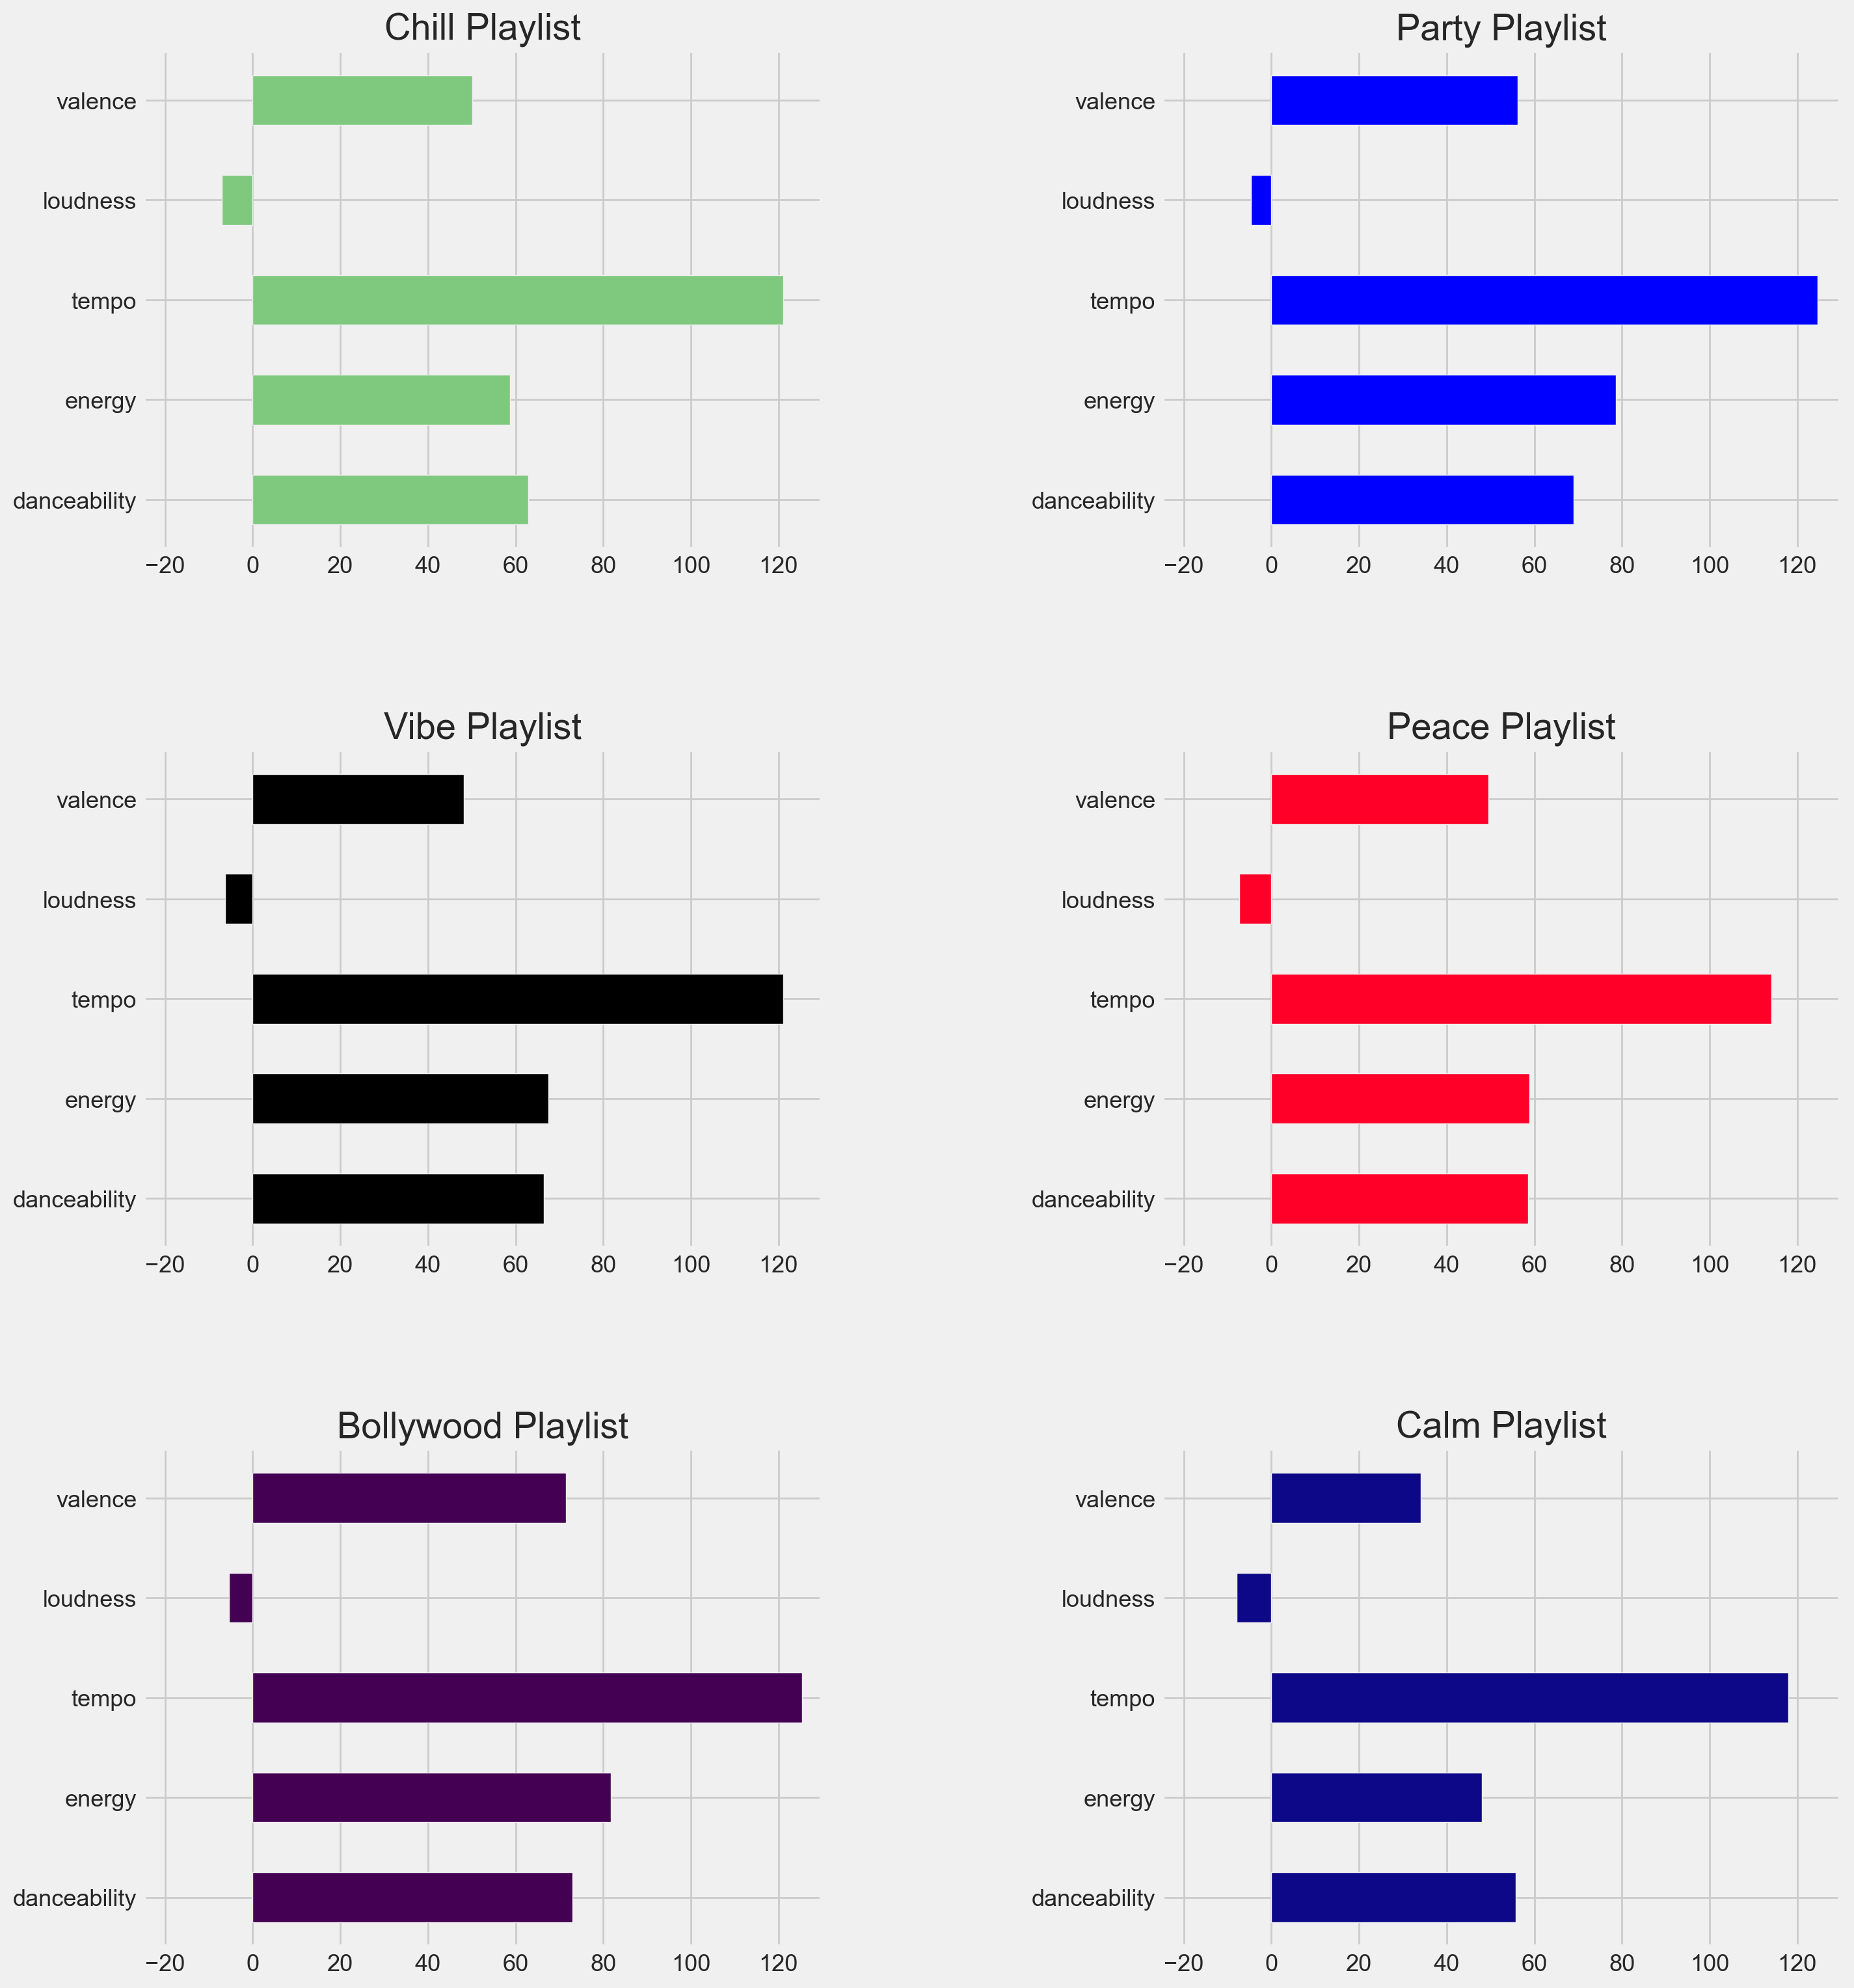

In [165]:
# Create a figure
plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()
fig.subplots_adjust(hspace=.4, wspace=.5)

# top left
df_chill.mean().plot.barh(ax=ax1, colormap=plt.cm.Accent, fontsize=13)
ax1.set_xlim(-25, 130)

# top right
df_party.mean().plot.barh(ax=ax2, colormap='winter', fontsize=13)
ax2.set_xlim(-25, 130)

# middle left
df_vibe.mean().plot.barh(ax=ax3, colormap='cubehelix', fontsize=13)
ax3.set_xlim(-25, 130)

# middle right
df_peace.mean().plot.barh(ax=ax4, colormap='gist_rainbow', fontsize=13)
ax4.set_xlim(-25, 130)

# bottom left
df_bollywood.mean().plot.barh(ax=ax5, colormap='viridis', fontsize=13)
ax5.set_xlim(-25, 130)

# bottom right
df_calm.mean().plot.barh(ax=ax6, colormap='plasma', fontsize=13)
ax6.set_xlim(-25, 130)

# Create axis titles
ax1.set_title('Chill Playlist')
ax2.set_title('Party Playlist')
ax3.set_title('Vibe Playlist')
ax4.set_title('Peace Playlist')
ax5.set_title('Bollywood Playlist')
ax6.set_title('Calm Playlist')

plt.show()


More than obviously, the `Party` and `Vibe` playlists are more suitable according to the danceability, the rest can be ignored.

### Emotion Analysis of the playlists

In [94]:
party_playlist_tracks = fetch_playlist_tracks_artist(sp, username, '3KM99SC0LjvbtX1fxMAXuk')
party_playlist_tracks.head(3)

,track_id,track_name,artist_name
0,6YUTL4dYpB9xZO5qExPf05,Summer,Calvin Harris
1,1HOlb9rdNOmy9b1Fakicjo,#SELFIE,The Chainsmokers
2,03UrZgTINDqvnUMbbIMhql,Gangnam Style (강남스타일),PSY


In [95]:
vibe_playlist_tracks = fetch_playlist_tracks_artist(sp, username, '5N6hukeEop9douhdlONSI1')
vibe_playlist_tracks.head(3)

,track_id,track_name,artist_name
0,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),24kGoldn
1,2tpWsVSb9UEmDRxAl1zhX1,Counting Stars,OneRepublic
2,3MEYFivt6bilQ9q9mFWZ4g,Alone,Marshmello


In [100]:
def lyrics(song, artist):
    genius_access_token = 'nZSwqdNakF9oFO8W1lzOfjHXpRNq4-jViP1uTHrIsp0mG881k2bF5ySju01TN4cP'
    genius = lg.Genius(genius_access_token)
    song = genius.search_song(title=song, artist=artist)
    try:
        return song.lyrics
    except AttributeError:
        return None

def clean_lyrics(lyrics):
    # Remove everything before and including the first ']'
    cleaned_lyrics = lyrics.split(']', 1)[-1].strip()

    # Remove various sections like [Verse 1], [Pre-Chorus], etc.
    sections = ['[Verse', '[Pre-Chorus', '[Chorus', '[Verse', '[Outro', '[Intro', '[Bridge', '[Post-Chorus']
    for section in sections:
        cleaned_lyrics = cleaned_lyrics.replace(section, '')

    return cleaned_lyrics

In [128]:
# Iterate over the rows of the DataFrame and fetch lyrics for each song
for index, row in party_playlist_tracks.iterrows():
    artist_name = row['artist_name']
    song_name = row['track_name']
    current_lyrics = lyrics(song_name, artist_name)

    if current_lyrics:
        # Clean the lyrics and save in the 'lyrics' column
        cleaned_lyrics = clean_lyrics(current_lyrics)
        party_playlist_tracks.at[index, 'lyrics'] = cleaned_lyrics
    else:
        print(f"No lyrics found for {artist_name} - {song_name}\n{'='*50}\n")

# Now 'vibe_playlist_tracks' DataFrame has the 'lyrics' column populated with cleaned lyrics

Searching for "Summer" by Calvin Harris...
Done.
Searching for "#SELFIE" by The Chainsmokers...
Done.
Searching for "Gangnam Style (강남스타일)" by PSY...
Done.
Searching for "Timber (feat. Ke$ha)" by Pitbull...
Done.
Searching for "We Are One (Ole Ola) [The Official 2014 FIFA World Cup Song] (feat. Jennifer Lopez & Claudia Leitte)" by Pitbull...
No results found for: 'We Are One (Ole Ola) [The Official 2014 FIFA World Cup Song] (feat. Jennifer Lopez & Claudia Leitte) Pitbull'
No lyrics found for Pitbull - We Are One (Ole Ola) [The Official 2014 FIFA World Cup Song] (feat. Jennifer Lopez & Claudia Leitte)

Searching for "Give Me Everything (feat. Ne-Yo, Afrojack & Nayer)" by Pitbull...
Done.
Searching for "Danza Kuduro - Original Mix" by Don Lore V...
No results found for: 'Danza Kuduro - Original Mix Don Lore V'
No lyrics found for Don Lore V - Danza Kuduro - Original Mix

Searching for "Mr. Saxobeat - Radio Edit" by Alexandra Stan...
Done.
Searching for "Rain Over Me (feat. Marc Anthony)"

In [105]:
vibe_playlist_tracks.head(3)

,track_id,track_name,artist_name,lyrics
0,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),24kGoldn,""" - Sech\n38. ""Chica Ideal"" - Sebastián Yatra\..."
1,2tpWsVSb9UEmDRxAl1zhX1,Counting Stars,OneRepublic,"Lately, I've been, I've been losin' sleep\nDre..."
2,3MEYFivt6bilQ9q9mFWZ4g,Alone,Marshmello,"I'm so alone, nothing feels like home\nI'm so ..."


In [129]:
party_playlist_tracks.head()

,track_id,track_name,artist_name,lyrics
0,6YUTL4dYpB9xZO5qExPf05,Summer,Calvin Harris,When I met you in the summer\nTo my heartbeat'...
1,1HOlb9rdNOmy9b1Fakicjo,#SELFIE,The Chainsmokers,When Jason was at the table\nI kept on seeing ...
2,03UrZgTINDqvnUMbbIMhql,Gangnam Style (강남스타일),PSY,Oppa Gangnam Stil!\nGangnam Stil!\n\n 1]\nEin ...
3,3cHyrEgdyYRjgJKSOiOtcS,Timber (feat. Ke$ha),Pitbull,5 ContributorsRadio Hamburg TOP 825 Lyrics825 ...
4,1PCvKFPWnTXAe2oaReVUcr,We Are One (Ole Ola) [The Official 2014 FIFA W...,Pitbull,NaN


In [111]:
# Load the NRC Emotion Lexicon
nrc_lexicon_path = 'C:/Users/Khushi/Downloads/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'

# Load the NRC Emotion Lexicon into a dictionary
nrc_lexicon = {}
with open(nrc_lexicon_path, 'r') as file:
    for line in file:
        word, emotion, score = line.strip().split('\t')
        if word not in nrc_lexicon:
            nrc_lexicon[word] = {}
        nrc_lexicon[word][emotion] = int(score)

# Define a function to get the dominant emotion excluding positive and negative
def get_dominant_emotion_excluding_pos_neg(lyrics):
    # Tokenize the lyrics into words
    tokens = word_tokenize(lyrics)

    # Remove stop words
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]

    # Calculate emotion scores excluding positive and negative
    emotion_scores = {emotion: sum(scores.get(emotion, 0) for word, scores in nrc_lexicon.items() if word in filtered_tokens) for emotion in nrc_lexicon[next(iter(nrc_lexicon))].keys() if emotion not in ['positive', 'negative', 'anticipation', 'trust']}

    # Identify the dominant emotion
    dominant_emotion = max(emotion_scores, key=emotion_scores.get)

    return dominant_emotion

In [115]:
# Create a new column 'dominant_emotion' and apply the updated function
vibe_playlist_tracks['dominant_emotion'] = vibe_playlist_tracks['lyrics'].apply(lambda x: get_dominant_emotion_excluding_pos_neg(x) if pd.notnull(x) else np.nan)

,track_id,track_name,artist_name,lyrics,dominant_emotion
0,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),24kGoldn,""" - Sech\n38. ""Chica Ideal"" - Sebastián Yatra\...",joy
1,2tpWsVSb9UEmDRxAl1zhX1,Counting Stars,OneRepublic,"Lately, I've been, I've been losin' sleep\nDre...",joy
2,3MEYFivt6bilQ9q9mFWZ4g,Alone,Marshmello,"I'm so alone, nothing feels like home\nI'm so ...",anger
3,60EFFQmSfrNMPUMGnfxBbO,Levitate - From The Original Motion Picture “P...,Imagine Dragons,where s is a complex number.\n\nLawrence found...,fear
4,0ct6r3EGTcMLPtrXHDvVjc,The Nights,Avicii,(Hey) Once upon a younger year\nWhen all our s...,fear


In [134]:
# Display the DataFrame
vibe_playlist_emotion = vibe_playlist_tracks
vibe_playlist_emotion.head()

,track_id,track_name,artist_name,lyrics,dominant_emotion
0,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),24kGoldn,""" - Sech\n38. ""Chica Ideal"" - Sebastián Yatra\...",joy
1,2tpWsVSb9UEmDRxAl1zhX1,Counting Stars,OneRepublic,"Lately, I've been, I've been losin' sleep\nDre...",joy
2,3MEYFivt6bilQ9q9mFWZ4g,Alone,Marshmello,"I'm so alone, nothing feels like home\nI'm so ...",anger
3,60EFFQmSfrNMPUMGnfxBbO,Levitate - From The Original Motion Picture “P...,Imagine Dragons,where s is a complex number.\n\nLawrence found...,fear
4,0ct6r3EGTcMLPtrXHDvVjc,The Nights,Avicii,(Hey) Once upon a younger year\nWhen all our s...,fear


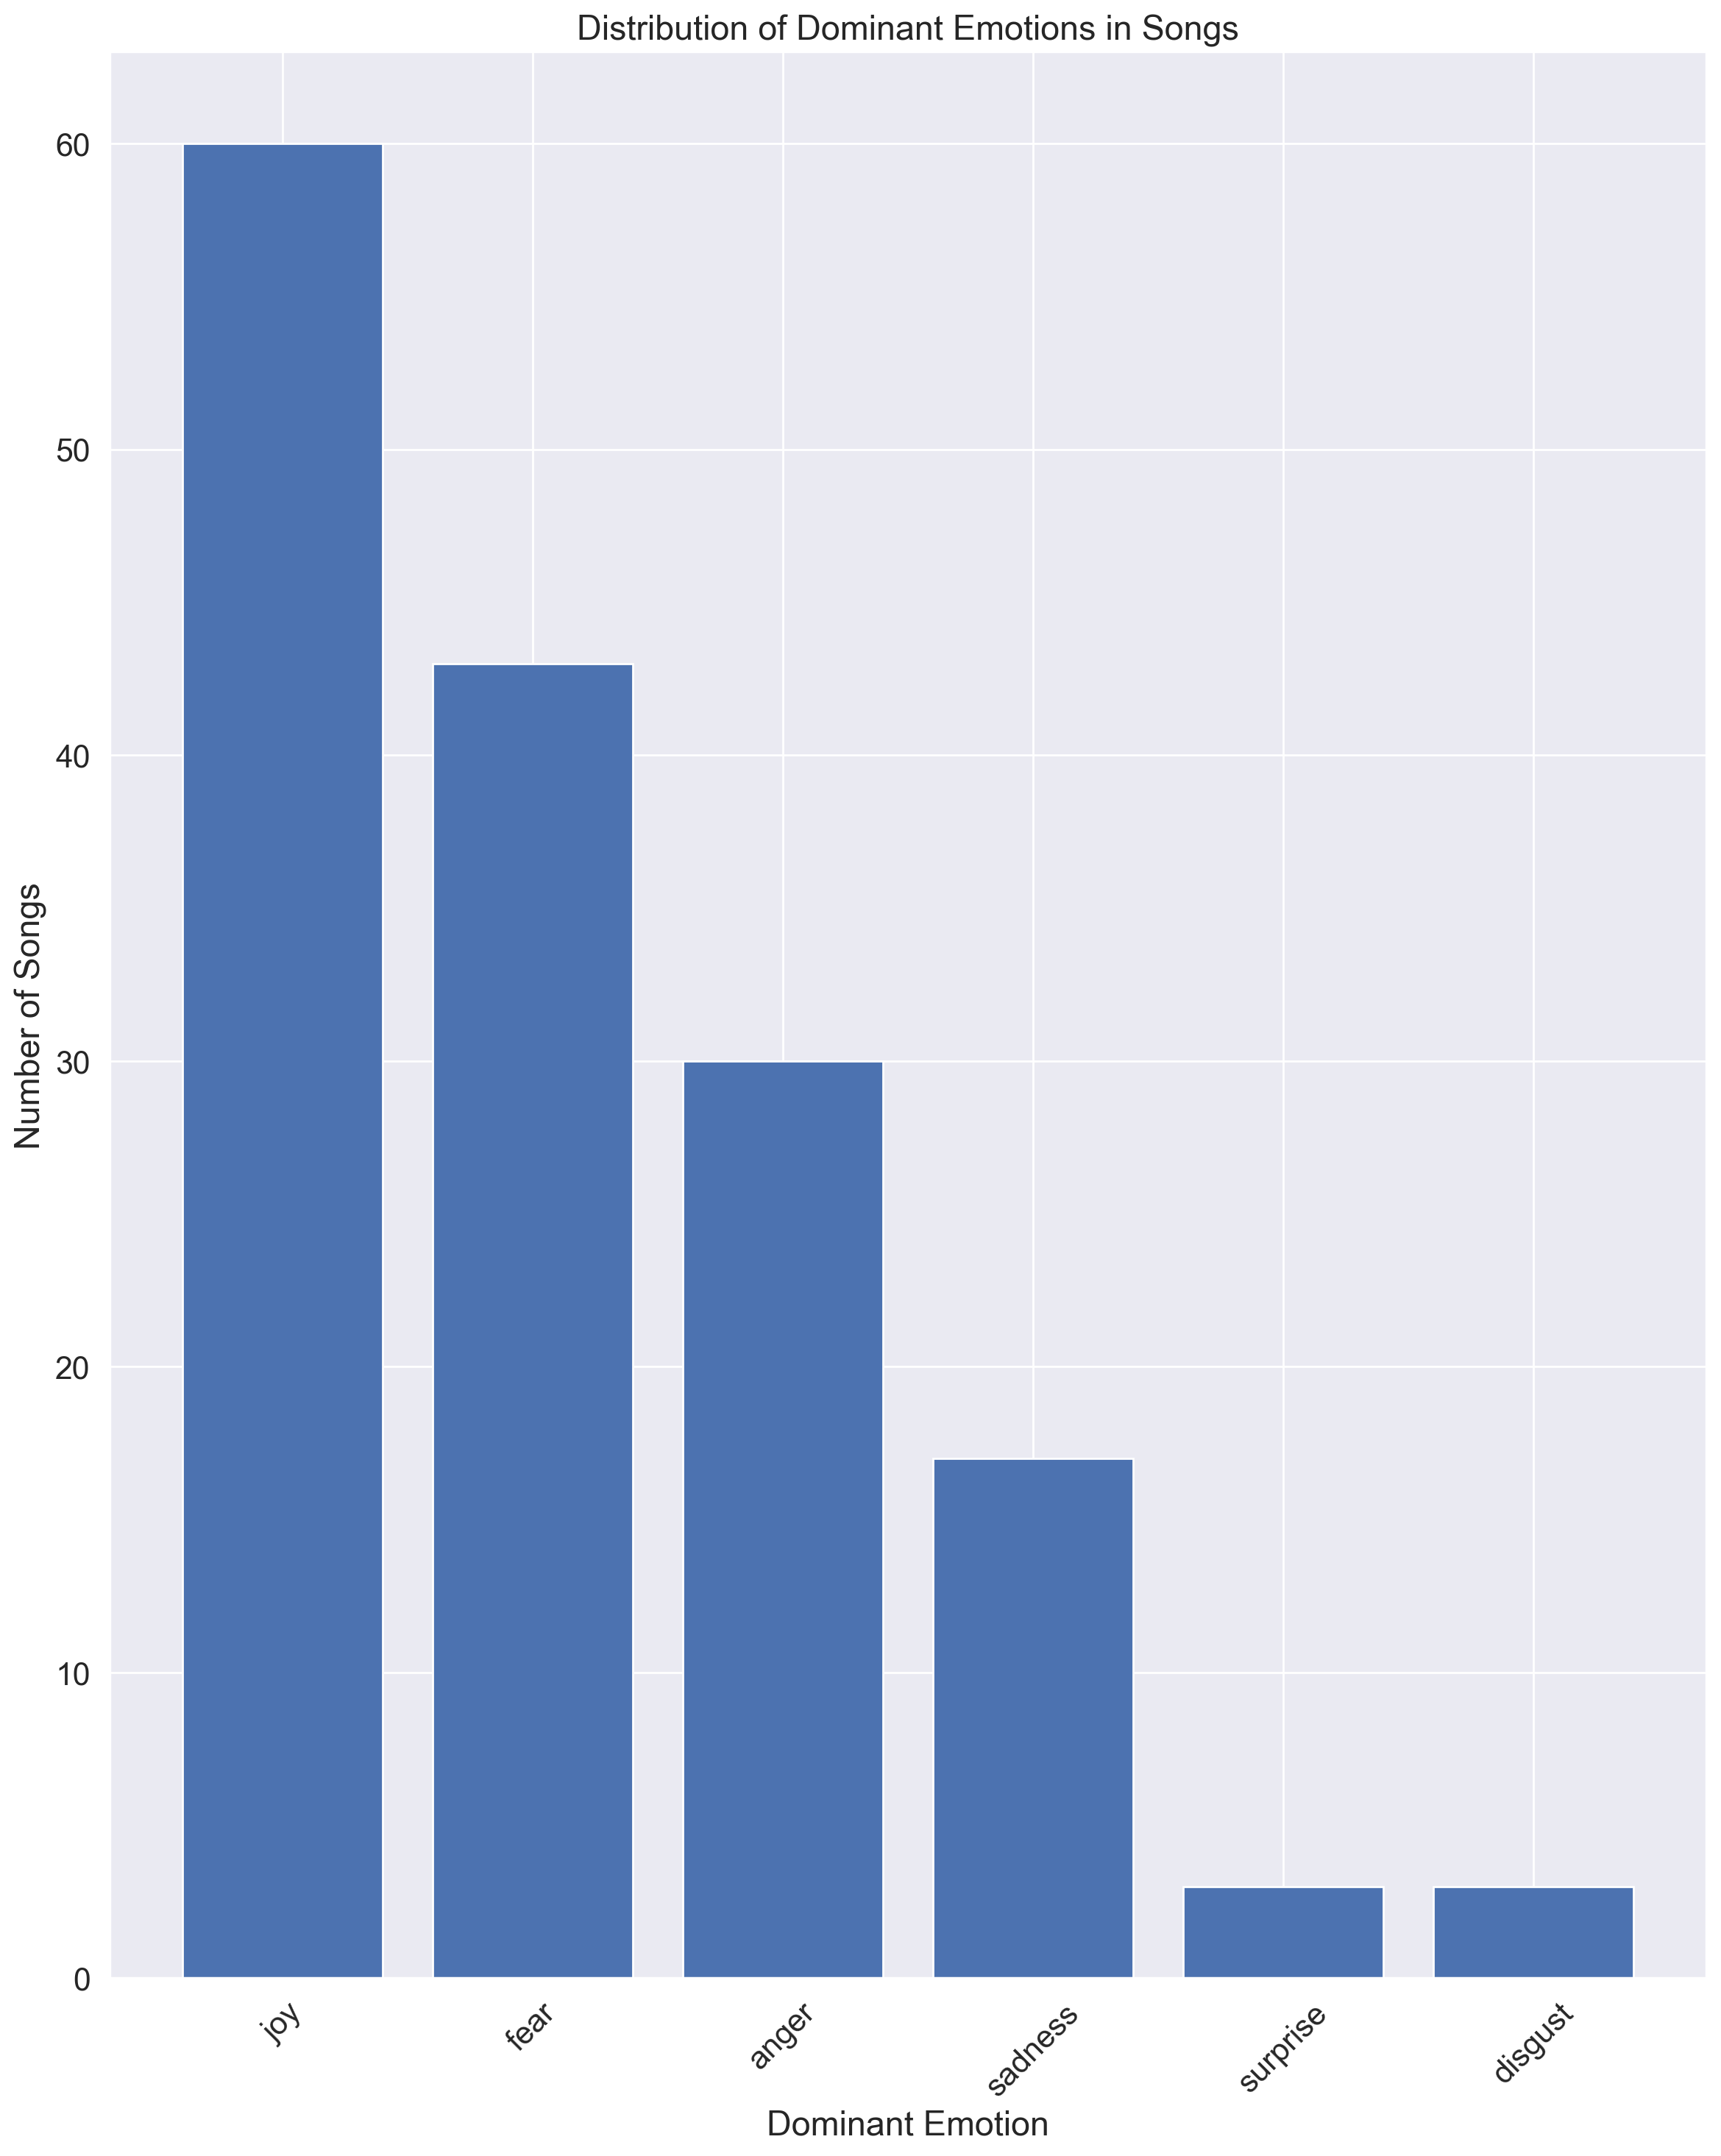

In [116]:
# Count the occurrences of each dominant emotion
emotion_counts = vibe_playlist_tracks['dominant_emotion'].value_counts()

# Plotting the bar graph
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Dominant Emotion')
plt.ylabel('Number of Songs')
plt.title('Distribution of Dominant Emotions in Songs')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create a new column 'dominant_emotion' and apply the updated function
party_playlist_tracks['dominant_emotion'] = party_playlist_tracks['lyrics'].apply(lambda x: get_dominant_emotion_excluding_pos_neg(x) if pd.notnull(x) else np.nan)

In [135]:
# Display the DataFrame
party_playlist_emotion = party_playlist_tracks
party_playlist_emotion.tail()

,track_id,track_name,artist_name,lyrics,dominant_emotion
92,6Qn5zhYkTa37e91HC1D7lb,Whatever It Takes,Imagine Dragons,Falling too fast to prepare for this\nTripping...,sadness
93,3zkWCteF82vJwv0hRLba76,Stitches,Shawn Mendes,1]\nI thought that I'd been hurt before\nBut ...,fear
94,7ef4DlsgrMEH11cDZd32M6,One Kiss (with Dua Lipa),Calvin Harris,5 ContributorsArtist Archive: Dua Lipa Lyrics2...,joy
95,0ESnKwgjWBD9wnCbZpY3g4,Cake By The Ocean,DNCE,"Nah, nah, nah\nCake by the ocean\n\n 1]\nOh, n...",joy
96,22skzmqfdWrjJylampe0kt,Can't Hold Us (feat. Ray Dalton),Macklemore & Ryan Lewis,3 ContributorsHot Rap Songs Chart 25th Anniver...,joy


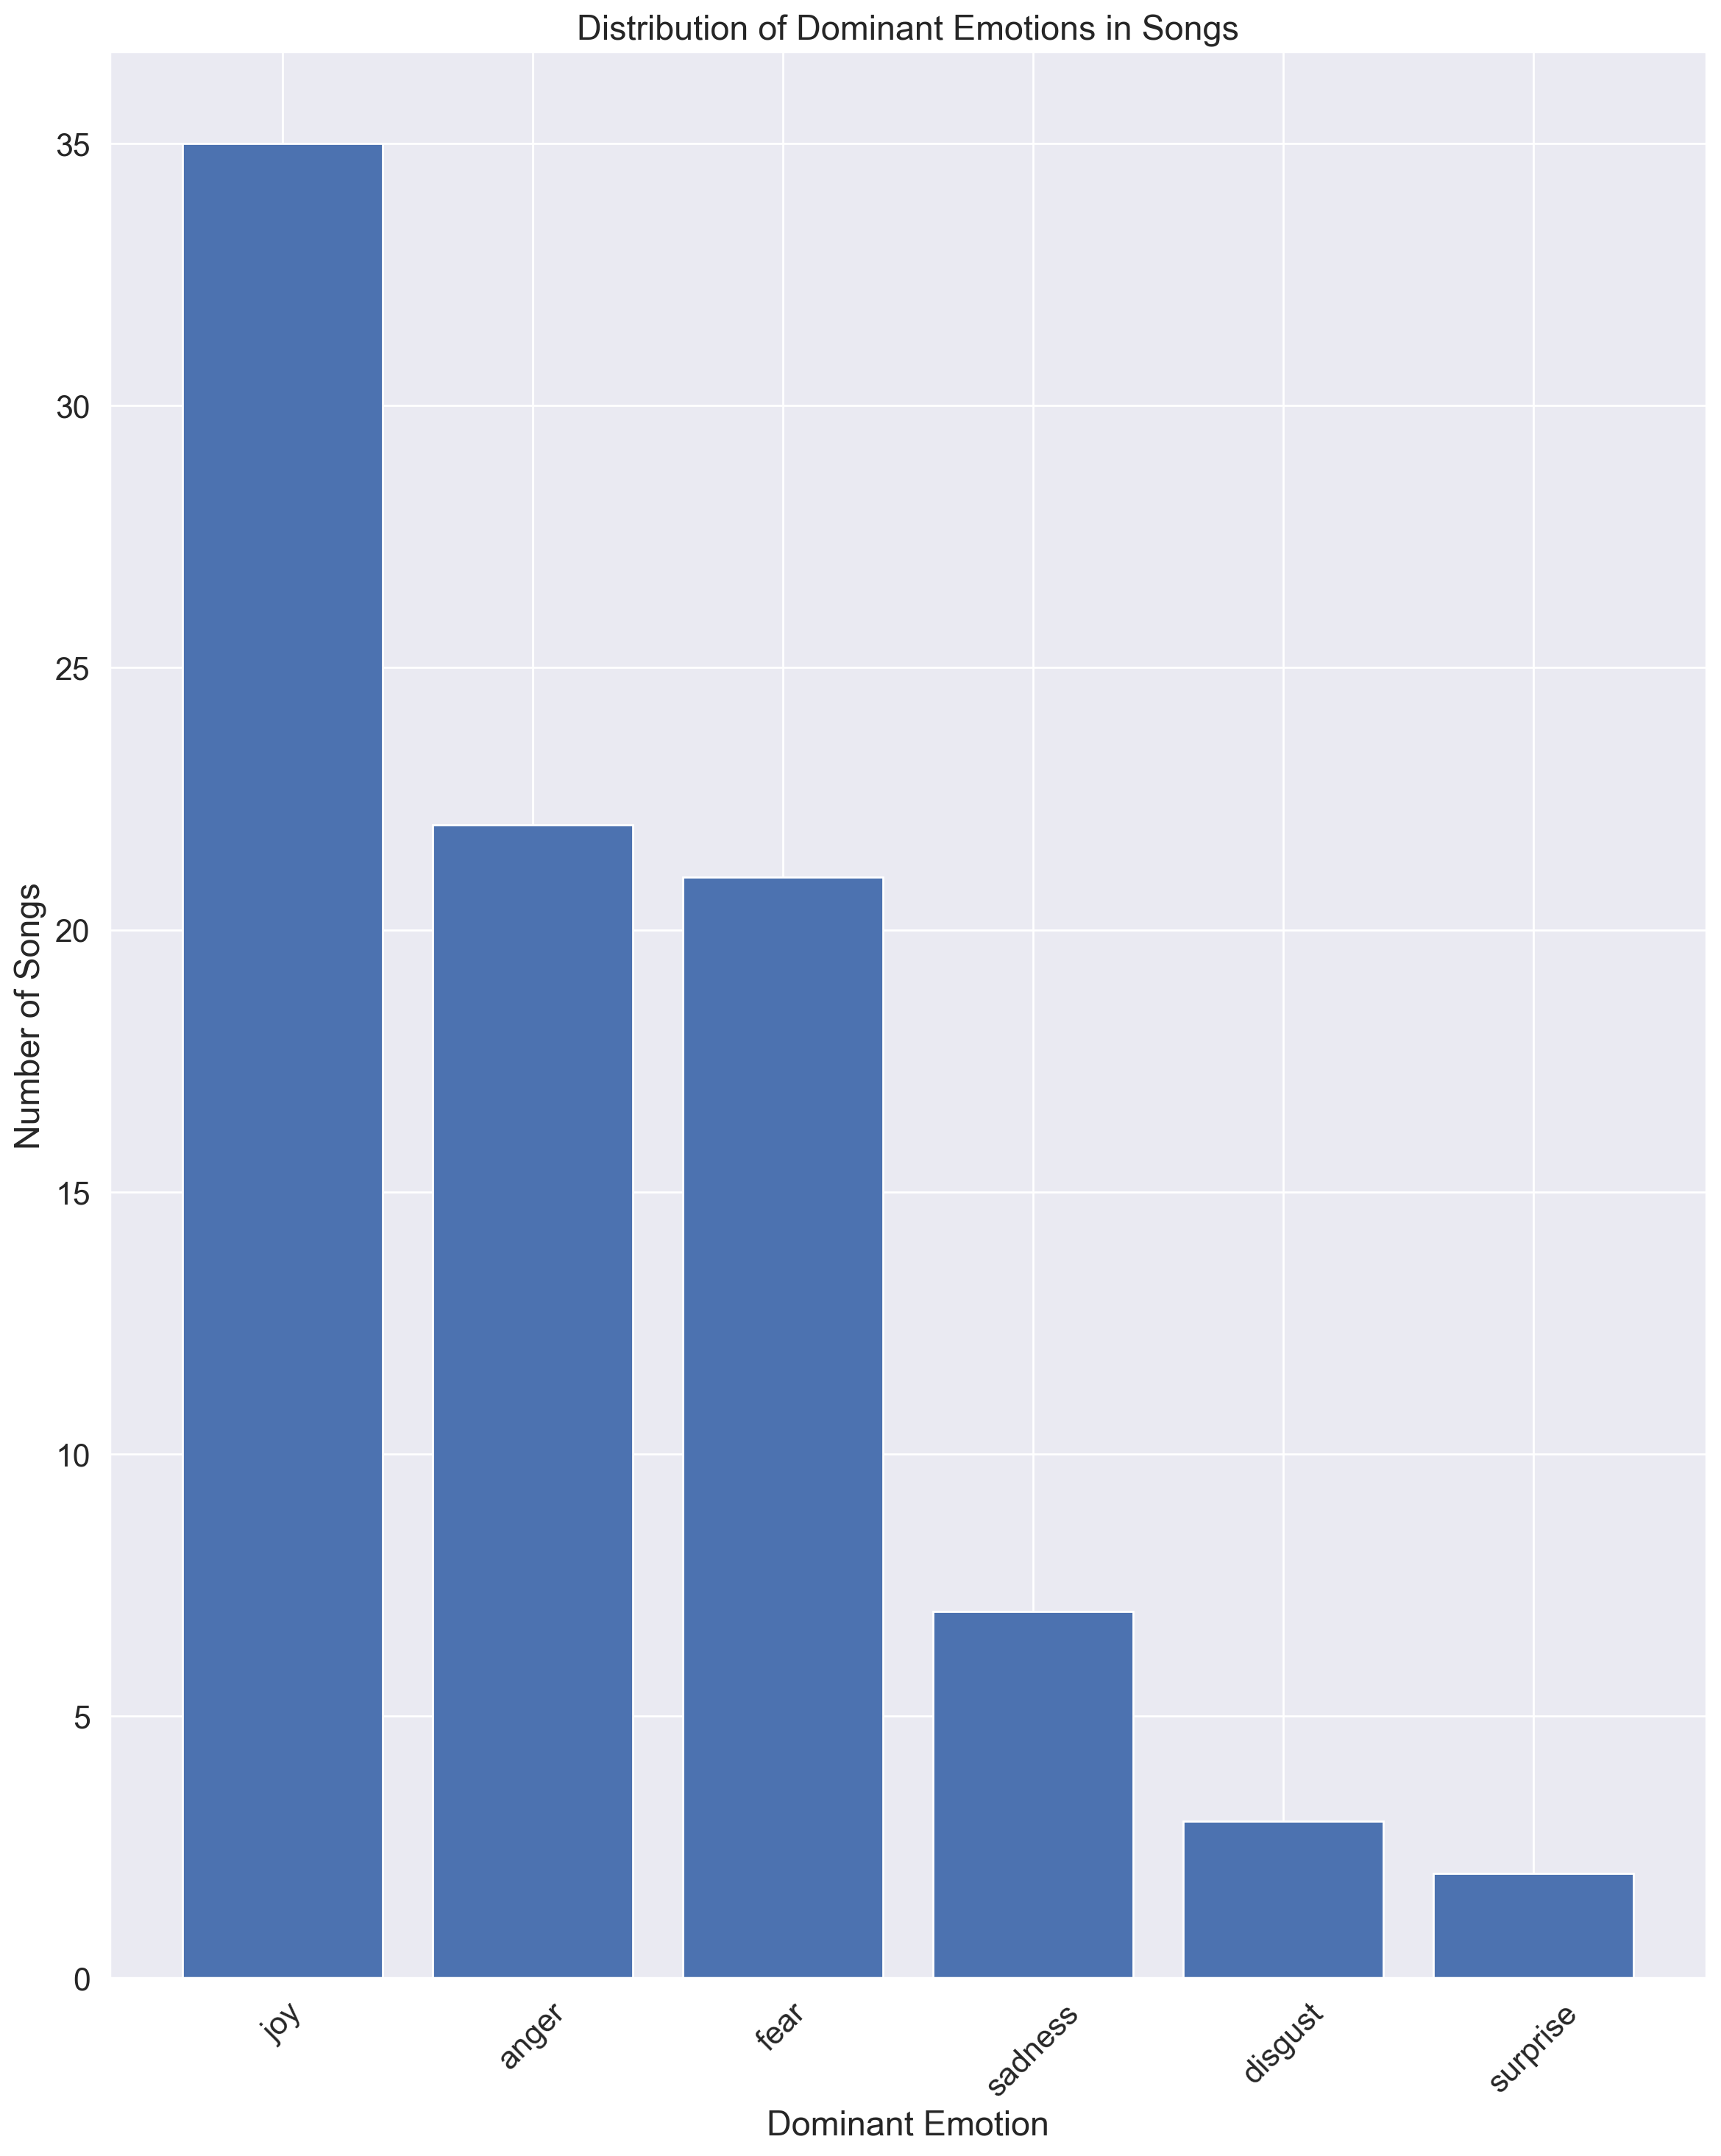

In [131]:
# Count the occurrences of each dominant emotion
emotion_counts = party_playlist_emotion['dominant_emotion'].value_counts()

# Plotting the bar graph
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Dominant Emotion')
plt.ylabel('Number of Songs')
plt.title('Distribution of Dominant Emotions in Songs')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# In both the playlists, joy is the dominant emotion in most of the songs.

Working again on the Audio Features of the two playlists to see which one is better out of the two

In [45]:
display(df_party.mean())
display(df_party.shape)
display(df_vibe.mean())
df_vibe.shape

danceability     68.939175
energy           78.656701
tempo           124.627969
loudness         -4.710433
valence          56.245979
dtype: float64

(97, 5)

danceability     66.385000
energy           67.492500
tempo           121.072000
loudness         -6.275963
valence          48.214750
dtype: float64

(160, 5)

In [46]:
party_mean = pd.DataFrame(df_party.mean(), columns= ['party_playlist'])
vibe_mean = pd.DataFrame(df_vibe.mean(), columns= ['vibe_playlist'])

In [47]:
party_vibe_mean = pd.concat([party_mean, vibe_mean], axis=1)
party_vibe_mean

,party_playlist,vibe_playlist
danceability,68.939175,66.385000
energy,78.656701,67.492500
tempo,124.627969,121.072000
loudness,-4.710433,-6.275963
valence,56.245979,48.214750


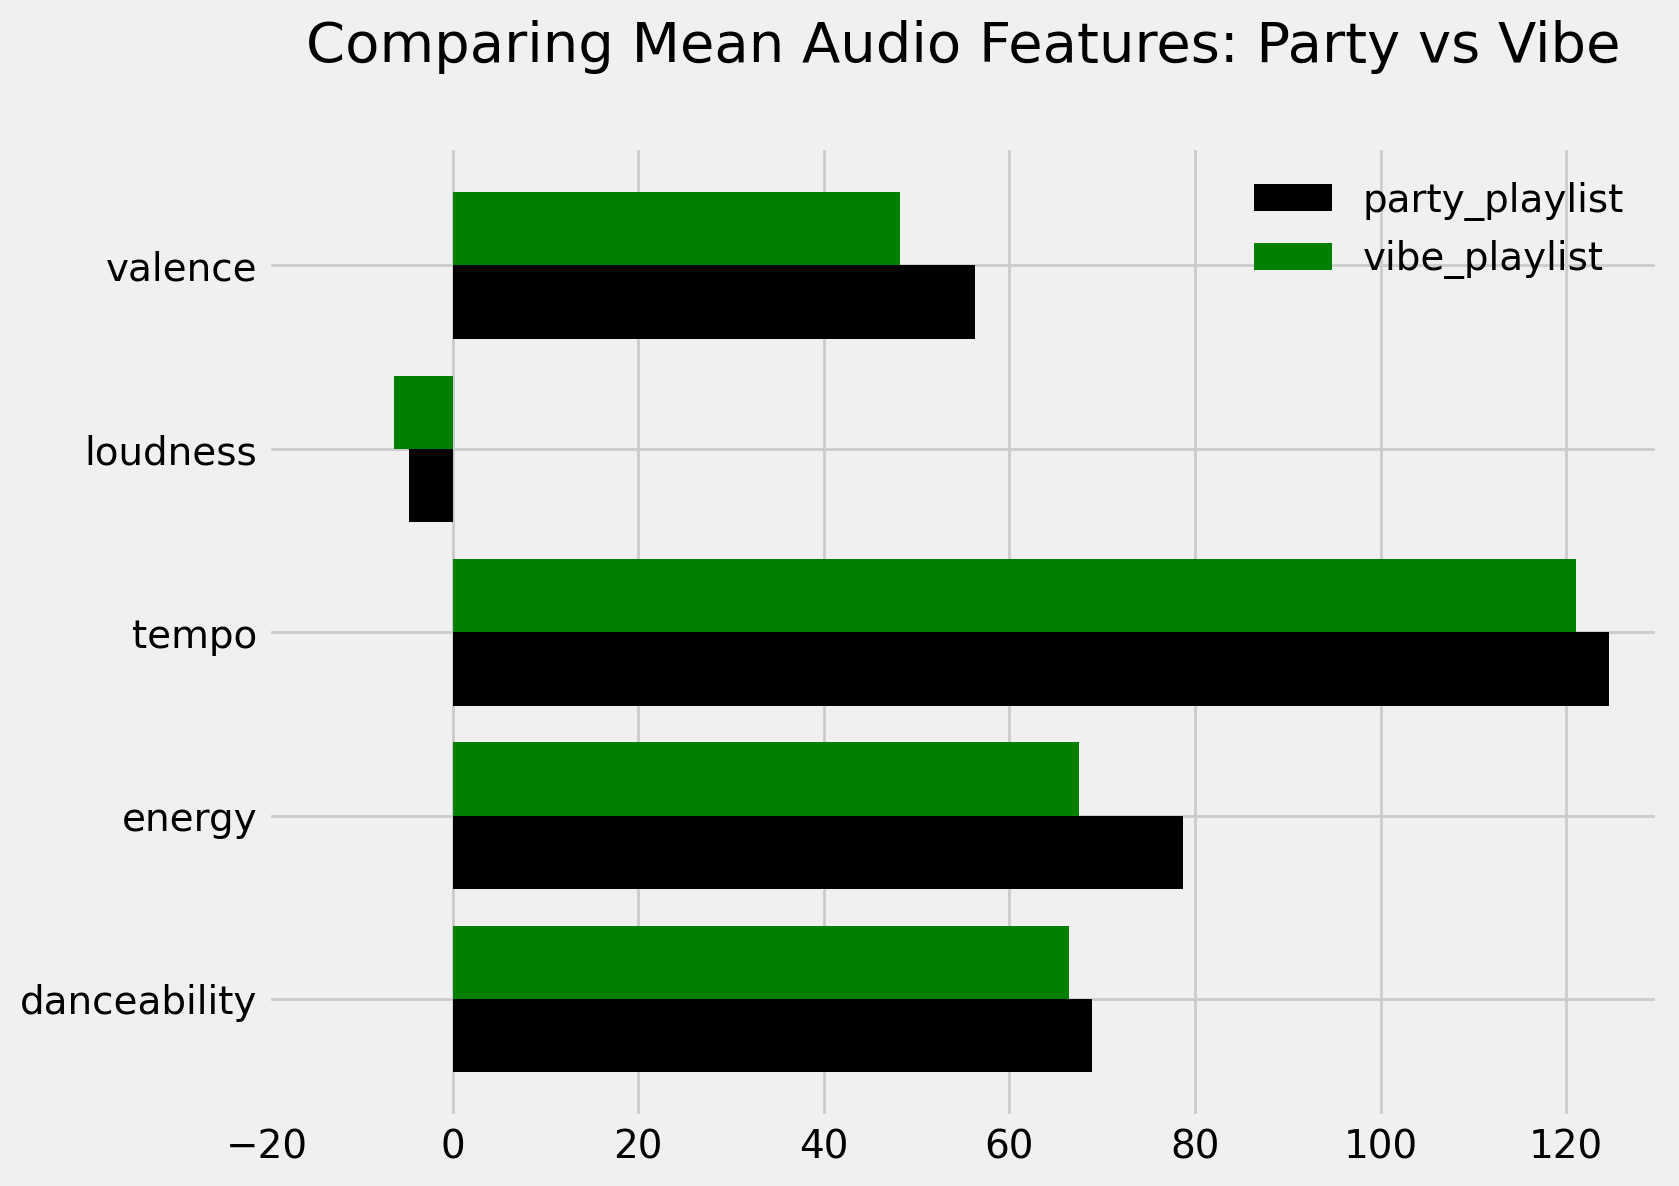

In [48]:
plt.style.use('fivethirtyeight')

party_vibe_mean.plot.barh(color = ['black', 'green'],  width = .8, rot = 0, figsize = (8,6))
plt.title('Comparing Mean Audio Features: Party vs Vibe', y = 1.07)
plt.xlim(-20,130) # because ratings start at 0 and end at 5
plt.legend(framealpha = 0, loc = 'upper right')
plt.show()

Indeed, the `Party` playlist is better than the `Vibe` one, in terms of the
`danceability`, `loudness`, `tempo`, `energy` & `valence` audio features. So, we are going to focus on this one and get it as better it can be.

In [87]:
df_party.describe()

,danceability,energy,tempo,loudness,valence,score
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,68.939175,78.656701,124.627969,-4.710433,56.245979,7211.683918
std,12.717660,13.045369,23.219881,1.483638,23.101854,816.477808
min,25.900000,42.500000,85.979000,-10.965000,3.480000,5376.150000
25%,61.800000,71.600000,103.019000,-5.461000,41.200000,6591.940000
50%,67.200000,80.000000,126.957000,-4.374000,59.200000,7237.090000
75%,78.500000,88.400000,130.005000,-3.840000,74.700000,7821.160000
max,95.100000,99.000000,191.950000,-2.117000,96.900000,9046.130000


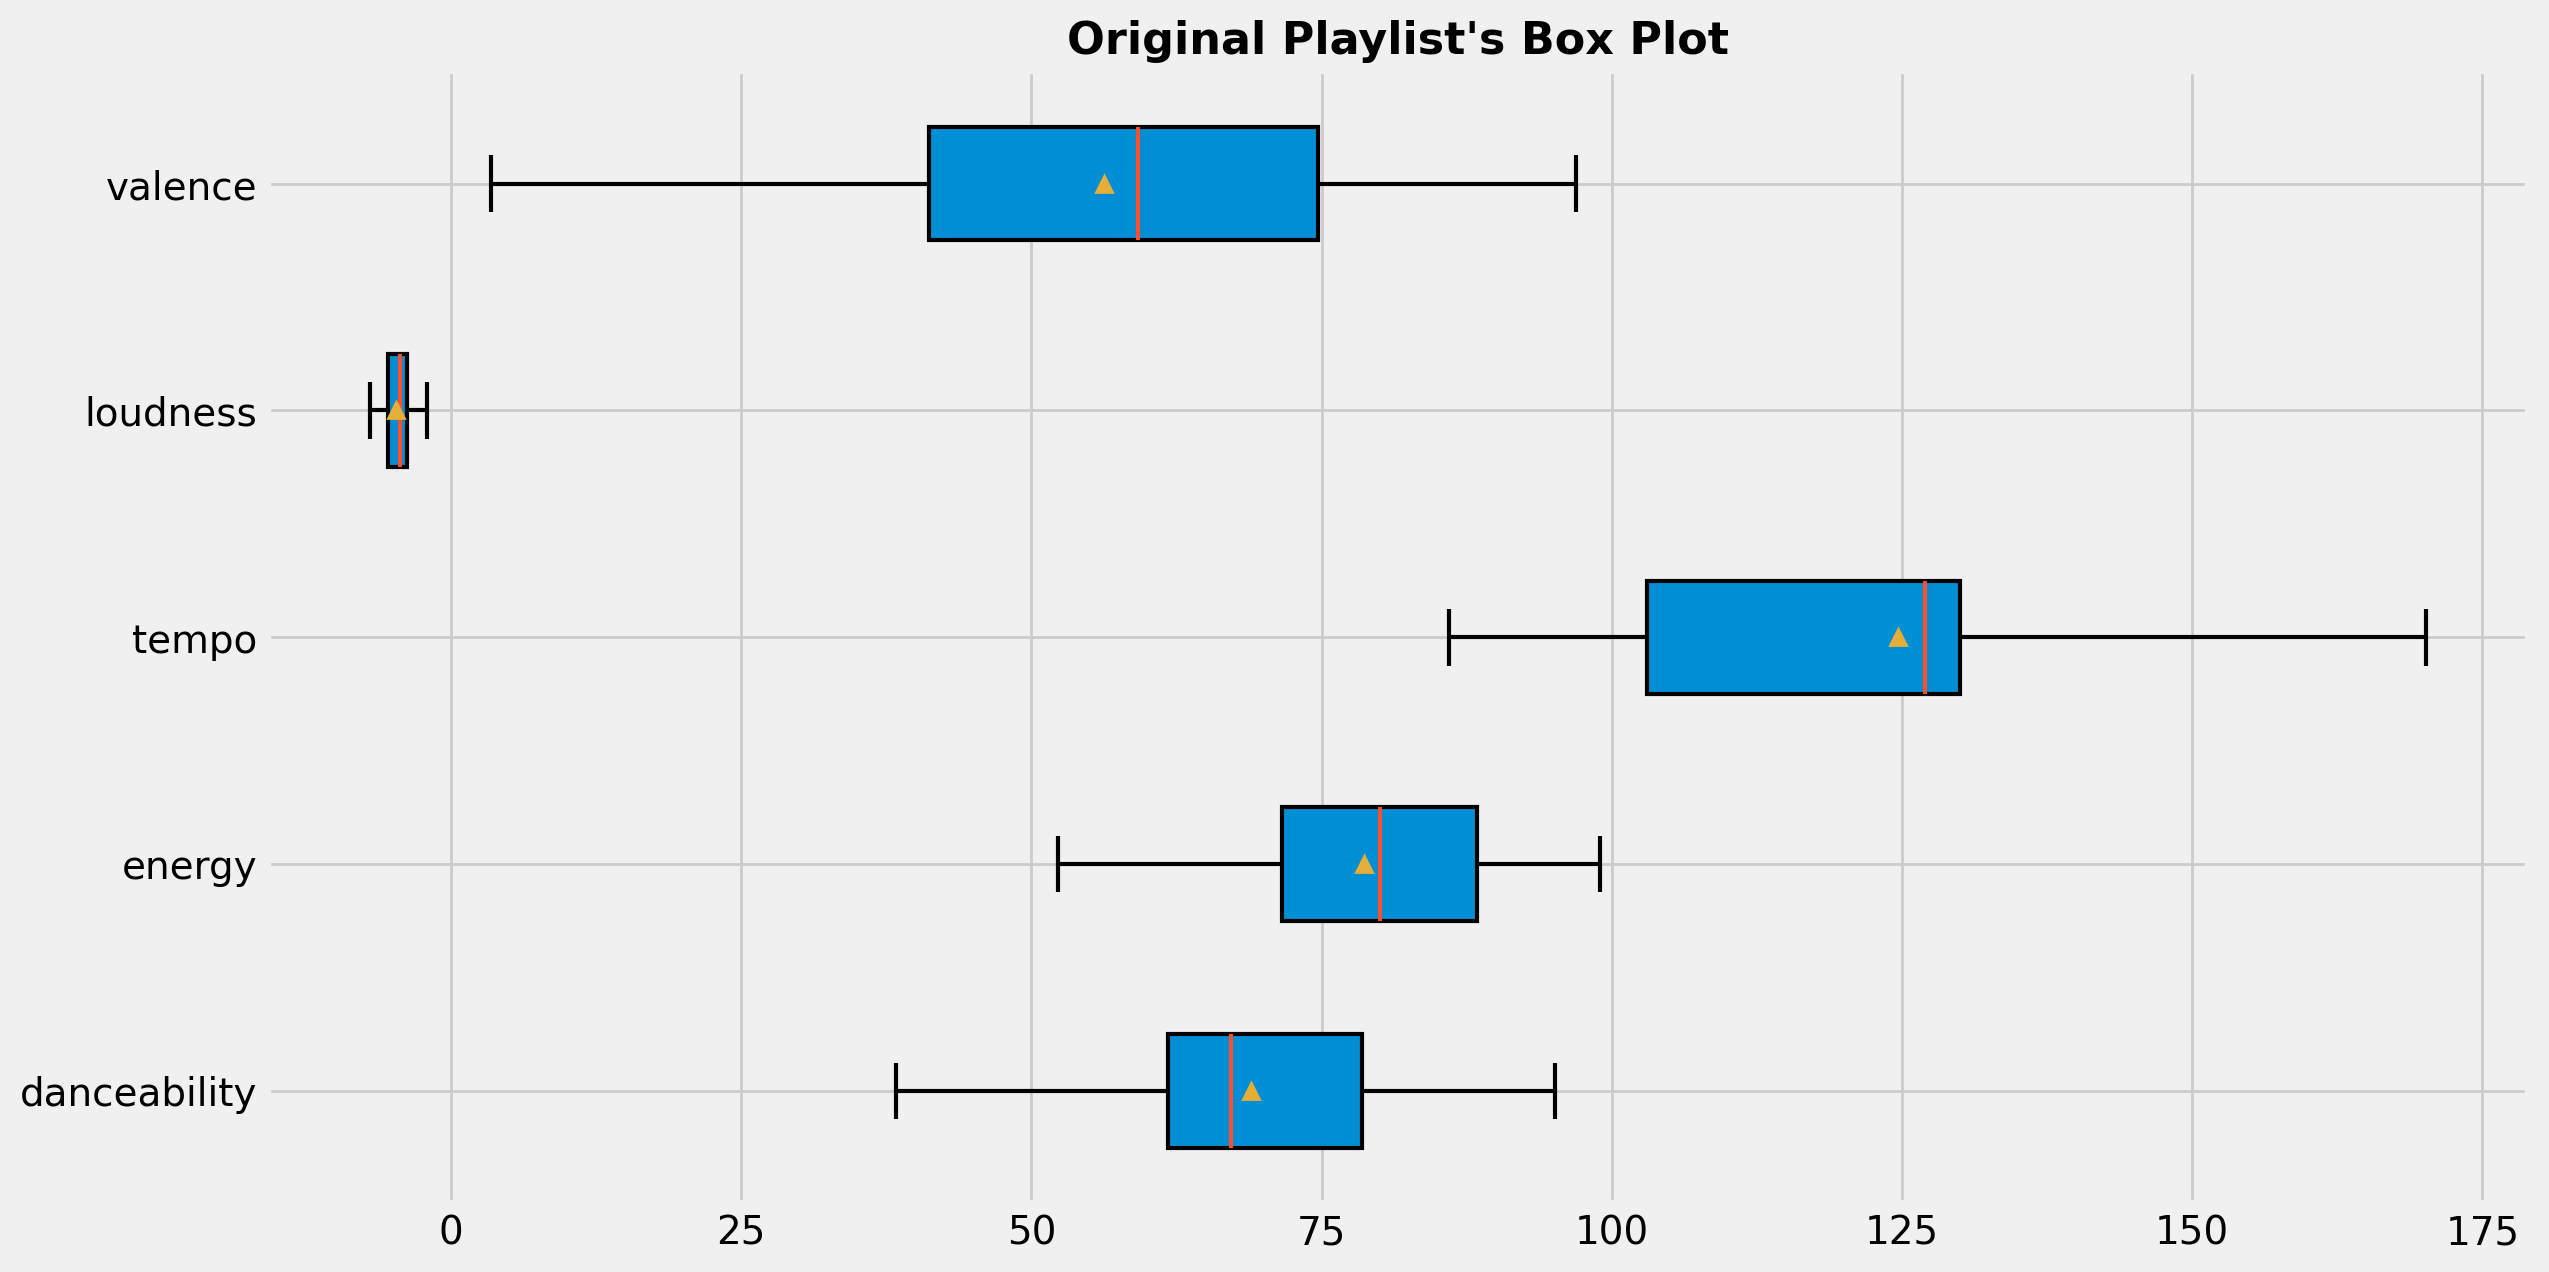

In [93]:
df_party.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Original Playlist's Box Plot", fontsize=16, fontweight='heavy')
plt.show()

🔹From the above Box-and-Whisker plot we can better perceive each feature's individual distribution, which compared to the table of descriptive statistics, gives us a good visual intuition about the proportion of values that fall under a certain quartile, between any two quartiles, or between a quartile and the minimum or the maximum value in the distribution.

🔹We generally aim to "push" the distribution of each feature as much as possible to the right, that is, to increase them along the playist's tracks, in order to achiveve a better "party" experience! This may effectively be done by adding or removing certain tracks from the playlist. 

🔹We can compare the Median (2nd percentile, indicated by the tringle spot) with the Mean value (indicated by the vertical line), for each one feature and:

* either shift the Mean to the right (increase the average audio feature)
* or shift the Median to the right of the Mean (ensure that at least 50% of songs are above of the average)
* or both

That said, the `valence`, `loudness` & `energy` features already meet the 2nd criteria, whereas the `loudness` and `danceability` not.


## Optimise the 'Party' Playlist
In the following sections, we try a couple of different techniques towards our purpose, finally selecting the most suitable one. The `Party` playlist is our primary selection, however we do not ignore the `Vibe` one. We will make the most of the latter, so as to enrich the former with selected tracks.

We should always remember that optimising the playlist along one feature (i.e. increase the `danceability` may result in hindering another one (i.e. `loudness`). 

### Approach I
A good approach might be to take a sample of the `Vibe` playlist tracks and add it to the primary one. Apparently, a random sample would not outcome the expected results. But, if we exploit the `pandas.DataFrame.sample()` function along with the `weights` parameter, we can pre-configure that the larger the `danceability` the more likely it is, the respective row to be sampled.

In [94]:
df_vibe_sample_I = df_vibe.sample(n=40, weights='danceability', random_state=1)
df_vibe_sample_I.describe()

,danceability,energy,tempo,loudness,valence
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,69.877500,67.662500,123.025025,-6.697550,48.076250
std,12.732101,15.994609,24.229564,3.081525,25.038053
min,34.900000,26.200000,74.989000,-15.555000,5.000000
25%,63.400000,60.800000,103.008500,-8.020500,29.300000
50%,68.000000,68.500000,124.952000,-6.105000,47.400000
75%,80.125000,78.275000,136.218750,-5.077250,66.050000
max,96.700000,97.000000,178.332000,-1.264000,92.300000


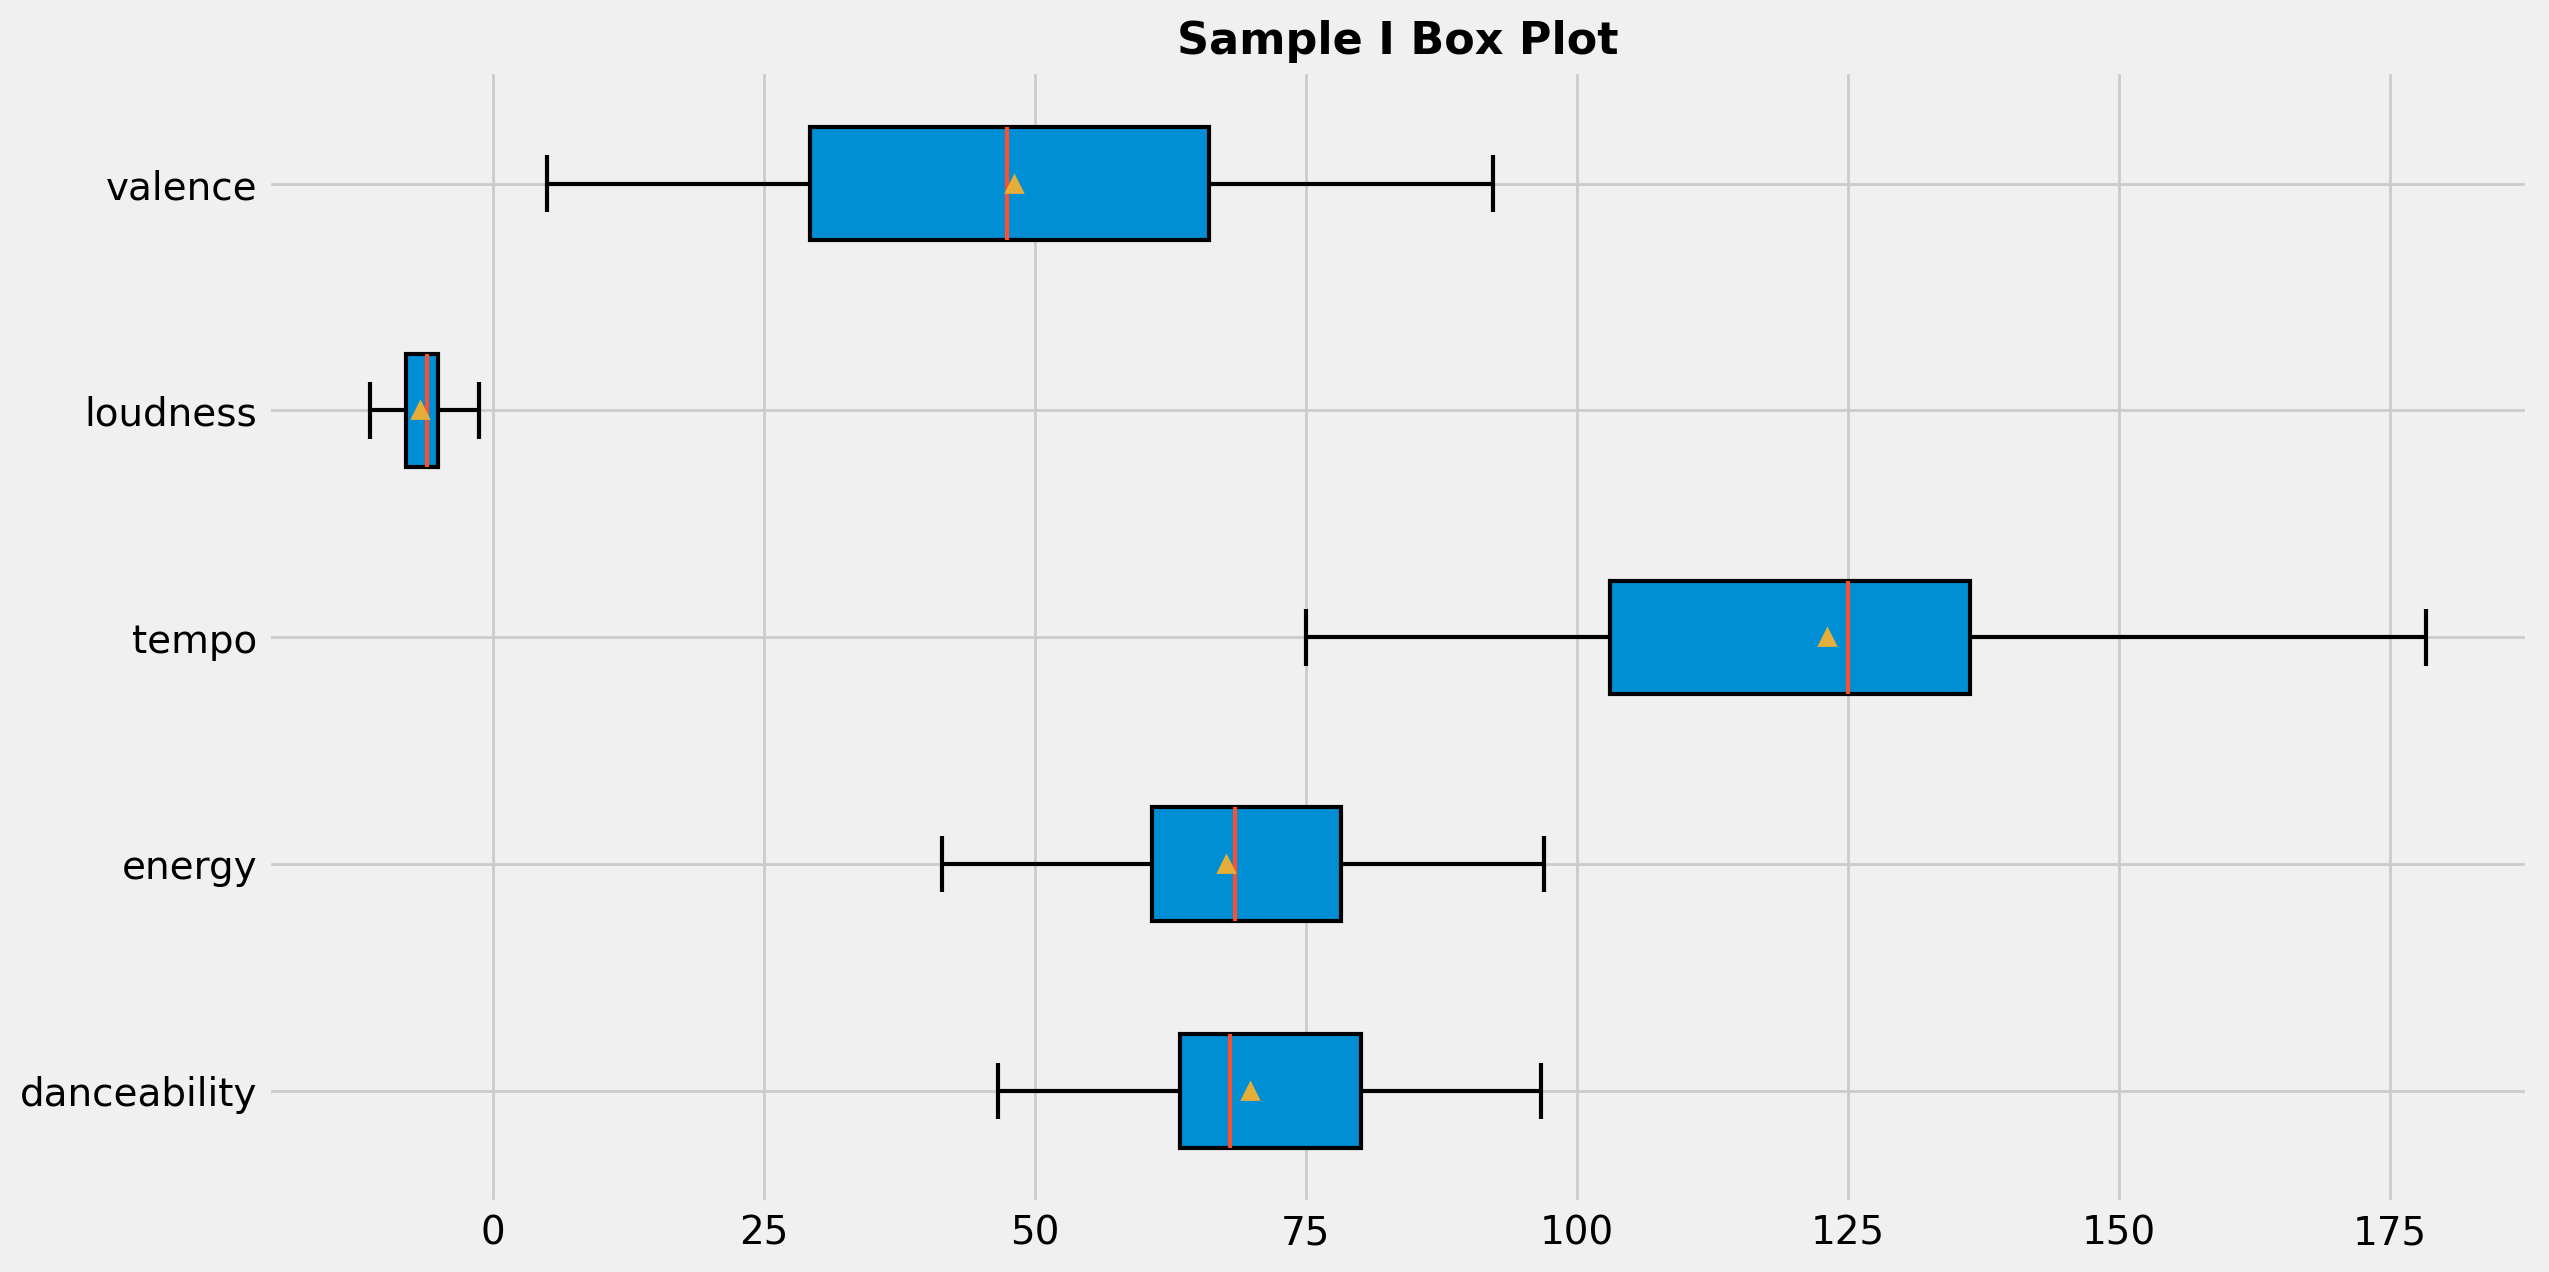

In [95]:
df_vibe_sample_I.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Sample I Box Plot", fontsize=16, fontweight='heavy')
plt.show()

We concatenate the df_party with the sample above and get the 1st expanded edition of the original playlist:

In [96]:
df_party_exp_I = pd.concat([df_party, df_vibe_sample_I])
display(df_party.describe())
df_party_exp_I.describe()

,danceability,energy,tempo,loudness,valence
count,97.000000,97.000000,97.000000,97.000000,97.000000
mean,68.939175,78.656701,124.627969,-4.710433,56.245979
std,12.717660,13.045369,23.219881,1.483638,23.101854
min,25.900000,42.500000,85.979000,-10.965000,3.480000
25%,61.800000,71.600000,103.019000,-5.461000,41.200000
50%,67.200000,80.000000,126.957000,-4.374000,59.200000
75%,78.500000,88.400000,130.005000,-3.840000,74.700000
max,95.100000,99.000000,191.950000,-2.117000,96.900000


,danceability,energy,tempo,loudness,valence
count,137.000000,137.000000,137.000000,137.000000,137.000000
mean,69.213139,75.446715,124.159956,-5.290613,53.860657
std,12.682206,14.787207,23.440821,2.258121,23.883037
min,25.900000,26.200000,74.989000,-15.555000,3.480000
25%,62.300000,66.000000,103.019000,-6.153000,35.200000
50%,67.900000,78.000000,126.002000,-4.931000,56.500000
75%,78.900000,86.900000,130.060000,-3.877000,74.300000
max,96.700000,99.000000,191.950000,-1.264000,96.900000


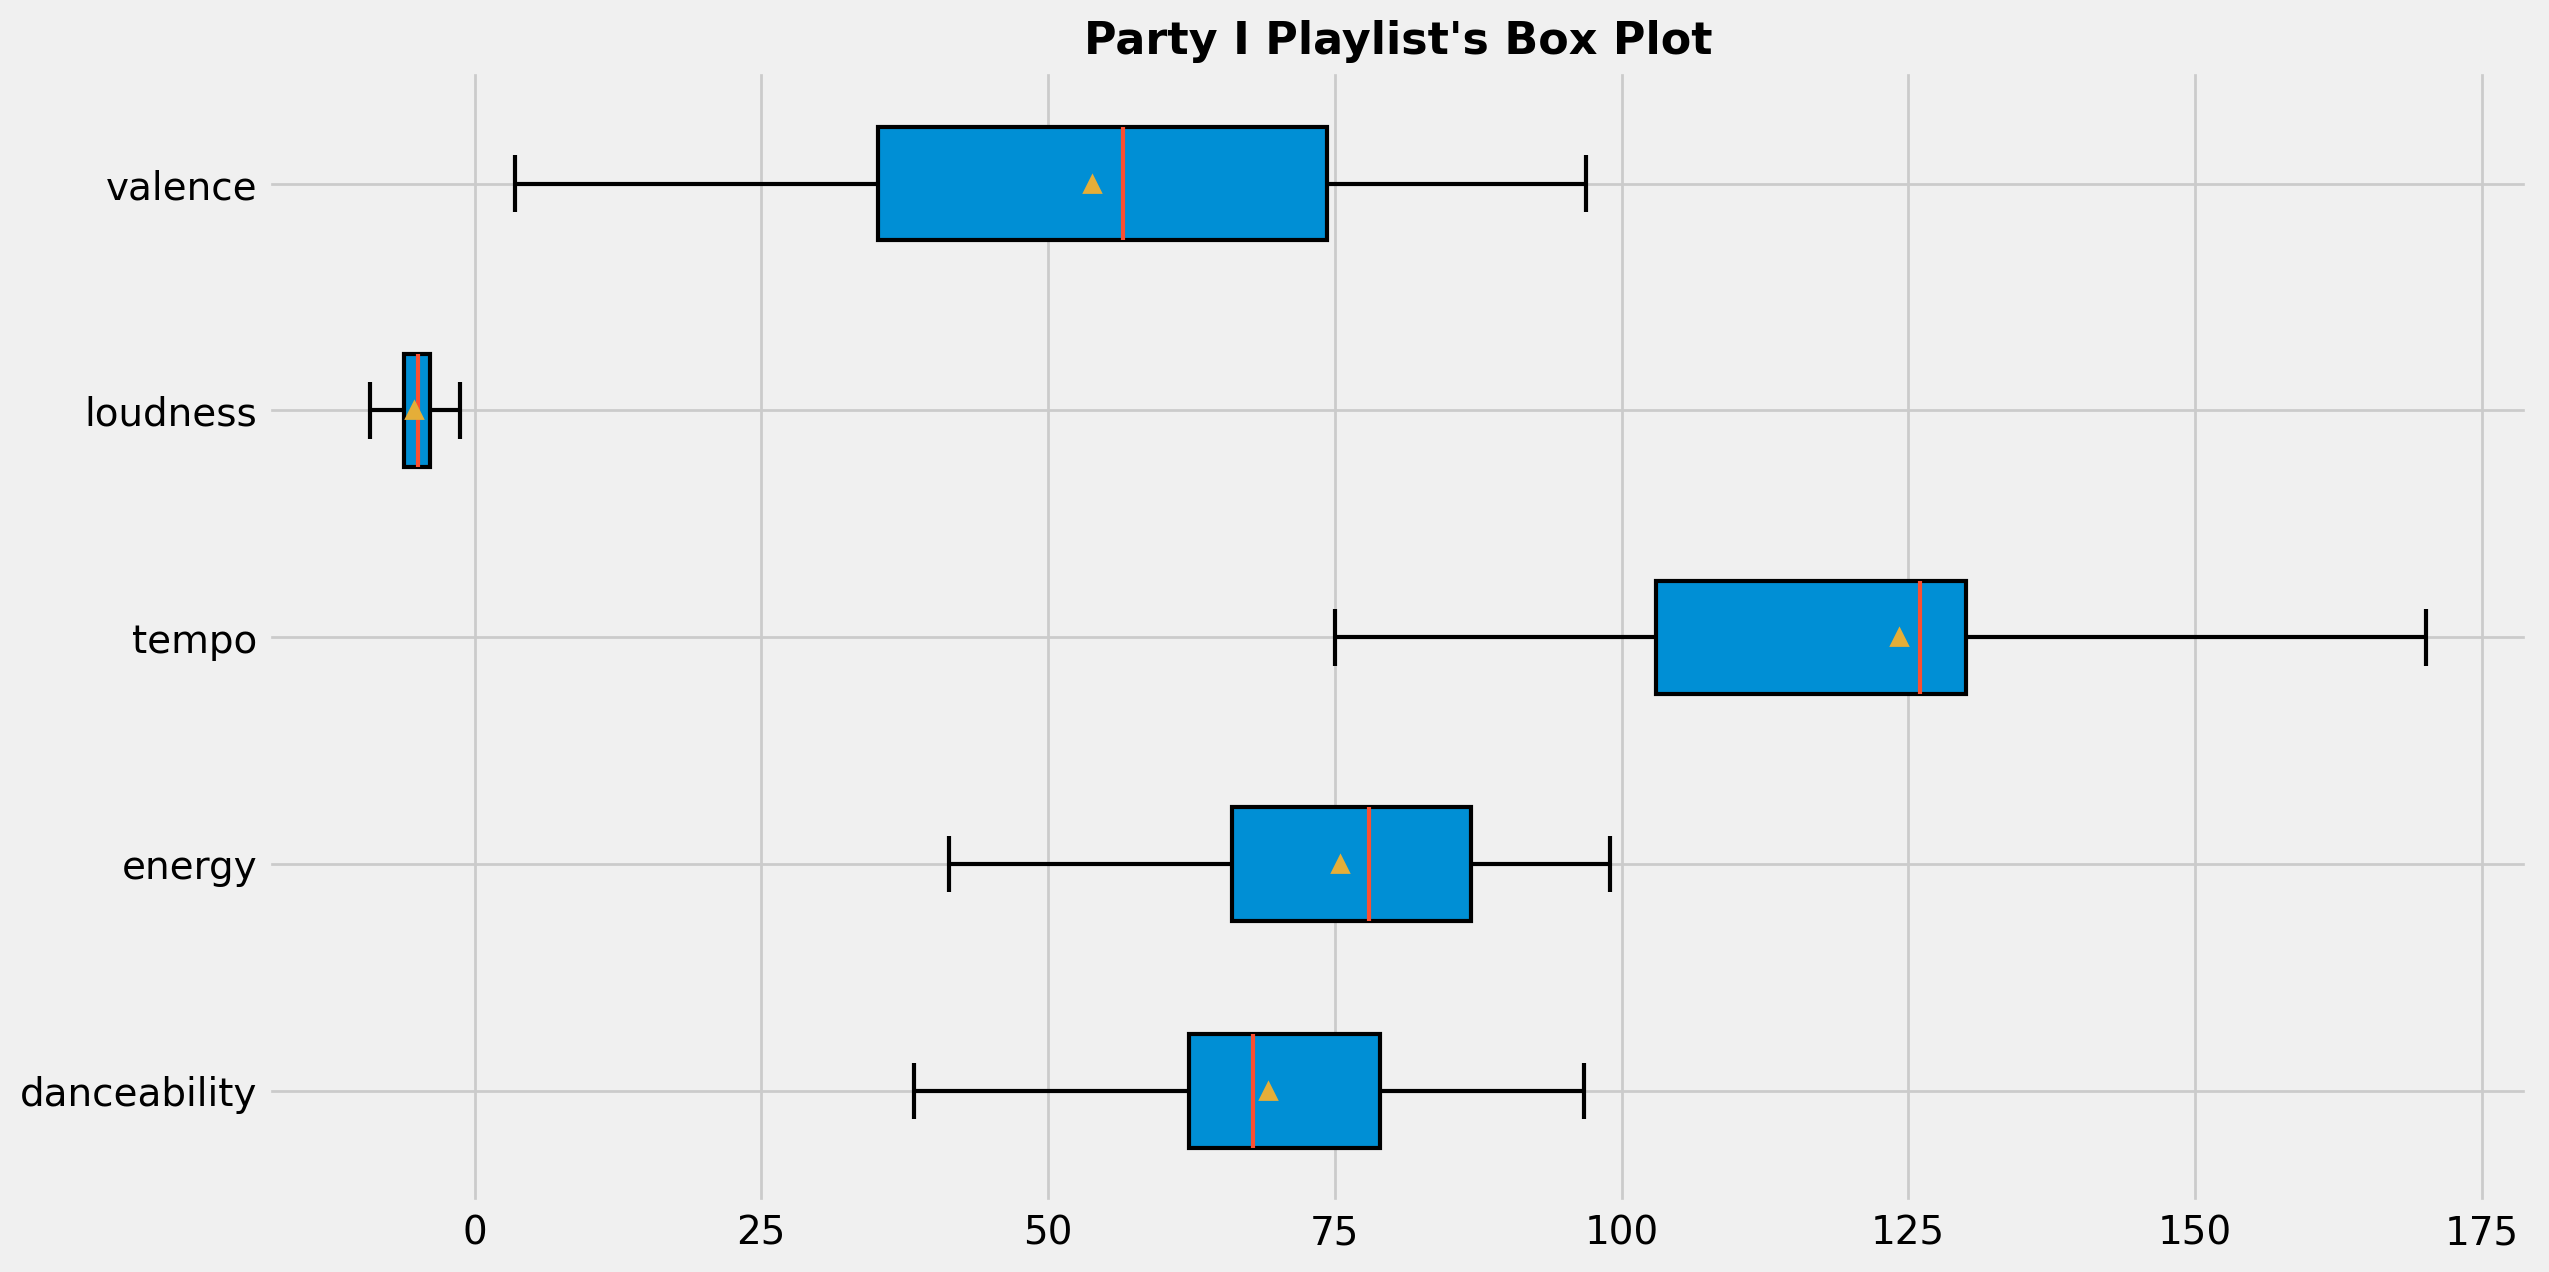

In [97]:
df_party_exp_I.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Party I Playlist's Box Plot", fontsize=16, fontweight='heavy')
plt.show()

🔹Our prime audio feature `danceability` was increased; the mean got up by almost 0.5. Furthermore, the distribution of tracks along this feature was also optimised slightly. That is, the 2nd (Median) and 3rd (Upper) quartiles have been shifted to the right, from 68.90 to 69.20 and 78.50 to 78.90, respectively.

🔹The `valence` feature, however, got decreased by 0.61, while at the same time, none of the quartiles moved to the "right". With that in mind, we should seek for further optimization opportunities.
### Approach II
This time we are going to implement NumPy Boolean Indexing and filter the Vibe data set to only bring the rows that meet the criteria we specify. Particularly, we specify the `danceability` and `valence` features to be above the respective Means of the Party playlist, 69.55 and 51.89.

In [98]:
df_vibe_sample_II = df_vibe[(df_vibe['danceability'] > 69.55) & (df_vibe['valence'] > 51.89)].copy()

In [99]:
df_vibe_sample_II.describe()

,danceability,energy,tempo,loudness,valence
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,78.004651,68.030233,119.792209,-5.983698,72.074419
std,6.802904,15.838704,22.414989,2.444964,12.753675
min,69.900000,17.800000,80.870000,-15.044000,53.100000
25%,72.950000,59.200000,102.360000,-6.999000,61.300000
50%,76.100000,71.100000,119.971000,-5.588000,71.400000
75%,81.250000,78.750000,131.503000,-4.747000,82.250000
max,97.900000,97.000000,174.915000,-2.565000,95.900000


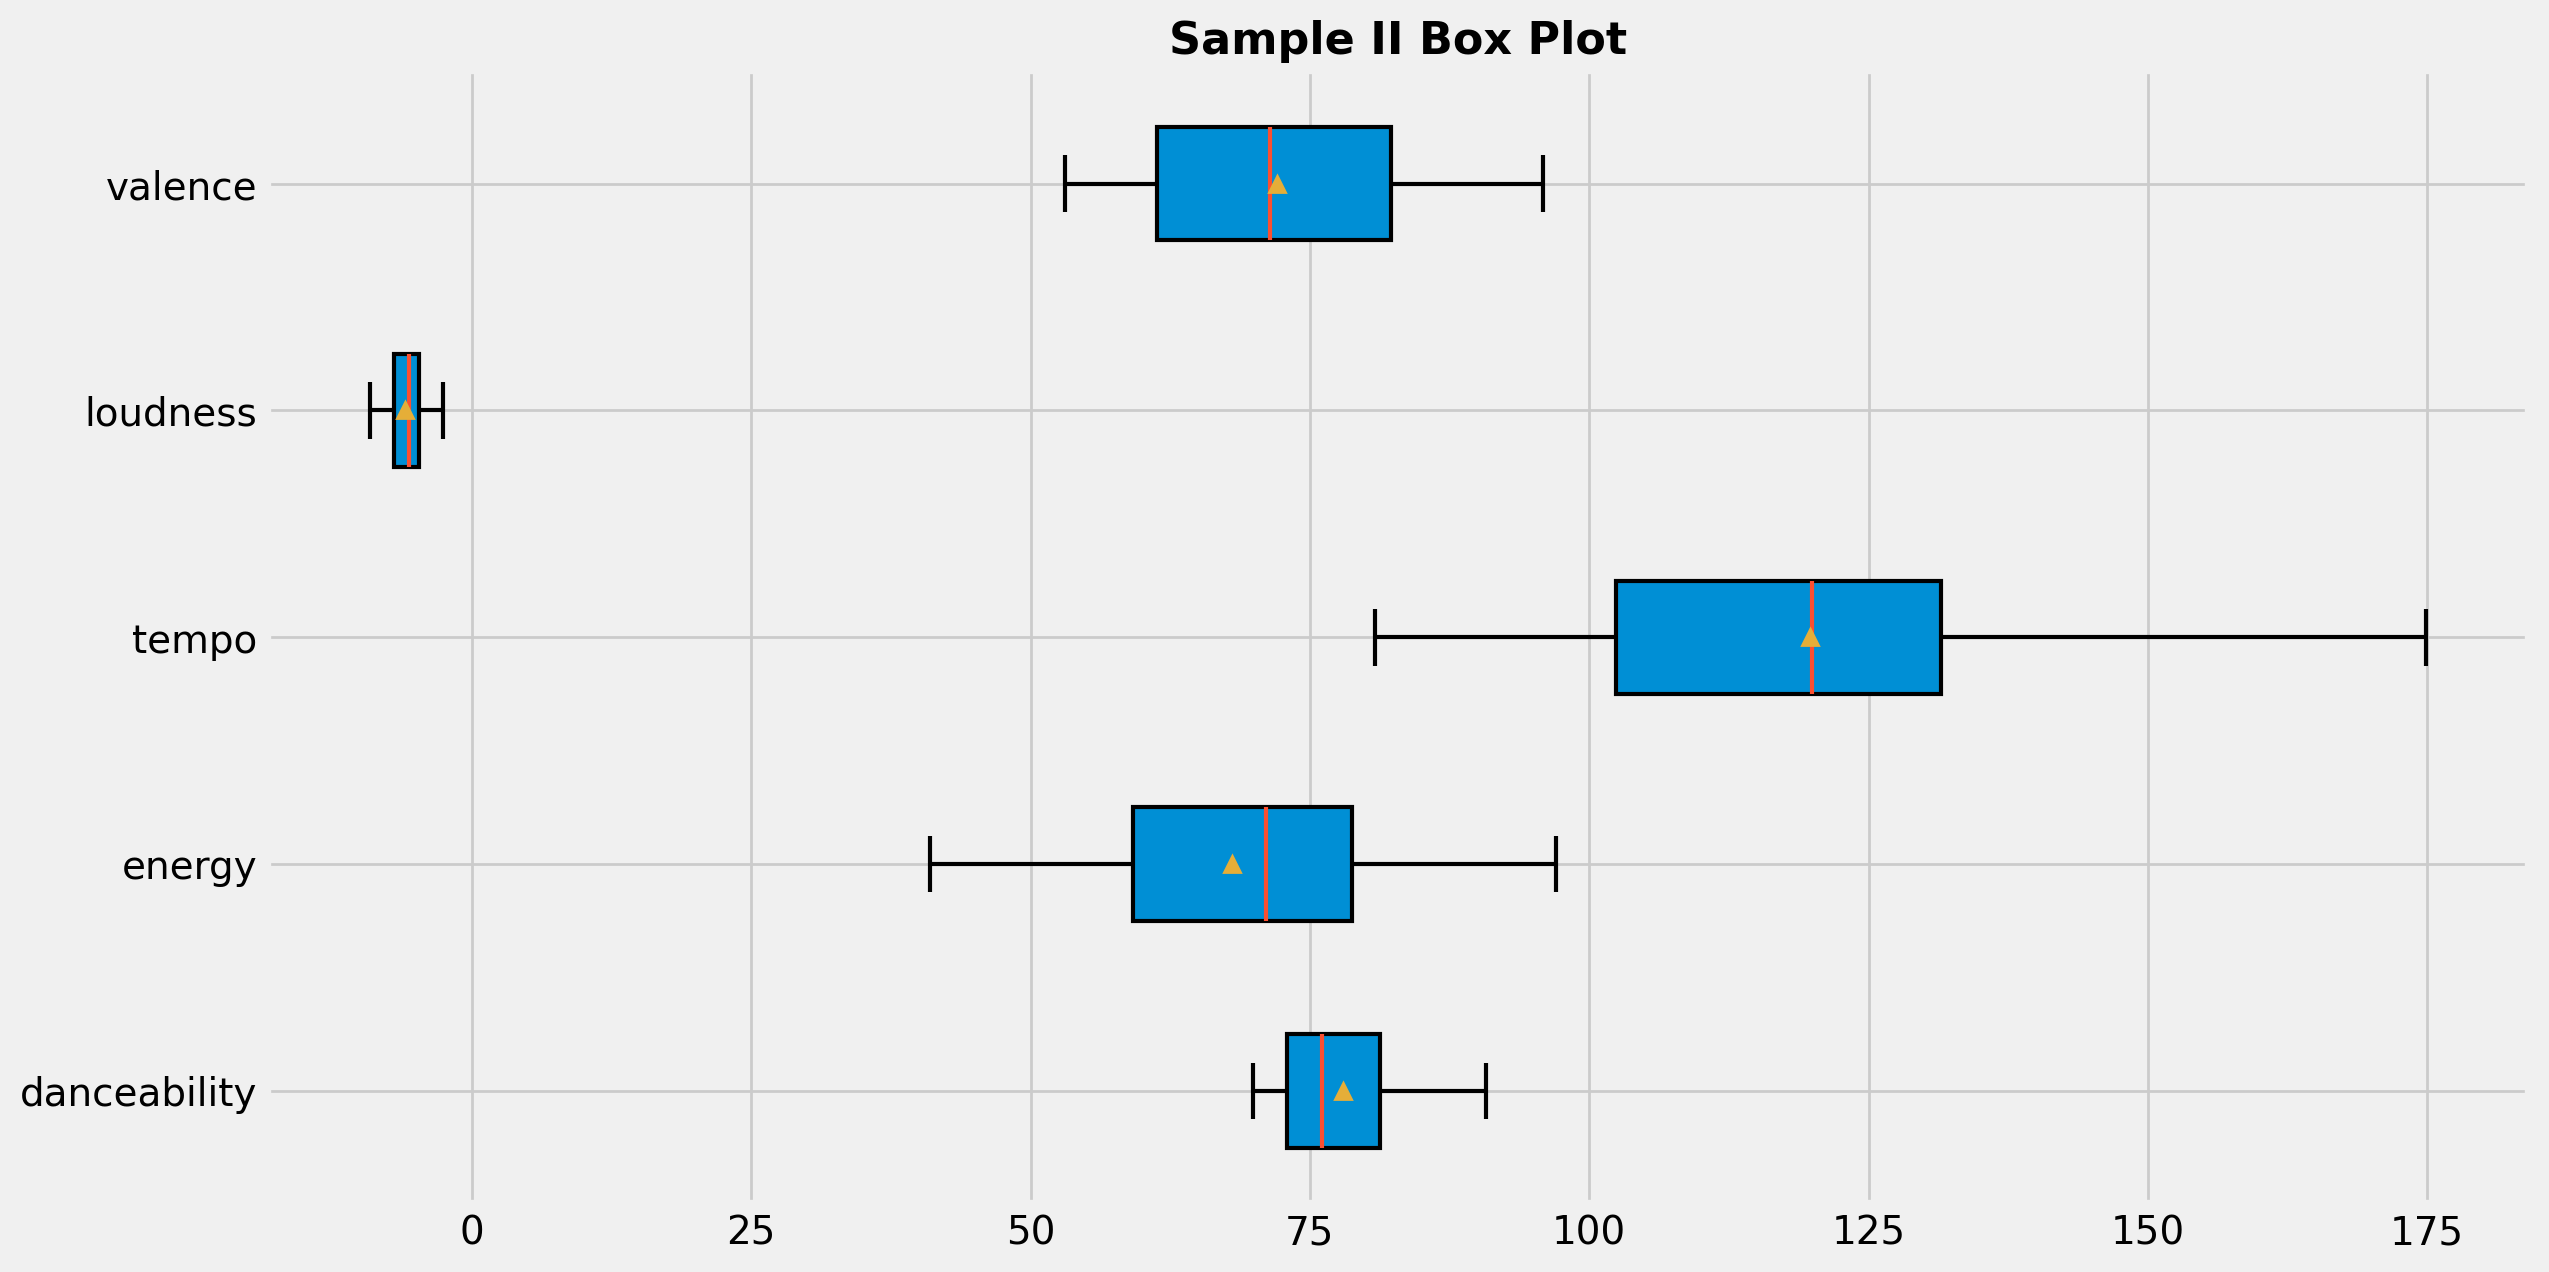

In [100]:
df_vibe_sample_II.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Sample II Box Plot", fontsize=16, fontweight='heavy')
plt.show()

In [101]:
df_party_exp_II = pd.concat([df_party, df_vibe_sample_II])
display(df_party.describe())
df_party_exp_II.describe()

,danceability,energy,tempo,loudness,valence
count,97.000000,97.000000,97.000000,97.000000,97.000000
mean,68.939175,78.656701,124.627969,-4.710433,56.245979
std,12.717660,13.045369,23.219881,1.483638,23.101854
min,25.900000,42.500000,85.979000,-10.965000,3.480000
25%,61.800000,71.600000,103.019000,-5.461000,41.200000
50%,67.200000,80.000000,126.957000,-4.374000,59.200000
75%,78.500000,88.400000,130.005000,-3.840000,74.700000
max,95.100000,99.000000,191.950000,-2.117000,96.900000


,danceability,energy,tempo,loudness,valence
count,140.000000,140.000000,140.000000,140.000000,140.000000
mean,71.723571,75.392857,123.142700,-5.101507,61.107571
std,11.970928,14.749226,23.004295,1.916763,21.712748
min,25.900000,17.800000,80.870000,-15.044000,3.480000
25%,63.975000,67.350000,102.506000,-5.991000,51.450000
50%,72.800000,78.200000,124.954000,-4.827000,64.650000
75%,80.125000,86.700000,130.006500,-3.864250,75.625000
max,97.900000,99.000000,191.950000,-2.117000,96.900000


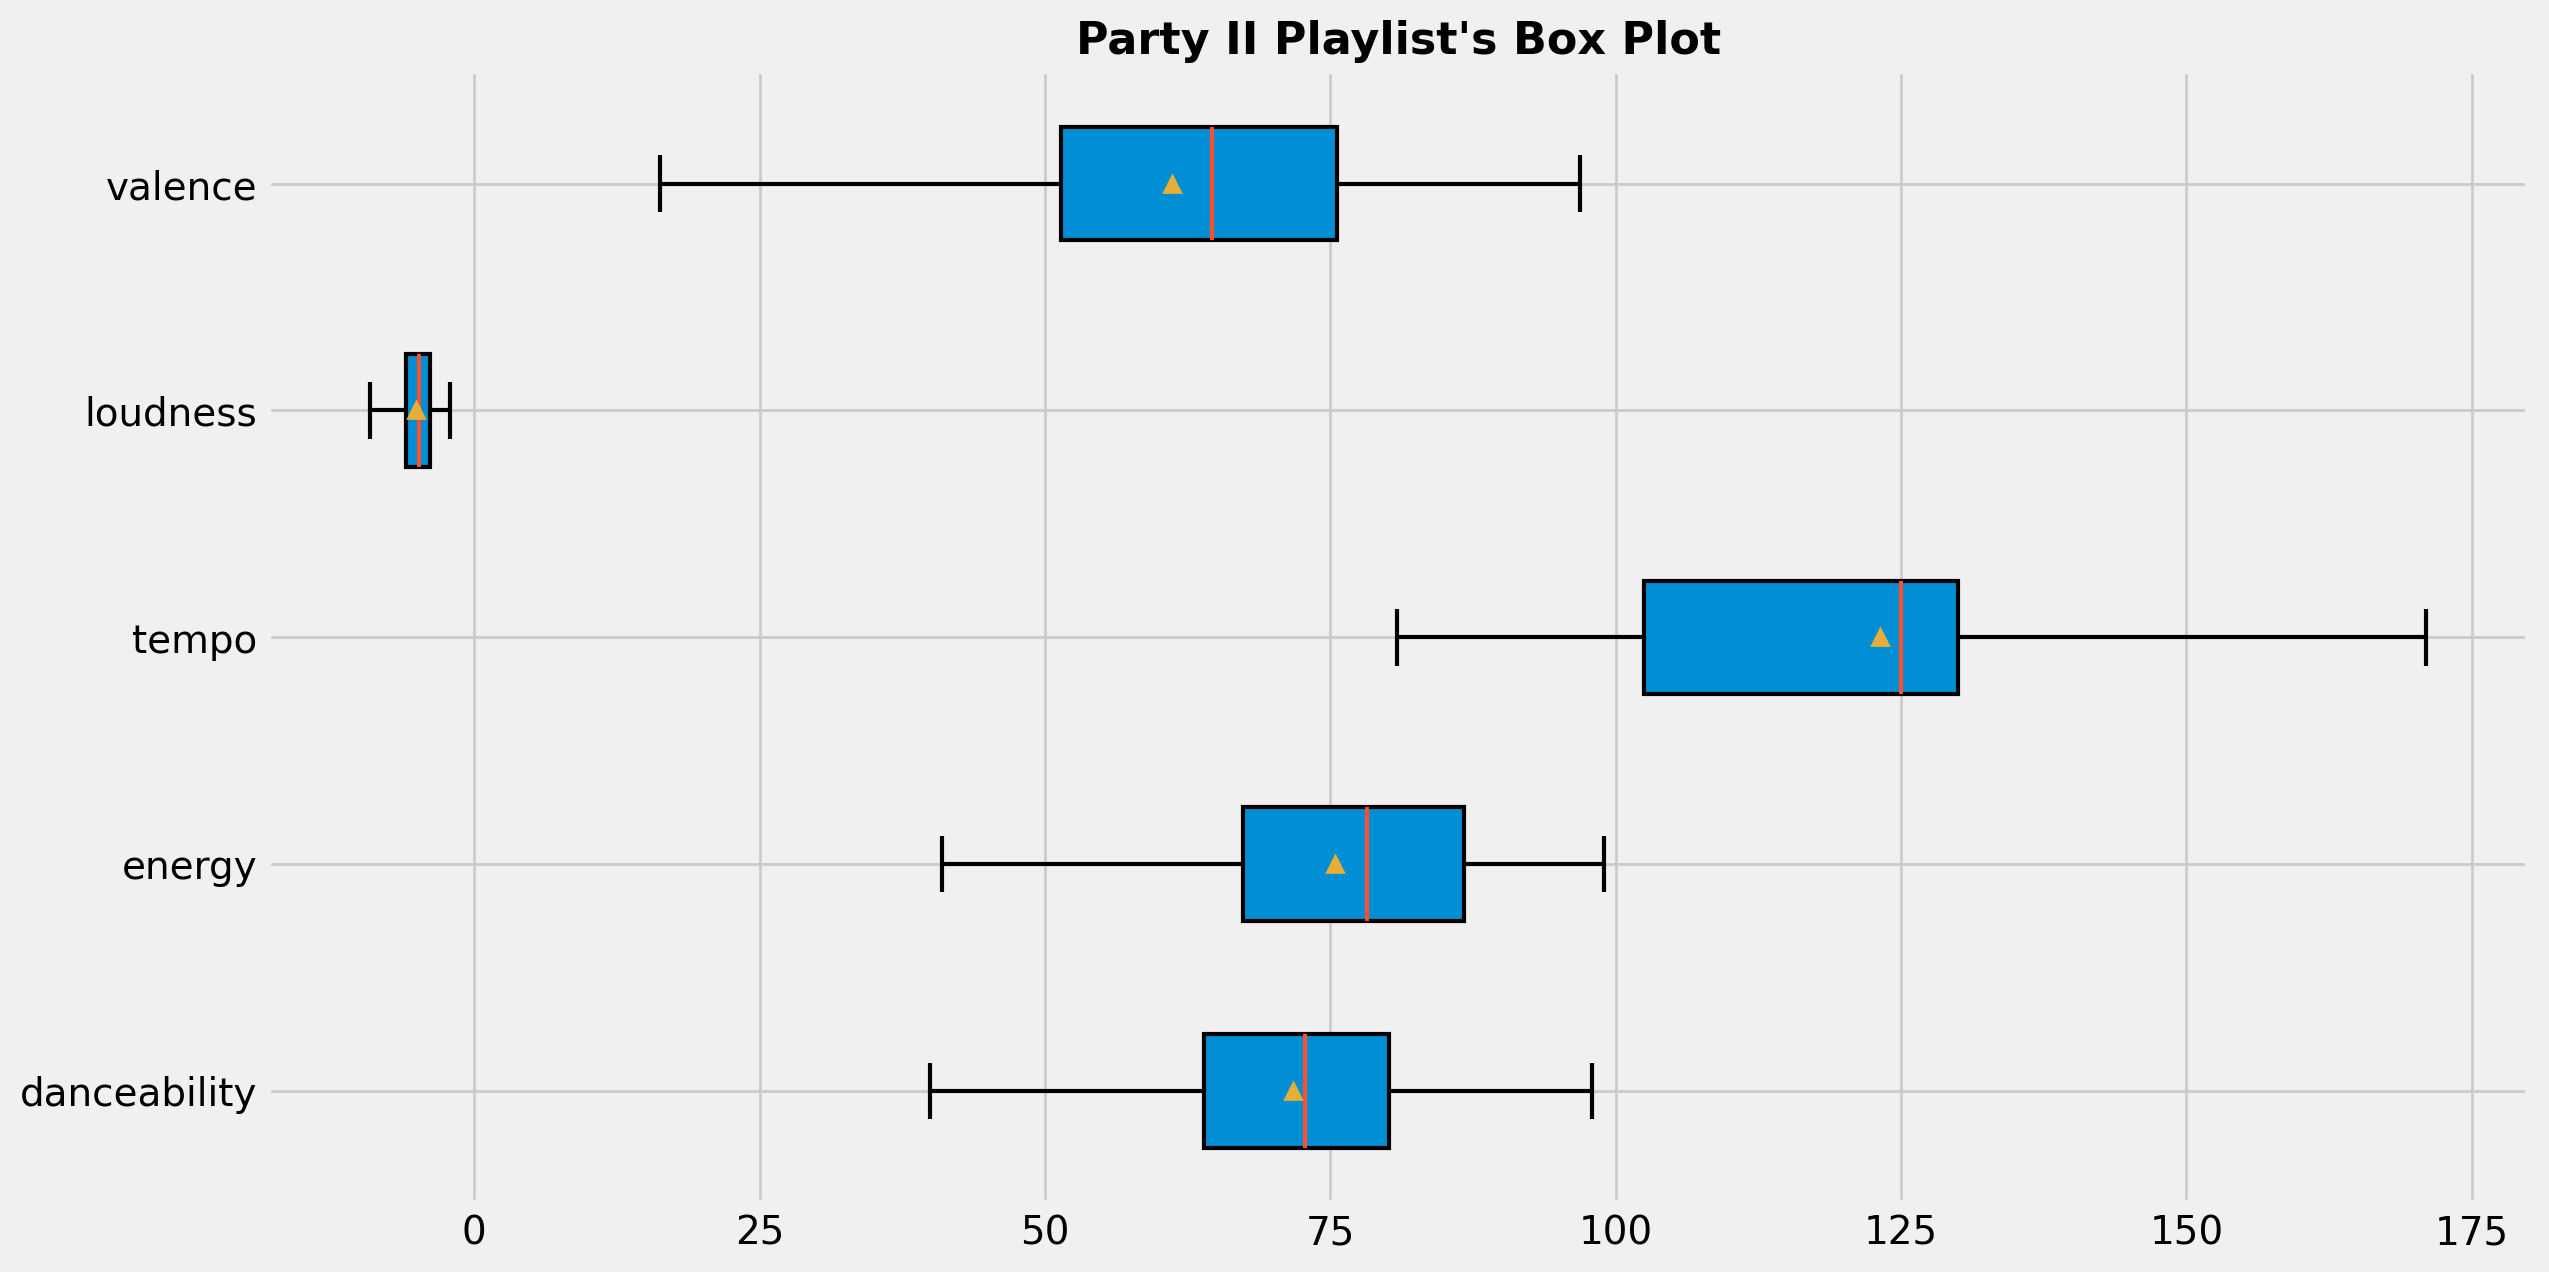

In [102]:
df_party_exp_II.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Party II Playlist's Box Plot", fontsize=16, fontweight='heavy')
plt.show()

🔹Our prime audio feature `danceability` increased more this time; the Mean got up by almost 2.17! Furthermore, the distribution of tracks along this feature was also optimised as the 2nd (Median) and 3rd (Upper) quartiles shifted to the right. That means that at least 50% of the playlist is above the "new" higher Mean (71.71) of the primary acoustic feature.

🔹The `valence` feature decreased by 4.21, as well, with both the 2nd and 3rd quartiles remaining above the Mean.

### Approach III
As already been mentioned, the optimization of one feature doesn't necessarily mean optimization for the rest of them. We may enhance `danceability` but risk to deteriorate `tempo`. In an effort to ameliorate this phenomenon, we are going to introduce an equation, the variables of which are the acoustic features:

Score = (danceability * 30) + (energy * 20) + (tempo * 20) + (loudness * 10) + (valence * 20)

Apparently, each variable's paramater is essentially its respective weight, that we have to pre-define. Since we give much credit to the `danceability` and `valence` features, the respective weights are higher.

In [103]:
df_party['score'] = df_party['danceability'] * 30 + df_party['energy'] * 20 + df_party['tempo'] * 20 + df_party['loudness'] * 10 + df_party['valence'] * 20
df_party.describe()

,danceability,energy,tempo,loudness,valence,score
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,68.939175,78.656701,124.627969,-4.710433,56.245979,7211.683918
std,12.717660,13.045369,23.219881,1.483638,23.101854,816.477808
min,25.900000,42.500000,85.979000,-10.965000,3.480000,5376.150000
25%,61.800000,71.600000,103.019000,-5.461000,41.200000,6591.940000
50%,67.200000,80.000000,126.957000,-4.374000,59.200000,7237.090000
75%,78.500000,88.400000,130.005000,-3.840000,74.700000,7821.160000
max,95.100000,99.000000,191.950000,-2.117000,96.900000,9046.130000


In [104]:
df_party_exp_I['score'] = df_party_exp_I['danceability'] * 30 + df_party_exp_I['energy'] * 20 + df_party_exp_I['tempo'] * 20 + df_party_exp_I['loudness'] * 10 + df_party_exp_I['valence'] * 20
df_party_exp_I.describe()

,danceability,energy,tempo,loudness,valence,score
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,69.213139,75.446715,124.159956,-5.290613,53.860657,7092.834599
std,12.682206,14.787207,23.440821,2.258121,23.883037,908.547463
min,25.900000,26.200000,74.989000,-15.555000,3.480000,3694.490000
25%,62.300000,66.000000,103.019000,-6.153000,35.200000,6510.340000
50%,67.900000,78.000000,126.002000,-4.931000,56.500000,7149.850000
75%,78.900000,86.900000,130.060000,-3.877000,74.300000,7728.480000
max,96.700000,99.000000,191.950000,-1.264000,96.900000,9089.630000


More than obviously, though **Approach I** lead us to a better `danceability` than the original playlist, it deteriorated the overall expericence of the party. The mean `score` decreased to 7215 from 7355!

In [105]:
df_party_exp_II['score'] = df_party_exp_II['danceability'] * 30 + df_party_exp_II['energy'] * 20 + df_party_exp_II['tempo'] * 20 + df_party_exp_II['loudness'] * 10 + df_party_exp_II['valence'] * 20
df_party_exp_II.describe()

,danceability,energy,tempo,loudness,valence,score
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,71.723571,75.392857,123.142700,-5.101507,61.107571,7293.554643
std,11.970928,14.749226,23.004295,1.916763,21.712748,809.317404
min,25.900000,17.800000,80.870000,-15.044000,3.480000,5376.150000
25%,63.975000,67.350000,102.506000,-5.991000,51.450000,6761.630000
50%,72.800000,78.200000,124.954000,-4.827000,64.650000,7288.420000
75%,80.125000,86.700000,130.006500,-3.864250,75.625000,7849.232500
max,97.900000,99.000000,191.950000,-2.117000,96.900000,9161.060000


As far as the **Approach II** is concerned, the mean `score` got up by almost 62 points! This approach ensures:
* higher `danceability` and `valence`
* better distribution of the tracks along both features

Now, we are going to calculate the `score` column for the Vibe playlist and this time use it to filter that data set, so as to fetch the rows that meet the new criteria. Specifically, we seek for opportunities to increase the current Party playlist's Mean `score`, thus seek for tracks that note a higher `score` than that:

In [106]:
df_vibe['score'] = df_vibe['danceability'] * 30 + df_vibe['energy'] * 20 + df_vibe['tempo'] * 20 + df_vibe['loudness'] * 10 + df_vibe['valence'] * 20
df_vibe.describe()

,danceability,energy,tempo,loudness,valence,score
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,66.385000,67.492500,121.072000,-6.275963,48.214750,6664.375375
std,13.657045,16.727812,27.467474,2.598501,23.714408,1012.905278
min,31.600000,17.800000,64.002000,-17.140000,3.900000,3637.110000
25%,58.800000,58.225000,100.049500,-7.108000,30.675000,6146.025000
50%,67.500000,69.550000,119.987000,-5.715500,47.700000,6716.055000
75%,75.200000,79.525000,134.207500,-4.662500,66.050000,7298.932500
max,97.900000,99.600000,191.903000,-1.264000,96.200000,9161.060000


In [107]:
df_vibe_sample_III = df_vibe[df_vibe['score'] > df_party['score'].mean()].copy()

In [108]:
df_party_exp_III = pd.concat([df_party, df_vibe_sample_III])
display(df_party.describe())
df_party_exp_III.describe()

,danceability,energy,tempo,loudness,valence,score
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,68.939175,78.656701,124.627969,-4.710433,56.245979,7211.683918
std,12.717660,13.045369,23.219881,1.483638,23.101854,816.477808
min,25.900000,42.500000,85.979000,-10.965000,3.480000,5376.150000
25%,61.800000,71.600000,103.019000,-5.461000,41.200000,6591.940000
50%,67.200000,80.000000,126.957000,-4.374000,59.200000,7237.090000
75%,78.500000,88.400000,130.005000,-3.840000,74.700000,7821.160000
max,95.100000,99.000000,191.950000,-2.117000,96.900000,9046.130000


,danceability,energy,tempo,loudness,valence,score
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,70.521277,77.122695,129.236979,-4.900617,60.185532,7397.536241
std,12.391084,13.561323,24.844561,1.636085,22.621676,777.489036
min,25.900000,35.900000,85.979000,-11.056000,3.480000,5376.150000
25%,62.300000,69.500000,116.044000,-5.854000,46.300000,6987.460000
50%,70.200000,79.000000,127.949000,-4.787000,64.400000,7486.730000
75%,79.400000,87.800000,138.074000,-3.830000,76.200000,7882.420000
max,97.900000,99.000000,191.950000,-1.264000,96.900000,9161.060000


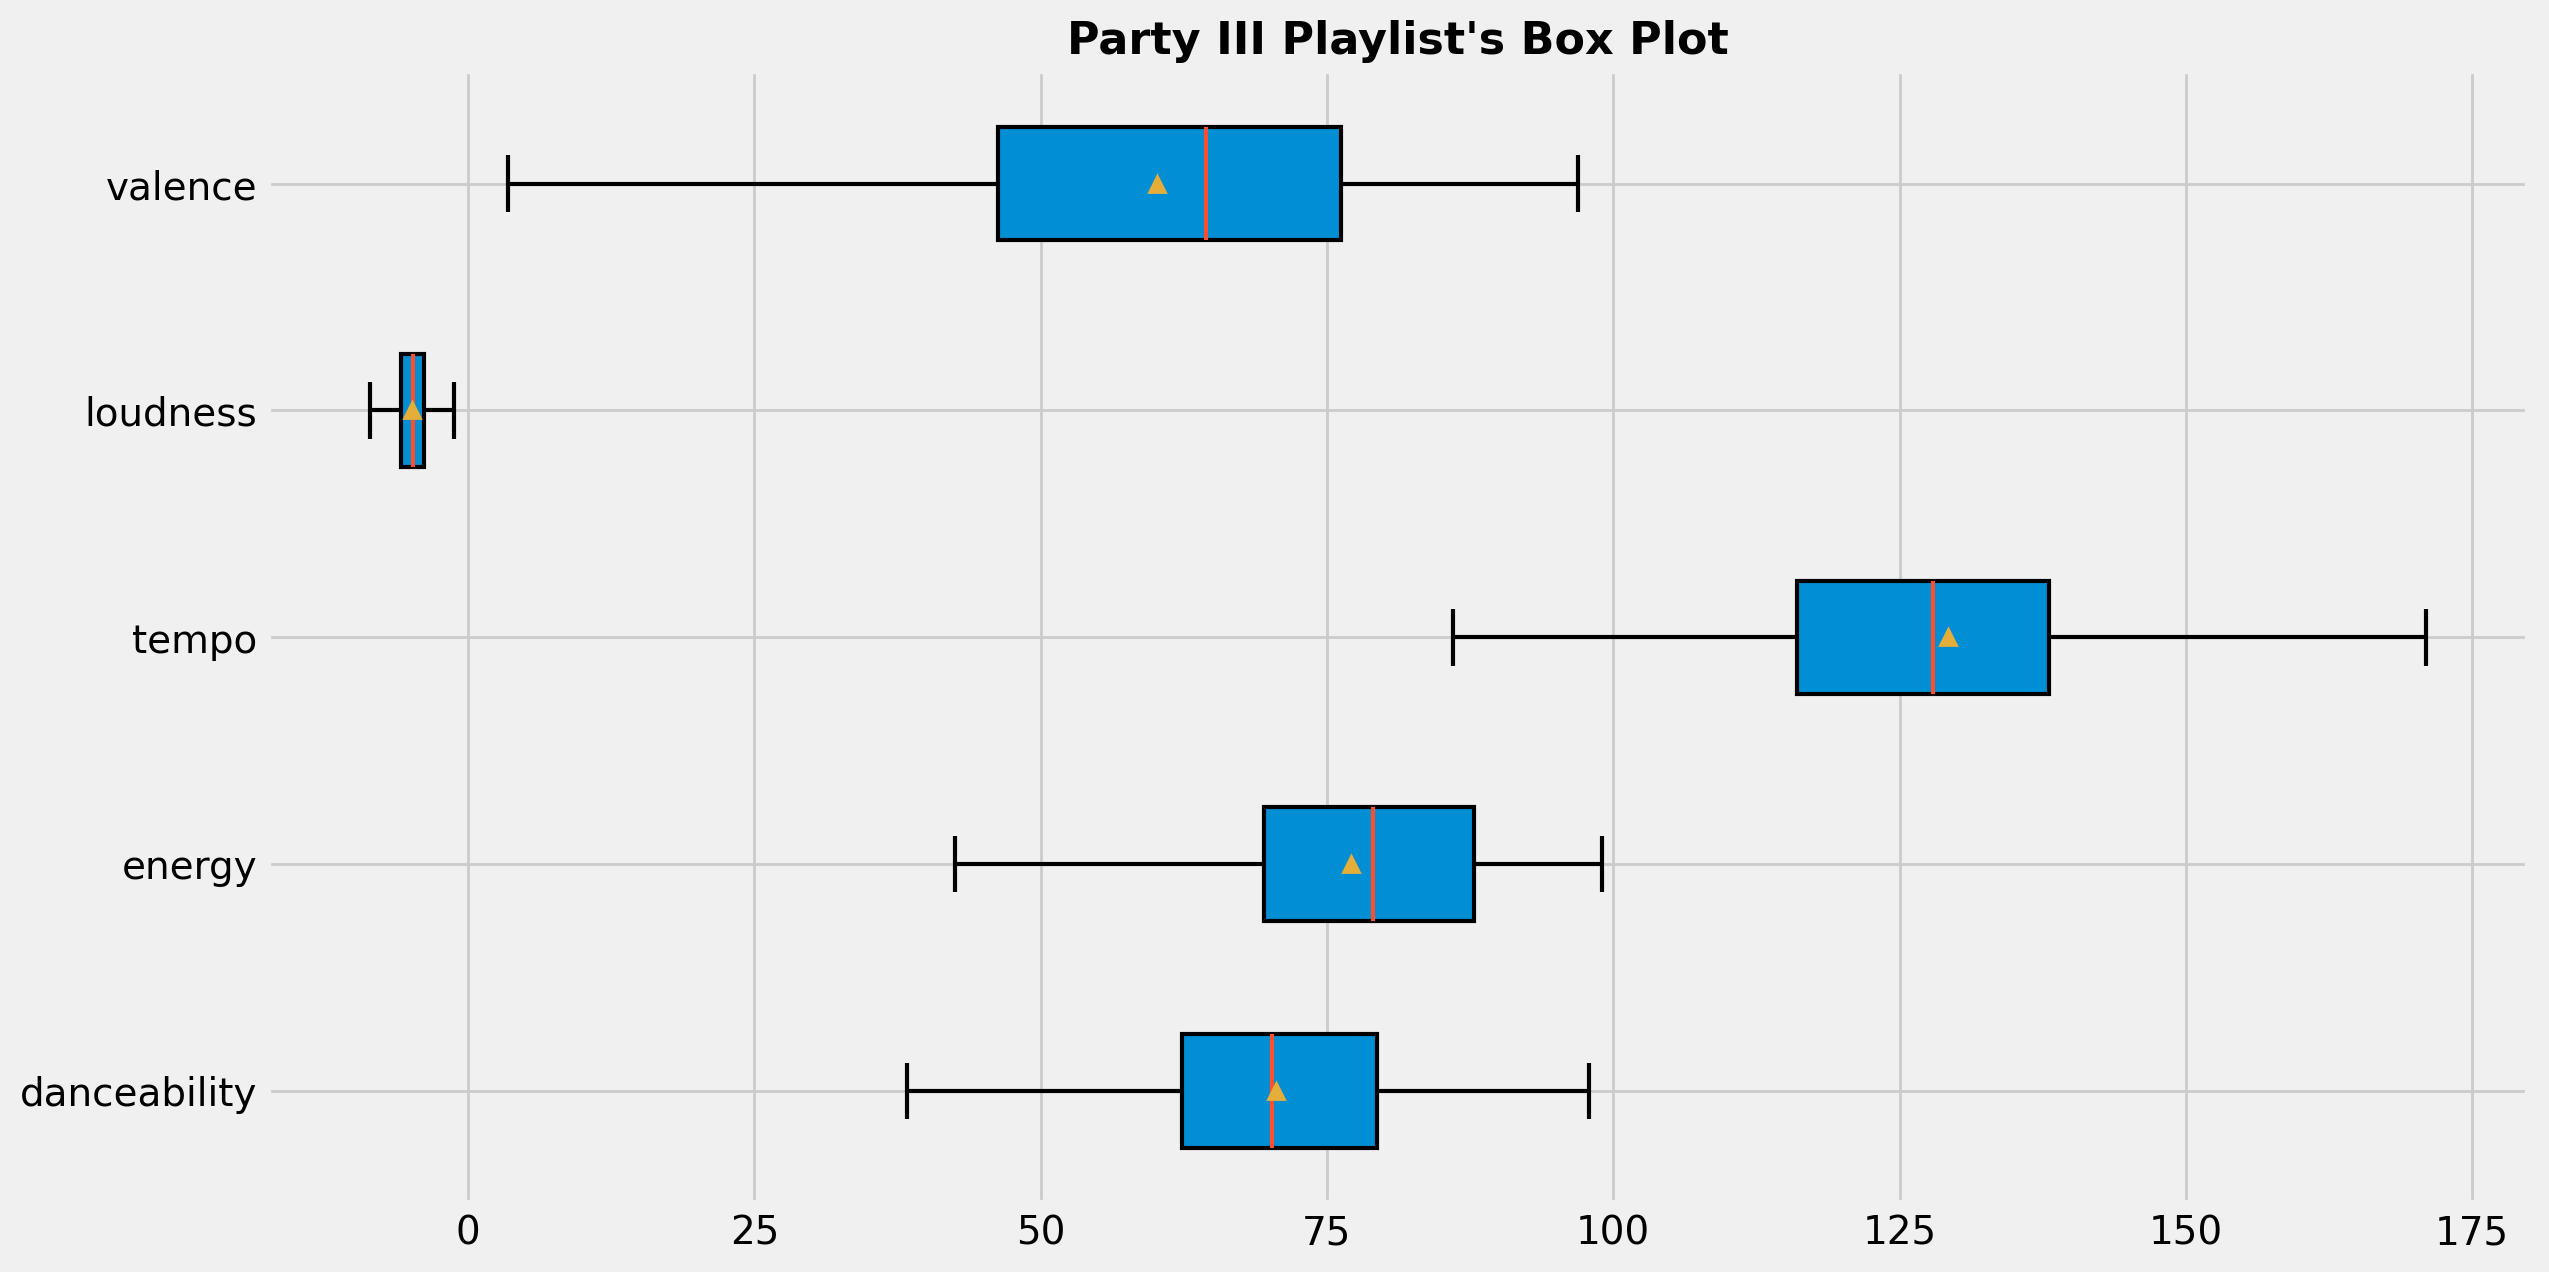

In [109]:
df_party_exp_III.iloc[:, :-1].boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Party III Playlist's Box Plot", fontsize=16, fontweight='heavy')
plt.show()

As far as the **Approach III** is concerned, the `danceability` feature got up by almost 1.17 and the `valence` by 4.06, while both distributions were improved. In terms of `score` accomplishment, this approach noted a 122,3 value which is the best until now! Summing up all the data sets descriptive statistics, we get:

In [110]:
display(df_party.describe())
display(df_party_exp_I.describe())
display(df_party_exp_II.describe())
df_party_exp_III.describe()

,danceability,energy,tempo,loudness,valence,score
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,68.939175,78.656701,124.627969,-4.710433,56.245979,7211.683918
std,12.717660,13.045369,23.219881,1.483638,23.101854,816.477808
min,25.900000,42.500000,85.979000,-10.965000,3.480000,5376.150000
25%,61.800000,71.600000,103.019000,-5.461000,41.200000,6591.940000
50%,67.200000,80.000000,126.957000,-4.374000,59.200000,7237.090000
75%,78.500000,88.400000,130.005000,-3.840000,74.700000,7821.160000
max,95.100000,99.000000,191.950000,-2.117000,96.900000,9046.130000


,danceability,energy,tempo,loudness,valence,score
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,69.213139,75.446715,124.159956,-5.290613,53.860657,7092.834599
std,12.682206,14.787207,23.440821,2.258121,23.883037,908.547463
min,25.900000,26.200000,74.989000,-15.555000,3.480000,3694.490000
25%,62.300000,66.000000,103.019000,-6.153000,35.200000,6510.340000
50%,67.900000,78.000000,126.002000,-4.931000,56.500000,7149.850000
75%,78.900000,86.900000,130.060000,-3.877000,74.300000,7728.480000
max,96.700000,99.000000,191.950000,-1.264000,96.900000,9089.630000


,danceability,energy,tempo,loudness,valence,score
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,71.723571,75.392857,123.142700,-5.101507,61.107571,7293.554643
std,11.970928,14.749226,23.004295,1.916763,21.712748,809.317404
min,25.900000,17.800000,80.870000,-15.044000,3.480000,5376.150000
25%,63.975000,67.350000,102.506000,-5.991000,51.450000,6761.630000
50%,72.800000,78.200000,124.954000,-4.827000,64.650000,7288.420000
75%,80.125000,86.700000,130.006500,-3.864250,75.625000,7849.232500
max,97.900000,99.000000,191.950000,-2.117000,96.900000,9161.060000


,danceability,energy,tempo,loudness,valence,score
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,70.521277,77.122695,129.236979,-4.900617,60.185532,7397.536241
std,12.391084,13.561323,24.844561,1.636085,22.621676,777.489036
min,25.900000,35.900000,85.979000,-11.056000,3.480000,5376.150000
25%,62.300000,69.500000,116.044000,-5.854000,46.300000,6987.460000
50%,70.200000,79.000000,127.949000,-4.787000,64.400000,7486.730000
75%,79.400000,87.800000,138.074000,-3.830000,76.200000,7882.420000
max,97.900000,99.000000,191.950000,-1.264000,96.900000,9161.060000


In [111]:
display(df_party.shape[0])
display(df_party_exp_I.shape[0])
display(df_party_exp_II.shape[0])
df_party_exp_III.shape[0]

97

137

140

141

Text(0.5, 1.0, "Plots of Playlists' Versions")

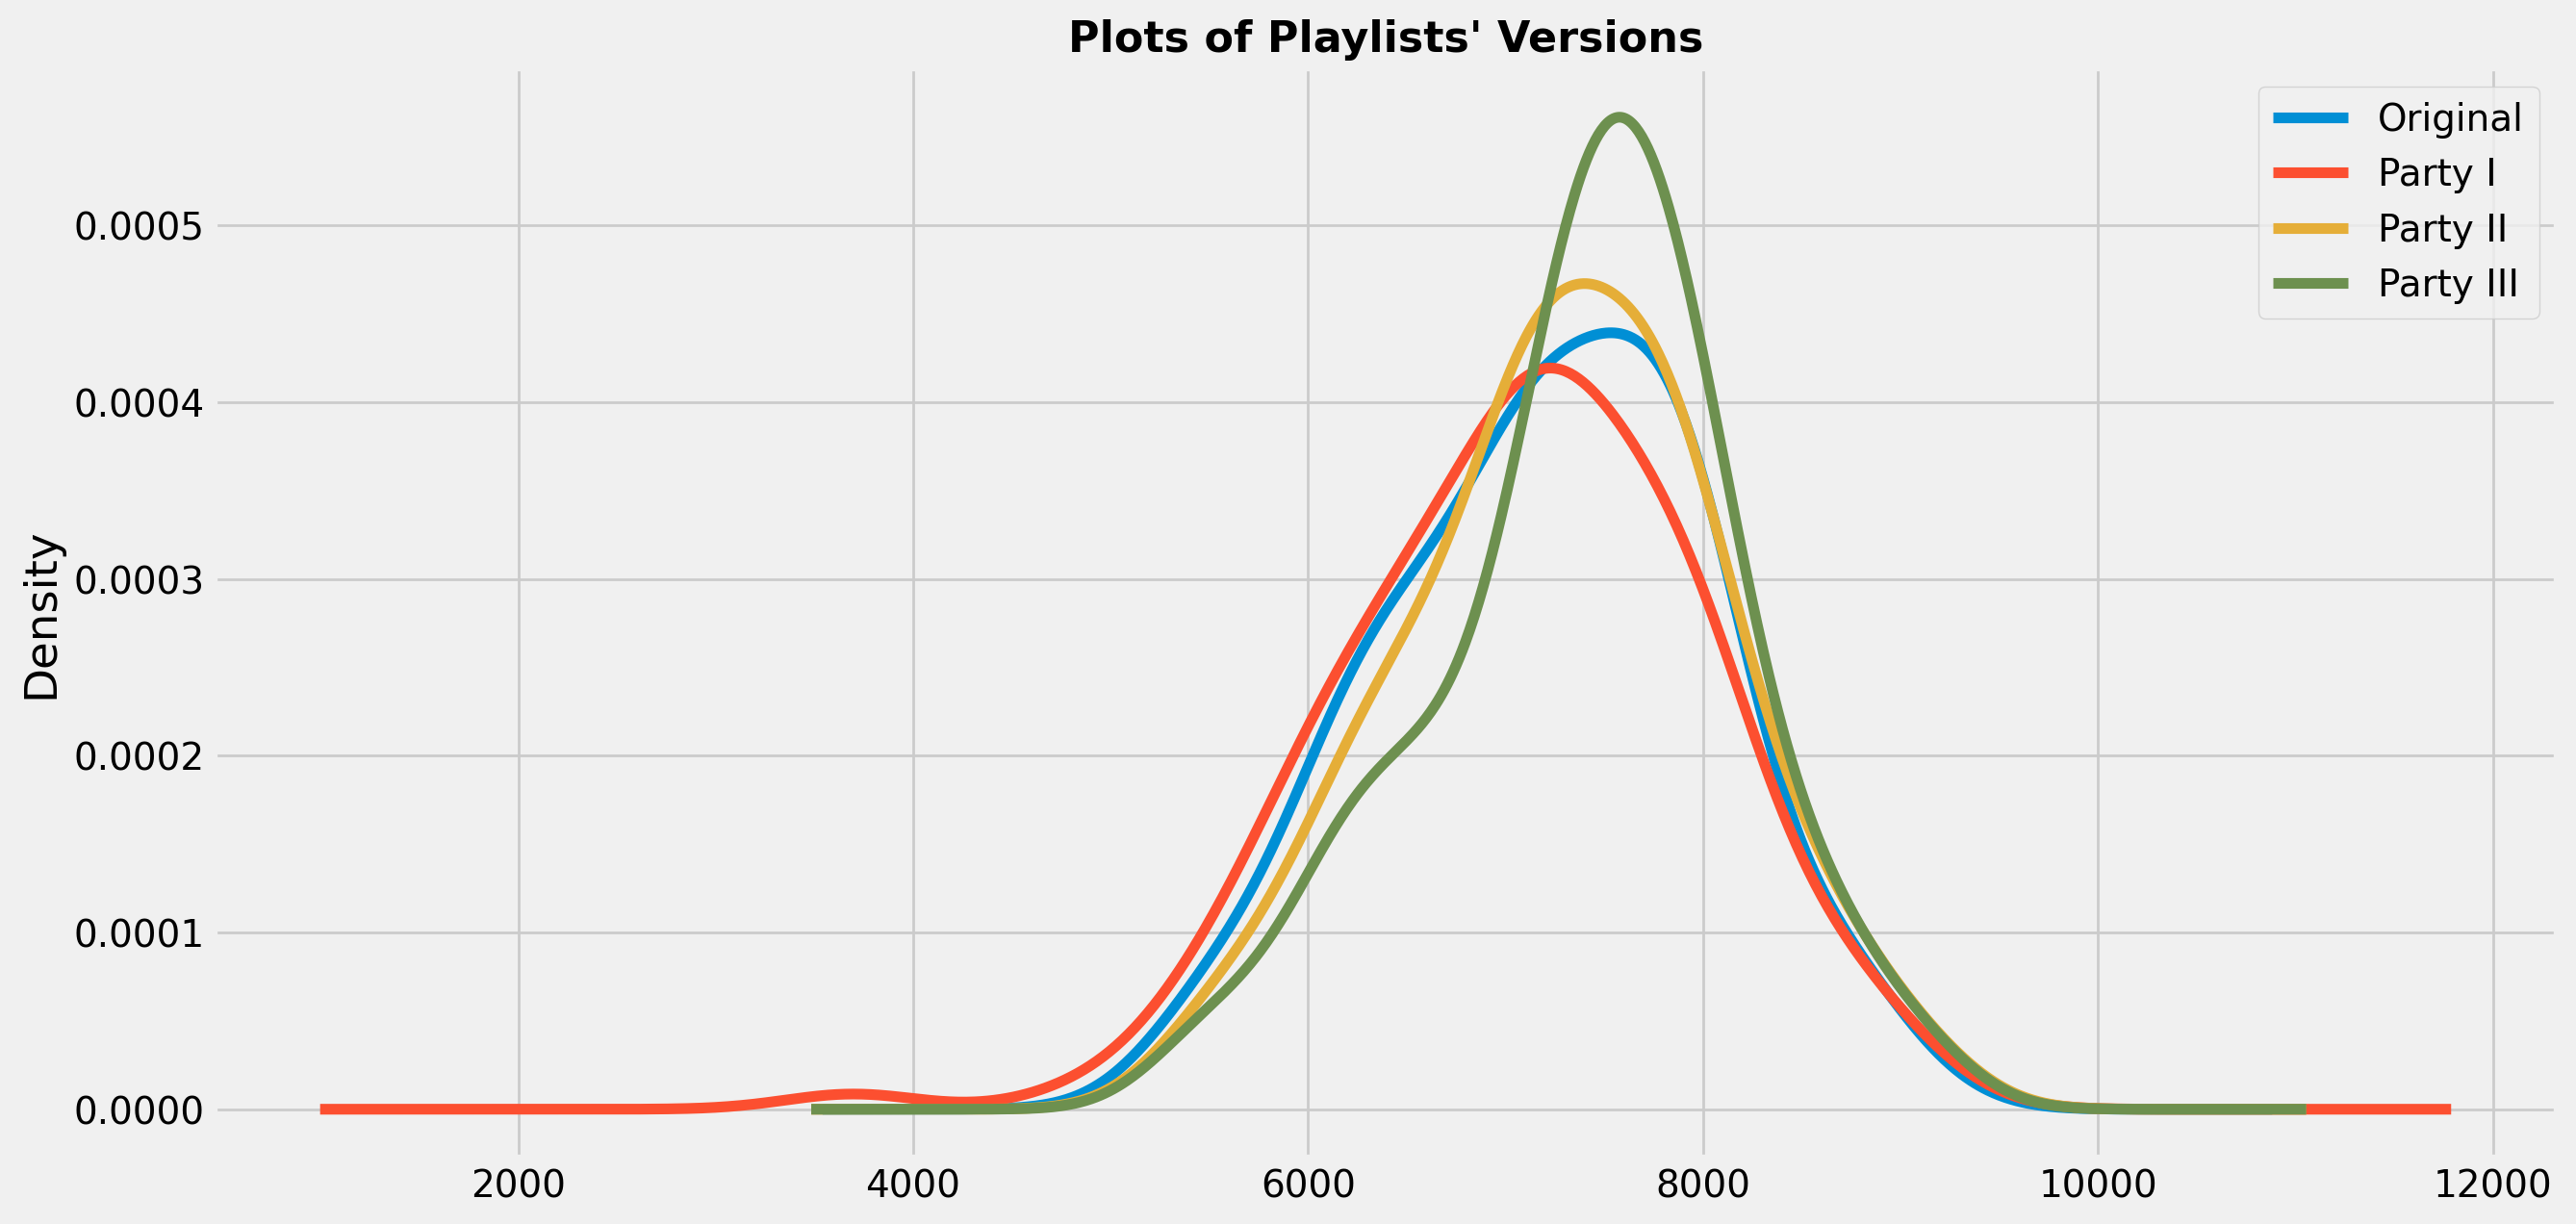

In [123]:
df_party['score'].plot.kde(figsize = (14, 7), label = 'Original', legend = True)
df_party_exp_I['score'].plot.kde(figsize = (14, 7), label = 'Party I', legend = True)
df_party_exp_II['score'].plot.kde(figsize = (14, 7), label = 'Party II', legend = True)
df_party_exp_III['score'].plot.kde(figsize = (14, 7), label = 'Party III', legend = True)

plt.title("Plots of Playlists\' Versions", fontsize=16, fontweight='heavy')

From the last depiction (kernel density plots) we can easily infer that the **Approach III** meets all the initial criteria we specified:

✔️ higher `danceability` and `valence` audio features than the original playlists's

✔️ better distribution of the tracks along both features

✔️ highest aggregate score of all the features, meaning higher potential for a more uniform playlist

## Create the New Playlist
Next, we are going to create a new playlist and add to it all the tracks we ended up selecting:

In [113]:
# Authorization flow

scope = "playlist-modify-public"
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [114]:
def create_playlist(sp, username, playlist_name, playlist_description):
    playlists = sp.user_playlist_create(username, playlist_name, description = playlist_description)

In [115]:
create_playlist(sp, username, 'Party Vibes', 'A pure party playlist')

In [116]:
# Find the new playlist's id
fetch_playlists(sp,username)

,id,name,#tracks
0,3Ewj633gvhEmZwJOn5lliX,Party Vibes,0
1,27kjEeyUgORaTHocNayo6A,Chill,24
2,3KM99SC0LjvbtX1fxMAXuk,Party,97
3,5N6hukeEop9douhdlONSI1,Vibe,160
4,7ak4z74RGfVcTAXdQaHxYN,Bollywood,86
5,0Dtn1Kg8eAke8hGzWCiYoe,Calm,76
6,08MeRULLvHKw3JQG8WXoju,Peace,146


In [117]:
def enrich_playlist(sp, username, playlist_id, playlist_tracks):
    index = 0
    results = []
    
    while index < len(playlist_tracks):
        results += sp.user_playlist_add_tracks(username, playlist_id, tracks = playlist_tracks[index:index + 100])
        index += 100

In [118]:
list_track = df_party_exp_III.index

In [120]:
enrich_playlist(sp, username, '3Ewj633gvhEmZwJOn5lliX', list_track)

In [121]:
fetch_playlists(sp,username)

,id,name,#tracks
0,3Ewj633gvhEmZwJOn5lliX,Party Vibes,141
1,27kjEeyUgORaTHocNayo6A,Chill,24
2,3KM99SC0LjvbtX1fxMAXuk,Party,97
3,5N6hukeEop9douhdlONSI1,Vibe,160
4,7ak4z74RGfVcTAXdQaHxYN,Bollywood,86
5,0Dtn1Kg8eAke8hGzWCiYoe,Calm,76
6,08MeRULLvHKw3JQG8WXoju,Peace,146
